In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
import xgboost
import pandas_profiling as pf
import warnings

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)


In [224]:
df=pd.read_csv('OnlineNewsPopularity.csv')

In [225]:
#Removing spaces in column names
df.columns=[i.strip() for i in df.columns]

In [10]:
df['shares'].median()

1400.0

In [6]:
df['shares'].mean()

3395.3801836343455

In [70]:
df['class2']=[0 if i<=3395 else 1 for i in df.shares]

In [226]:
#Converting target variable from continuous to categorical by setting threshold as median 
df['class']=[0 if i<=1400 else 1 for i in df.shares ]

In [157]:
from scipy.stats import zscore

In [7]:
len(df)

39644

In [21]:
for i in df.columns:
    if ((i!='shares') & (i!='url') & (i!='timedelta')) :
        print(f'{i} {(len(df[(zscore(df[i])>3) | (zscore(df[i])<-3)])/len(df))*100}')

n_tokens_title 0.3935021693068308
n_tokens_content 1.7480577136514983
n_unique_tokens 0.0025224498032489157
n_non_stop_words 0.0025224498032489157
n_non_stop_unique_tokens 0.0025224498032489157
num_hrefs 1.843910806174957
num_self_hrefs 1.763192412470992
num_imgs 2.176874180203814
num_videos 2.4871355060034306
average_token_length 2.9891030168499646
num_keywords 0.1286449399656947
data_channel_is_lifestyle 5.2946221370194735
data_channel_is_entertainment 0.0
data_channel_is_bus 0.0
data_channel_is_socmed 5.85965089294723
data_channel_is_tech 0.0
data_channel_is_world 0.0
kw_min_min 0.010089799212995663
kw_max_min 0.683583896680456
kw_avg_min 0.7012410453031984
kw_min_max 1.1830289577237414
kw_max_max 7.809504590858642
kw_avg_max 0.8475431338916355
kw_min_avg 0.0
kw_max_avg 0.9913227726768238
kw_avg_avg 0.95348602562809
self_reference_min_shares 0.6810614468772072
self_reference_max_shares 0.6457471496317224
self_reference_avg_sharess 0.8097063868429017
weekday_is_monday 0.0
weekday_is_

In [5]:
iqr=df.n_non_stop_words.quantile(.75)-df.n_non_stop_words.quantile(.25)
ul=df.n_non_stop_words.quantile(.75)+(1.5*iqr)
ll=df.n_non_stop_words.quantile(.25)-(1.5*iqr)


0.999999997647

## Bivariate Analysis

## Words

<ol>
<li>n_tokens_title: Number of words in the title
<li>n_tokens_content: Number of words in the content
<li>n_unique_tokens: Rate of unique words in the content
<li>n_non_stop_words: Rate of non-stop words in the content
<li>n_non_stop_unique_tokens: Rate of unique non-stop words in the content
<li>average_token_length: Average length of the words in the content
</ol>

In [187]:
words=['n_tokens_title','n_tokens_content','average_token_length','n_non_stop_words','n_unique_tokens','n_non_stop_unique_tokens']

In [15]:
from scipy.stats import ttest_ind

In [16]:
ttest_ind(df[df['class']==0]['n_tokens_title'],df[df['class']==1]['n_tokens_title'])

Ttest_indResult(statistic=8.667575627908061, pvalue=4.578232456238384e-18)

In [12]:
df[words].head()

n_tokens_title  n_tokens_content  average_token_length  n_non_stop_words  \
0              12               219              4.680365               1.0   
1               9               255              4.913725               1.0   
2               9               211              4.393365               1.0   
3               9               531              4.404896               1.0   
4              13              1072              4.682836               1.0   

   n_unique_tokens  n_non_stop_unique_tokens  
0         0.663594                  0.815385  
1         0.604743                  0.791946  
2         0.575130                  0.663866  
3         0.503788                  0.665635  
4         0.415646                  0.540890

In [17]:
#Outlier
df[df.n_non_stop_words==max(df.n_non_stop_words)]

url  timedelta  \
31037  http://mashable.com/2014/08/18/ukraine-civilia...        142   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
31037               9              1570            701.0            1042.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
31037                     650.0         11              10        51  ...   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
31037                    0.0                    0.0                    0.0   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
31037                    0.0                 0.0                       0.0   

       abs_title_subjectivity  abs_title_sentiment_polarity  shares  class  
31037                     0.0                           0.0    5900      1  

[1 rows x 62 columns]

In [227]:
#Dropping the outlier
df=df.drop(df.index[31037])

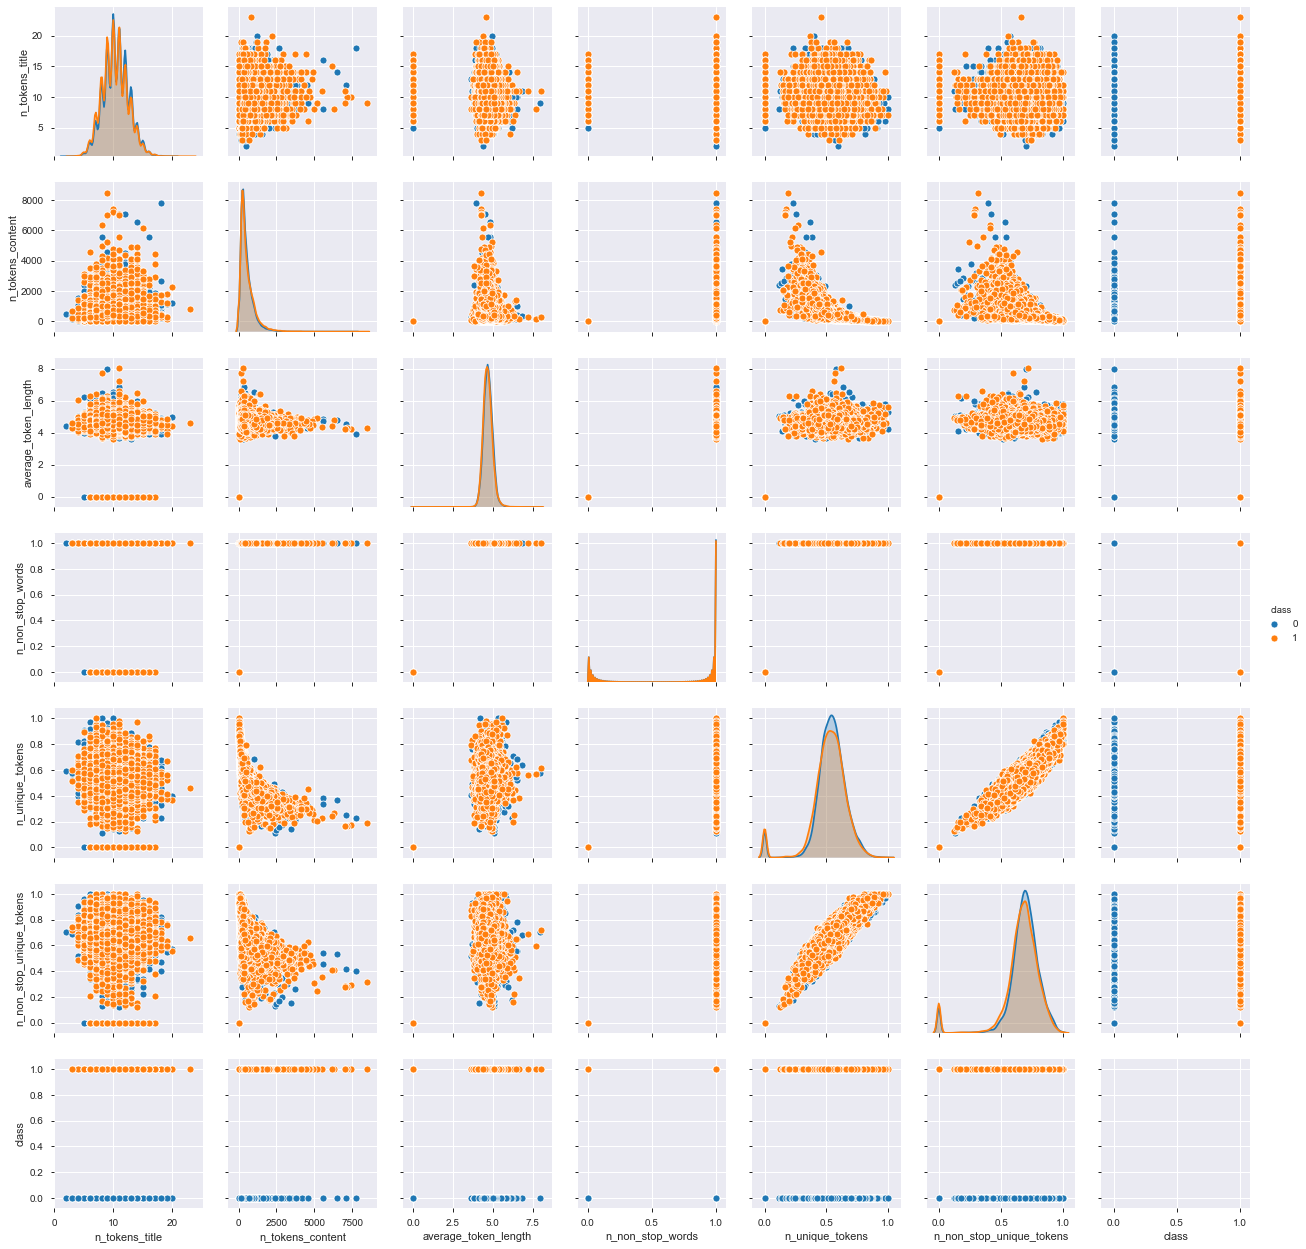

In [30]:
sns.pairplot(df,vars=df[words+['class']],diag_kind='kde',hue='class')
plt.show()

In [ ]:
# As we can see there is no distinct of classes for any  of the features ie the distribution of fearure is same or 
#overlapping for class 0 and 1, none of the columns are significant for classification

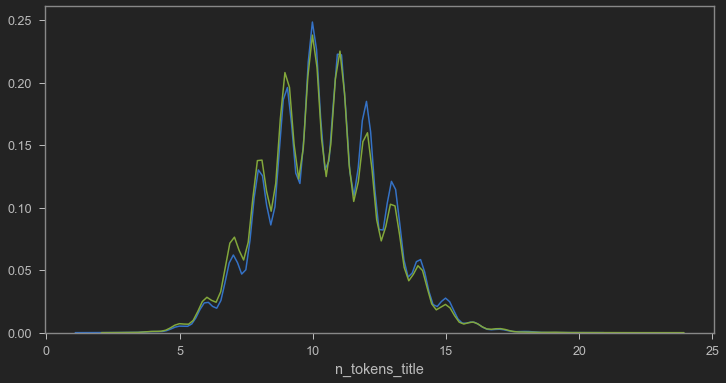

In [160]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['class']==0]['n_tokens_title'],hist=False)
sns.distplot(df[df['class']==1]['n_tokens_title'],hist=False)
plt.show()

In [404]:
stats.levene(df[df['class']==0]['n_tokens_title'],df[df['class']==1]['n_tokens_title'])

LeveneResult(statistic=0.0032386850328870085, pvalue=0.9546176165708481)

In [161]:
import scipy.stats as stats

In [162]:
stats.mannwhitneyu(df[df['class']==0]['n_tokens_title'],df[df['class']==1]['n_tokens_title'])

MannwhitneyuResult(statistic=186294064.0, pvalue=1.330869103162258e-19)

In [185]:
crit=[]
stat=stats.anderson(df['num_self_hrefs'])[0]
crit=stats.anderson(df['num_self_hrefs'])[1][2]
print(f'{stat}')
print(f'{crit}')
#since statistic value is greater than critical value set for alpha=.05 so we reject null hypothesis

2749.778160403046
0.787


## Statistical Analysis

In [188]:
for i in words:
    #print(f'ttest for {i} ')
    print(f'{i}')
    df_1=pd.DataFrame({'output':0,i:df[df['class']==0][i]})
    df_2=pd.DataFrame({'output':1,i:df[df['class']==1][i]})
    #applying anderson darling on whole feature distribution as N>5000
    a1_stat=stats.anderson(df[i])[0]
    a1_crit=stats.anderson(df[i])[1][2]
    
    if((a1_stat<=a1_crit) & (stats.levene(df_1[i],df_2[i])[1]>.05)):
        print(stats.ttest_ind(df_1[i],df_2[i]))
        print()
    else:
        print(stats.mannwhitneyu(df_1[i],df_2[i]))
        print()

n_tokens_title
MannwhitneyuResult(statistic=186294064.0, pvalue=1.330869103162258e-19)

n_tokens_content
MannwhitneyuResult(statistic=193221302.0, pvalue=0.002480246263434255)

average_token_length
MannwhitneyuResult(statistic=185584157.0, pvalue=9.224955818124774e-22)

n_non_stop_words
MannwhitneyuResult(statistic=193678332.0, pvalue=0.007625170962600819)

n_unique_tokens
MannwhitneyuResult(statistic=186145700.5, pvalue=9.361730835468883e-20)

n_non_stop_unique_tokens
MannwhitneyuResult(statistic=181606124.5, pvalue=5.7070320970527415e-39)



In [190]:
for i in link_med:
    #print(f'ttest for {i} ')
    print(f'{i}')
    df_1=pd.DataFrame({'output':0,i:df[df['class']==0][i]})
    df_2=pd.DataFrame({'output':1,i:df[df['class']==1][i]})
    #applying anderson darling on whole feature distribution as N>5000
    a1_stat=stats.anderson(df[i])[0]
    a1_crit=stats.anderson(df[i])[1][2]
    
    if((a1_stat<=a1_crit) & (stats.levene(df_1[i],df_2[i])[1]>.05)):
        print(stats.ttest_ind(df_1[i],df_2[i]))
        print()
    else:
        print(stats.mannwhitneyu(df_1[i],df_2[i]))
        print()

num_hrefs
MannwhitneyuResult(statistic=178317313.0, pvalue=2.3809339046487327e-57)

num_self_hrefs
MannwhitneyuResult(statistic=190209380.5, pvalue=1.769294177245526e-08)

num_imgs
MannwhitneyuResult(statistic=180922611.0, pvalue=5.128635789257361e-47)

num_videos
MannwhitneyuResult(statistic=190736532.0, pvalue=2.8925753163749233e-09)



In [195]:
for i in keywords:
    #print(f'ttest for {i} ')
    print(f'{i}')
    df_1=pd.DataFrame({'output':0,i:df[df['class']==0][i]})
    df_2=pd.DataFrame({'output':1,i:df[df['class']==1][i]})
    #applying anderson darling on whole feature distribution as N>5000
    a1_stat=stats.anderson(df[i])[0]
    a1_crit=stats.anderson(df[i])[1][2]
    
    if((a1_stat<=a1_crit) & (stats.levene(df_1[i],df_2[i])[1]>.05)):
        print(stats.ttest_ind(df_1[i],df_2[i]))
        print()
    else:
        print(stats.mannwhitneyu(df_1[i],df_2[i]))
        print()

num_keywords
MannwhitneyuResult(statistic=181009742.0, pvalue=5.7523294821106615e-43)

kw_min_min
MannwhitneyuResult(statistic=191696195.5, pvalue=1.2541396495957891e-06)

kw_max_min
MannwhitneyuResult(statistic=177947168.5, pvalue=1.8842106101942255e-59)

kw_avg_min
MannwhitneyuResult(statistic=175627109.5, pvalue=9.712112594152472e-75)

kw_min_max
MannwhitneyuResult(statistic=187400211.5, pvalue=7.405847852256953e-17)

kw_max_max
MannwhitneyuResult(statistic=188154339.5, pvalue=1.1426421541485793e-22)

kw_avg_max
MannwhitneyuResult(statistic=193648434.5, pvalue=0.0074537125120966346)

kw_min_avg
MannwhitneyuResult(statistic=178568183.0, pvalue=2.502303988938753e-60)

kw_max_avg
MannwhitneyuResult(statistic=155839376.5, pvalue=3.1187200168383085e-278)

kw_avg_avg
MannwhitneyuResult(statistic=149637815.5, pvalue=0.0)



In [196]:
for i in self_href:
    #print(f'ttest for {i} ')
    print(f'{i}')
    df_1=pd.DataFrame({'output':0,i:df[df['class']==0][i]})
    df_2=pd.DataFrame({'output':1,i:df[df['class']==1][i]})
    #applying anderson darling on whole feature distribution as N>5000
    a1_stat=stats.anderson(df[i])[0]
    a1_crit=stats.anderson(df[i])[1][2]
    
    if((a1_stat<=a1_crit) & (stats.levene(df_1[i],df_2[i])[1]>.05)):
        print(stats.ttest_ind(df_1[i],df_2[i]))
        print()
    else:
        print(stats.mannwhitneyu(df_1[i],df_2[i]))
        print()

self_reference_min_shares
MannwhitneyuResult(statistic=162076202.0, pvalue=3.3586523549066074e-201)

self_reference_max_shares
MannwhitneyuResult(statistic=166036706.5, pvalue=5.8482179181631545e-158)

self_reference_avg_sharess
MannwhitneyuResult(statistic=161194116.5, pvalue=1.7029746407077358e-211)



In [199]:
for i in lda:
    #print(f'ttest for {i} ')
    print(f'{i}')
    df_1=pd.DataFrame({'output':0,i:df[df['class']==0][i]})
    df_2=pd.DataFrame({'output':1,i:df[df['class']==1][i]})
    #applying anderson darling on whole feature distribution as N>5000
    a1_stat=stats.anderson(df[i])[0]
    a1_crit=stats.anderson(df[i])[1][2]
    
    if((a1_stat<=a1_crit) & (stats.levene(df_1[i],df_2[i])[1]>.05)):
        print(stats.ttest_ind(df_1[i],df_2[i]))
        print()
    else:
        print(stats.mannwhitneyu(df_1[i],df_2[i]))
        print()

LDA_00
MannwhitneyuResult(statistic=189980869.0, pvalue=7.84052379963435e-09)

LDA_01
MannwhitneyuResult(statistic=179728778.0, pvalue=6.441606242246763e-49)

LDA_02
MannwhitneyuResult(statistic=165174341.5, pvalue=6.246218165765207e-166)

LDA_03
MannwhitneyuResult(statistic=186580322.0, pvalue=2.8384133763441035e-18)

LDA_04
MannwhitneyuResult(statistic=183604607.0, pvalue=1.1461499212427687e-29)



In [200]:
#abs_title_subjectivity H0 accept. means same for popular and unpopular
for i in title:
    #print(f'ttest for {i} ')
    print(f'{i}')
    df_1=pd.DataFrame({'output':0,i:df[df['class']==0][i]})
    df_2=pd.DataFrame({'output':1,i:df[df['class']==1][i]})
    #applying anderson darling on whole feature distribution as N>5000
    a1_stat=stats.anderson(df[i])[0]
    a1_crit=stats.anderson(df[i])[1][2]
    
    if((a1_stat<=a1_crit) & (stats.levene(df_1[i],df_2[i])[1]>.05)):
        print(stats.ttest_ind(df_1[i],df_2[i]))
        print()
    else:
        print(stats.mannwhitneyu(df_1[i],df_2[i]))
        print()

title_subjectivity
MannwhitneyuResult(statistic=188888112.0, pvalue=1.832196683175706e-12)

title_sentiment_polarity
MannwhitneyuResult(statistic=184481429.0, pvalue=1.6671727772752878e-29)

abs_title_subjectivity
MannwhitneyuResult(statistic=196198036.0, pvalue=0.4160587029920939)

abs_title_sentiment_polarity
MannwhitneyuResult(statistic=190005634.0, pvalue=8.257102785681583e-10)



In [202]:
#avg_negative_polarity,min_negative_polarity,max_negative_polarity H0 accept. means same for popular and unpopular
for i in pol:
    #print(f'ttest for {i} ')
    print(f'{i}')
    df_1=pd.DataFrame({'output':0,i:df[df['class']==0][i]})
    df_2=pd.DataFrame({'output':1,i:df[df['class']==1][i]})
    #applying anderson darling on whole feature distribution as N>5000
    a1_stat=stats.anderson(df[i])[0]
    a1_crit=stats.anderson(df[i])[1][2]
    
    if((a1_stat<=a1_crit) & (stats.levene(df_1[i],df_2[i])[1]>.05)):
        print(stats.ttest_ind(df_1[i],df_2[i]))
        print()
    else:
        print(stats.mannwhitneyu(df_1[i],df_2[i]))
        print()

global_subjectivity
MannwhitneyuResult(statistic=174479398.5, pvalue=5.696907687225355e-83)

global_sentiment_polarity
MannwhitneyuResult(statistic=178170553.5, pvalue=4.5560704003495906e-58)

global_rate_positive_words
MannwhitneyuResult(statistic=180381205.0, pvalue=2.5008729273842684e-45)

global_rate_negative_words
MannwhitneyuResult(statistic=190856535.5, pvalue=5.146618040070318e-07)

avg_positive_polarity
MannwhitneyuResult(statistic=186597412.0, pvalue=3.2327045124640064e-18)

min_positive_polarity
MannwhitneyuResult(statistic=186561888.5, pvalue=1.519476707788335e-19)

max_positive_polarity
MannwhitneyuResult(statistic=184405232.5, pvalue=6.58120253902758e-28)

avg_negative_polarity
MannwhitneyuResult(statistic=195451118.5, pvalue=0.19700276223304003)

min_negative_polarity
MannwhitneyuResult(statistic=195414848.0, pvalue=0.18699501934224405)

max_negative_polarity
MannwhitneyuResult(statistic=196238533.5, pvalue=0.43504209970509766)



In [206]:
df.groupby('class')['data_channel'].value_counts()

class  data_channel 
0      World            5491
       Entertainment    4413
       Business         3229
       Tech             2987
       Others           2399
       Lifestyle         899
       Social Media      664
1      Tech             4359
       Others           3735
       Business         3029
       World            2936
       Entertainment    2644
       Social Media     1659
       Lifestyle        1200
Name: data_channel, dtype: int64

In [214]:
a=np.array([df.groupby('class')['data_channel'].value_counts()])
a=np.reshape(a,(2,7))
a

array([[5491, 4413, 3229, 2987, 2399,  899,  664],
       [4359, 3735, 3029, 2936, 2644, 1659, 1200]], dtype=int64)

In [215]:
stats.chi2_contingency(a)

(578.4531685111237,
 1.0349991174202705e-121,
 6,
 array([[4989.59993946, 4127.43759459, 3170.04227626, 3000.34522248,
         2554.57385733, 1295.77630915,  944.22480073],
        [4860.40006054, 4020.56240541, 3087.95772374, 2922.65477752,
         2488.42614267, 1262.22369085,  919.77519927]]))

In [222]:
df.groupby('class')['days'].value_counts()

class  days     
0      Wednesday    4100
       Tuesday      4031
       Thursday     3885
       Monday       3521
       Friday       2836
       Sunday        976
       Saturday      733
1      Thursday     3382
       Tuesday      3359
       Wednesday    3335
       Monday       3140
       Friday       2865
       Sunday       1761
       Saturday     1720
Name: days, dtype: int64

In [220]:
day_arr=np.array([df.groupby('class')['days'].value_counts()])
day_arr=day_arr.reshape(2,7)
day_arr

array([[4100, 4031, 3885, 3521, 2836,  976,  733],
       [3382, 3359, 3335, 3140, 2865, 1761, 1720]], dtype=int64)

In [221]:
stats.chi2_contingency(day_arr)

(809.4454581750938,
 1.4014686112275905e-171,
 6,
 array([[3790.06972051, 3743.46635052, 3657.35142771, 3374.18529916,
         2887.88926445, 1386.45025729, 1242.58768036],
        [3691.93027949, 3646.53364948, 3562.64857229, 3286.81470084,
         2813.11073555, 1350.54974271, 1210.41231964]]))

## Links and digital media
<ol>
<li>num_hrefs: Number of links
<li>num_self_hrefs: Number of links to other articles published by Mashable
<li>num_imgs: Number of images
<li>num_videos: Number of videos
</ol>

In [189]:
link_med= ['num_hrefs','num_self_hrefs','num_imgs','num_videos']

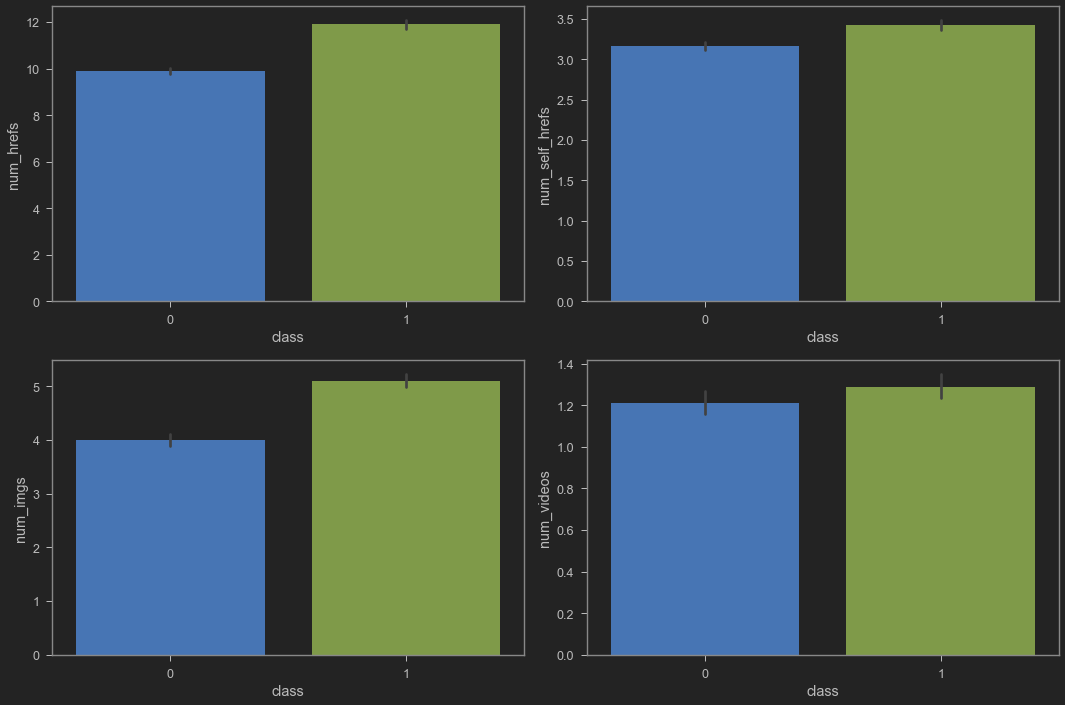

In [29]:
cnt=1
plt.figure(figsize=(15,10))
for i in link_med:
    plt.subplot(2,2,cnt)
    cnt+=1
    sns.barplot(df['class'],df[i])
plt.tight_layout()
plt.show()

In [ ]:
## Mean of all links features is similar irrespective of  class 0  and 1 except for images and links

In [228]:
# Merging the weekdays columns channels as one single column
publishdayMerge=df[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday' ]]
temp_arr=[]
for r in list(range(publishdayMerge.shape[0])):
    for c in list(range(publishdayMerge.shape[1])):
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Monday')
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Tuesday')
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Wednesday')
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Thursday')
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Friday')
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Saturday') 
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Sunday')
            
# Merging the data channels as one single column
DataChannelMerge=df[['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world' ]]
#logic to merge data channel
DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('Others')# if all columns have 0 value so put in Others category
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Entertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Tech')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('World')

In [229]:
# merge the the new data into the dataframe
df.insert(loc=11, column='days', value=temp_arr)
df.insert(loc=12, column='data_channel', value=DataChannel_arr)


print(df.shape)

(39643, 64)


In [153]:
df.to_csv('tab.csv')

## Publication Time

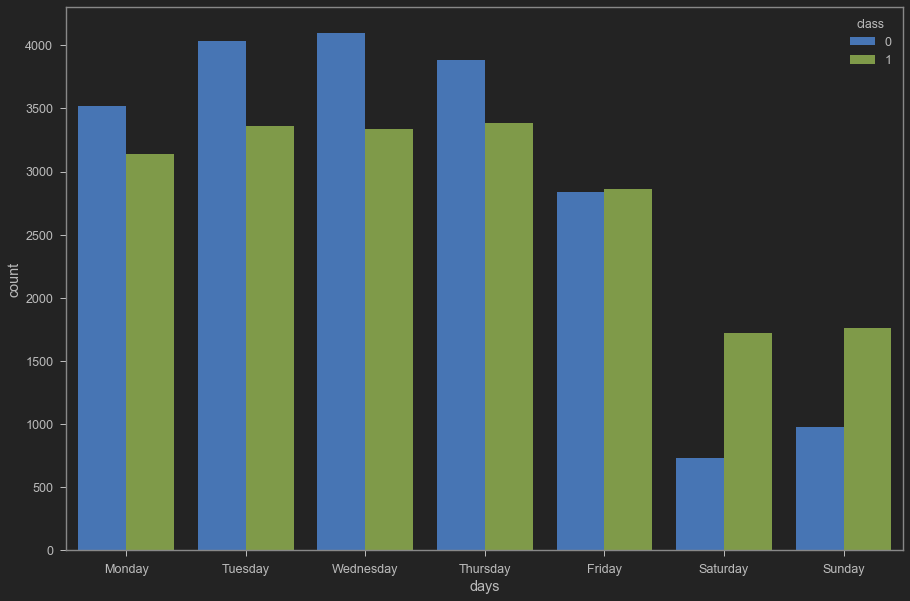

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(df.days,hue=df['class'])
plt.show()


In [ ]:
# Here we can see articles published on saturday or sunday have higher chance of being popular
# and if article is published on weekday , they have low prob of getting popular

In [21]:
df.groupby('days')['shares'].median()

days
Friday       1500
Monday       1400
Saturday     2000
Sunday       1900
Thursday     1400
Tuesday      1300
Wednesday    1300
Name: shares, dtype: int64

In [22]:
from scipy.stats import zscore

In [23]:
df.reset_index(inplace=True,drop=True)

In [24]:
df['shares_z']=(df.shares-df.shares.mean())/df.shares.std(ddof=1)
##pd.DataFrame(zscore(df.shares))

In [25]:
df.shares.std(ddof=1)

11627.090591971131

In [59]:
df[(df.shares_z>=0) & (df.shares_z<=3)][['shares','shares_z']].sort_values(by='shares')

shares  shares_z
27907    3400  0.000403
24777    3400  0.000403
24792    3400  0.000403
30569    3400  0.000403
20354    3400  0.000403
24842    3400  0.000403
1382     3400  0.000403
24924    3400  0.000403
20513    3400  0.000403
20271    3400  0.000403
10577    3400  0.000403
4172     3400  0.000403
1323     3400  0.000403
2691     3400  0.000403
13011    3400  0.000403
30469    3400  0.000403
1311     3400  0.000403
1344     3400  0.000403
4239     3400  0.000403
1496     3400  0.000403
24626    3400  0.000403
21011    3400  0.000403
20922    3400  0.000403
20913    3400  0.000403
24555    3400  0.000403
2507     3400  0.000403
11664    3400  0.000403
35132    3400  0.000403
30906    3400  0.000403
13059    3400  0.000403
...       ...       ...
3383    35800  2.786998
16670   35900  2.795599
9738    36100  2.812800
37458   36100  2.812800
4163    36200  2.821401
4571    36200  2.821401
3346    36200  2.821401
31074   36300  2.830001
9434    36500  2.847203
13652   36600  2.855803
29106   36600  2.855803
18071   36600  2.855803
3856    36700  2.864404
32745   36700  2.864404
6711    36800  2.873004
25173   36900  2.881605
16595   37000  2.890206
35269   37100  2.898806
17353   37200  2.907407
20275   37300  2.916007
270     37400  2.924608
26373   37500  2.933209
12644   37500  2.933209
12901   37700  2.950410
31701   37700  2.950410
13459   37800  2.959010
32667   37900  2.967611
14039   38000  2.976212
21338   38200  2.993413
36864   38200  2.993413

[7770 rows x 2 columns]

In [46]:
df.groupby('days')['shares_z'].median()

days
Friday      -0.163009
Monday      -0.171609
Saturday    -0.120006
Sunday      -0.128606
Thursday    -0.171609
Tuesday     -0.180210
Wednesday   -0.180210
Name: shares_z, dtype: float64

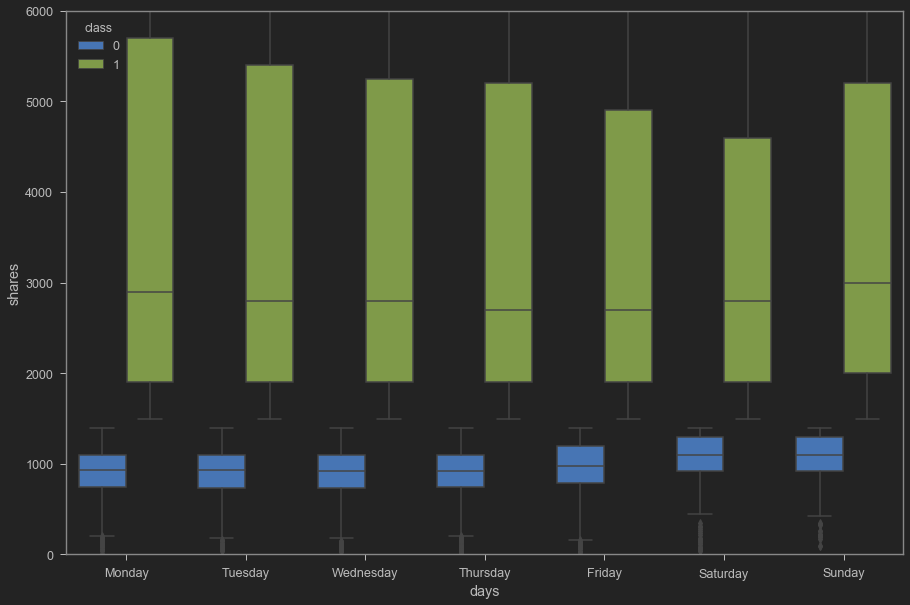

In [31]:
plt.figure(figsize=(15,10))
sns.boxplot(df.days,df.shares,hue=df['class'])
plt.ylim(0,6000)
#plt.legend(fancybox=True,title='Popularity', loc='upper left', labels=['Not Popular', 'Popular'])
plt.show()

## Type of News

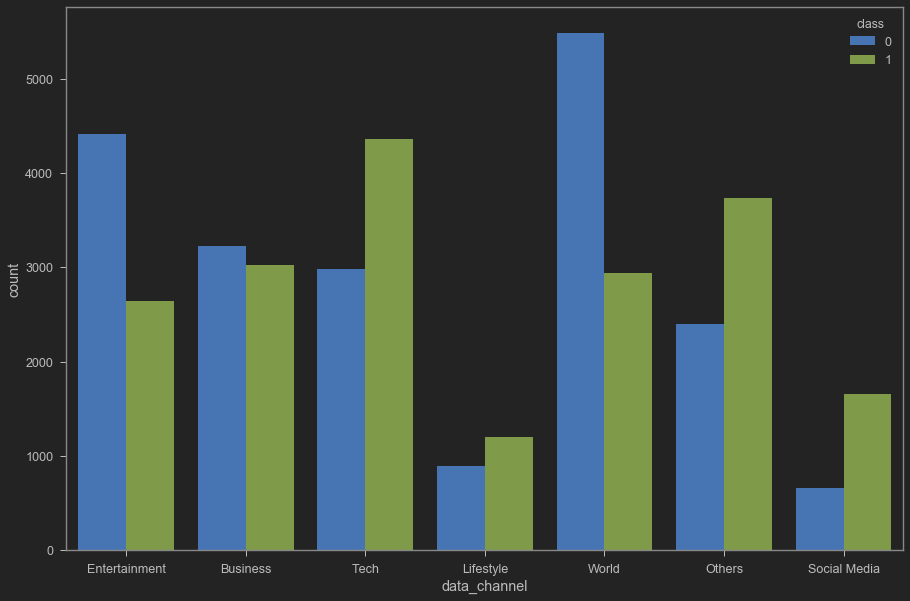

In [32]:
plt.figure(figsize=(15,10))
sns.countplot(df.data_channel,hue=df['class'])
plt.show()
#max mean of shares is from others category

In [ ]:
## Tech,social media ,lifestyle and others have high chance of being popular whereas other type of news especially world new
##has low possibility of being popular

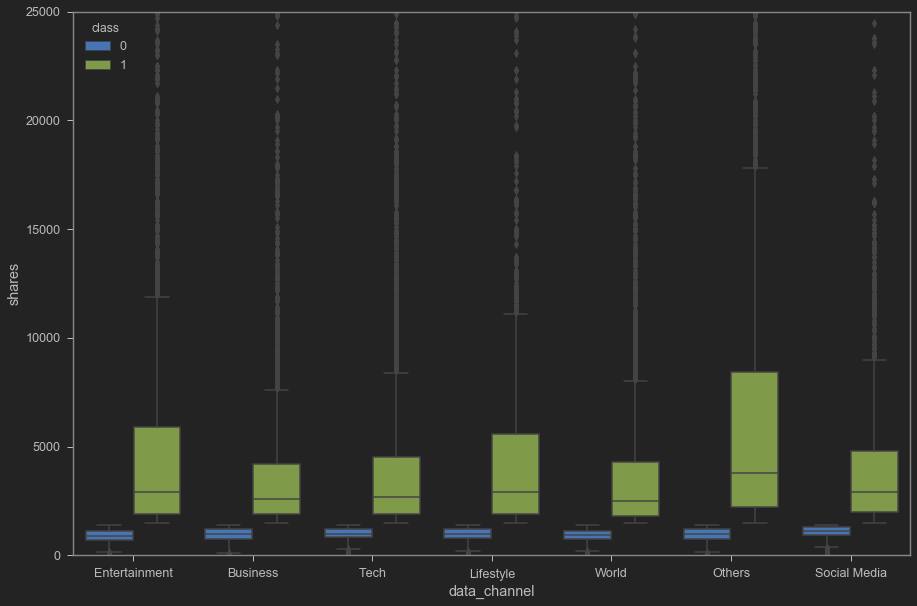

In [33]:
plt.figure(figsize=(15,10))
sns.boxplot(df.data_channel,df.shares,hue=df['class'])
plt.ylim(0,25000)
plt.show()

### Keywords
<ol>
    <li>num_keywords: Number of keywords in the metadata
    <li>kw_min_min: Worst keyword (min. shares)
    <li>kw_max_min: Worst keyword (max. shares)
    <li>kw_avg_min: Worst keyword (avg. shares)
    <li>kw_min_max: Best keyword (min. shares)
    <li>kw_max_max: Best keyword (max. shares)
    <li>kw_avg_max: Best keyword (avg. shares)
    <li>kw_min_avg: Avg. keyword (min. shares)
    <li>kw_max_avg: Avg. keyword (max. shares)
    <li>kw_avg_avg: Avg. keyword (avg. shares)
 <ol>

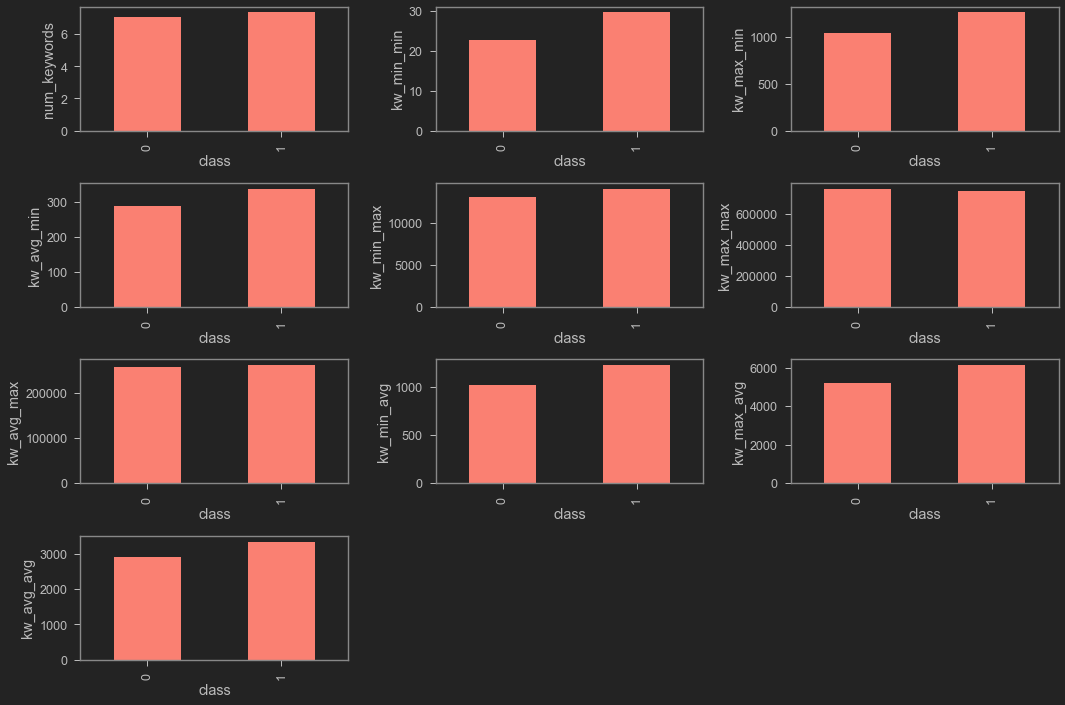

In [193]:
keywords = ['num_keywords','kw_min_min','kw_max_min','kw_avg_min','kw_min_max','kw_max_max','kw_avg_max','kw_min_avg','kw_max_avg','kw_avg_avg']
cnt=1
plt.figure(figsize=(15,10))
for i in keywords:
    plt.subplot(4,3,cnt)
    cnt+=1
    df.groupby('class')[i].mean().plot.bar(color='salmon')
    plt.ylabel(i)
plt.tight_layout()
plt.show()

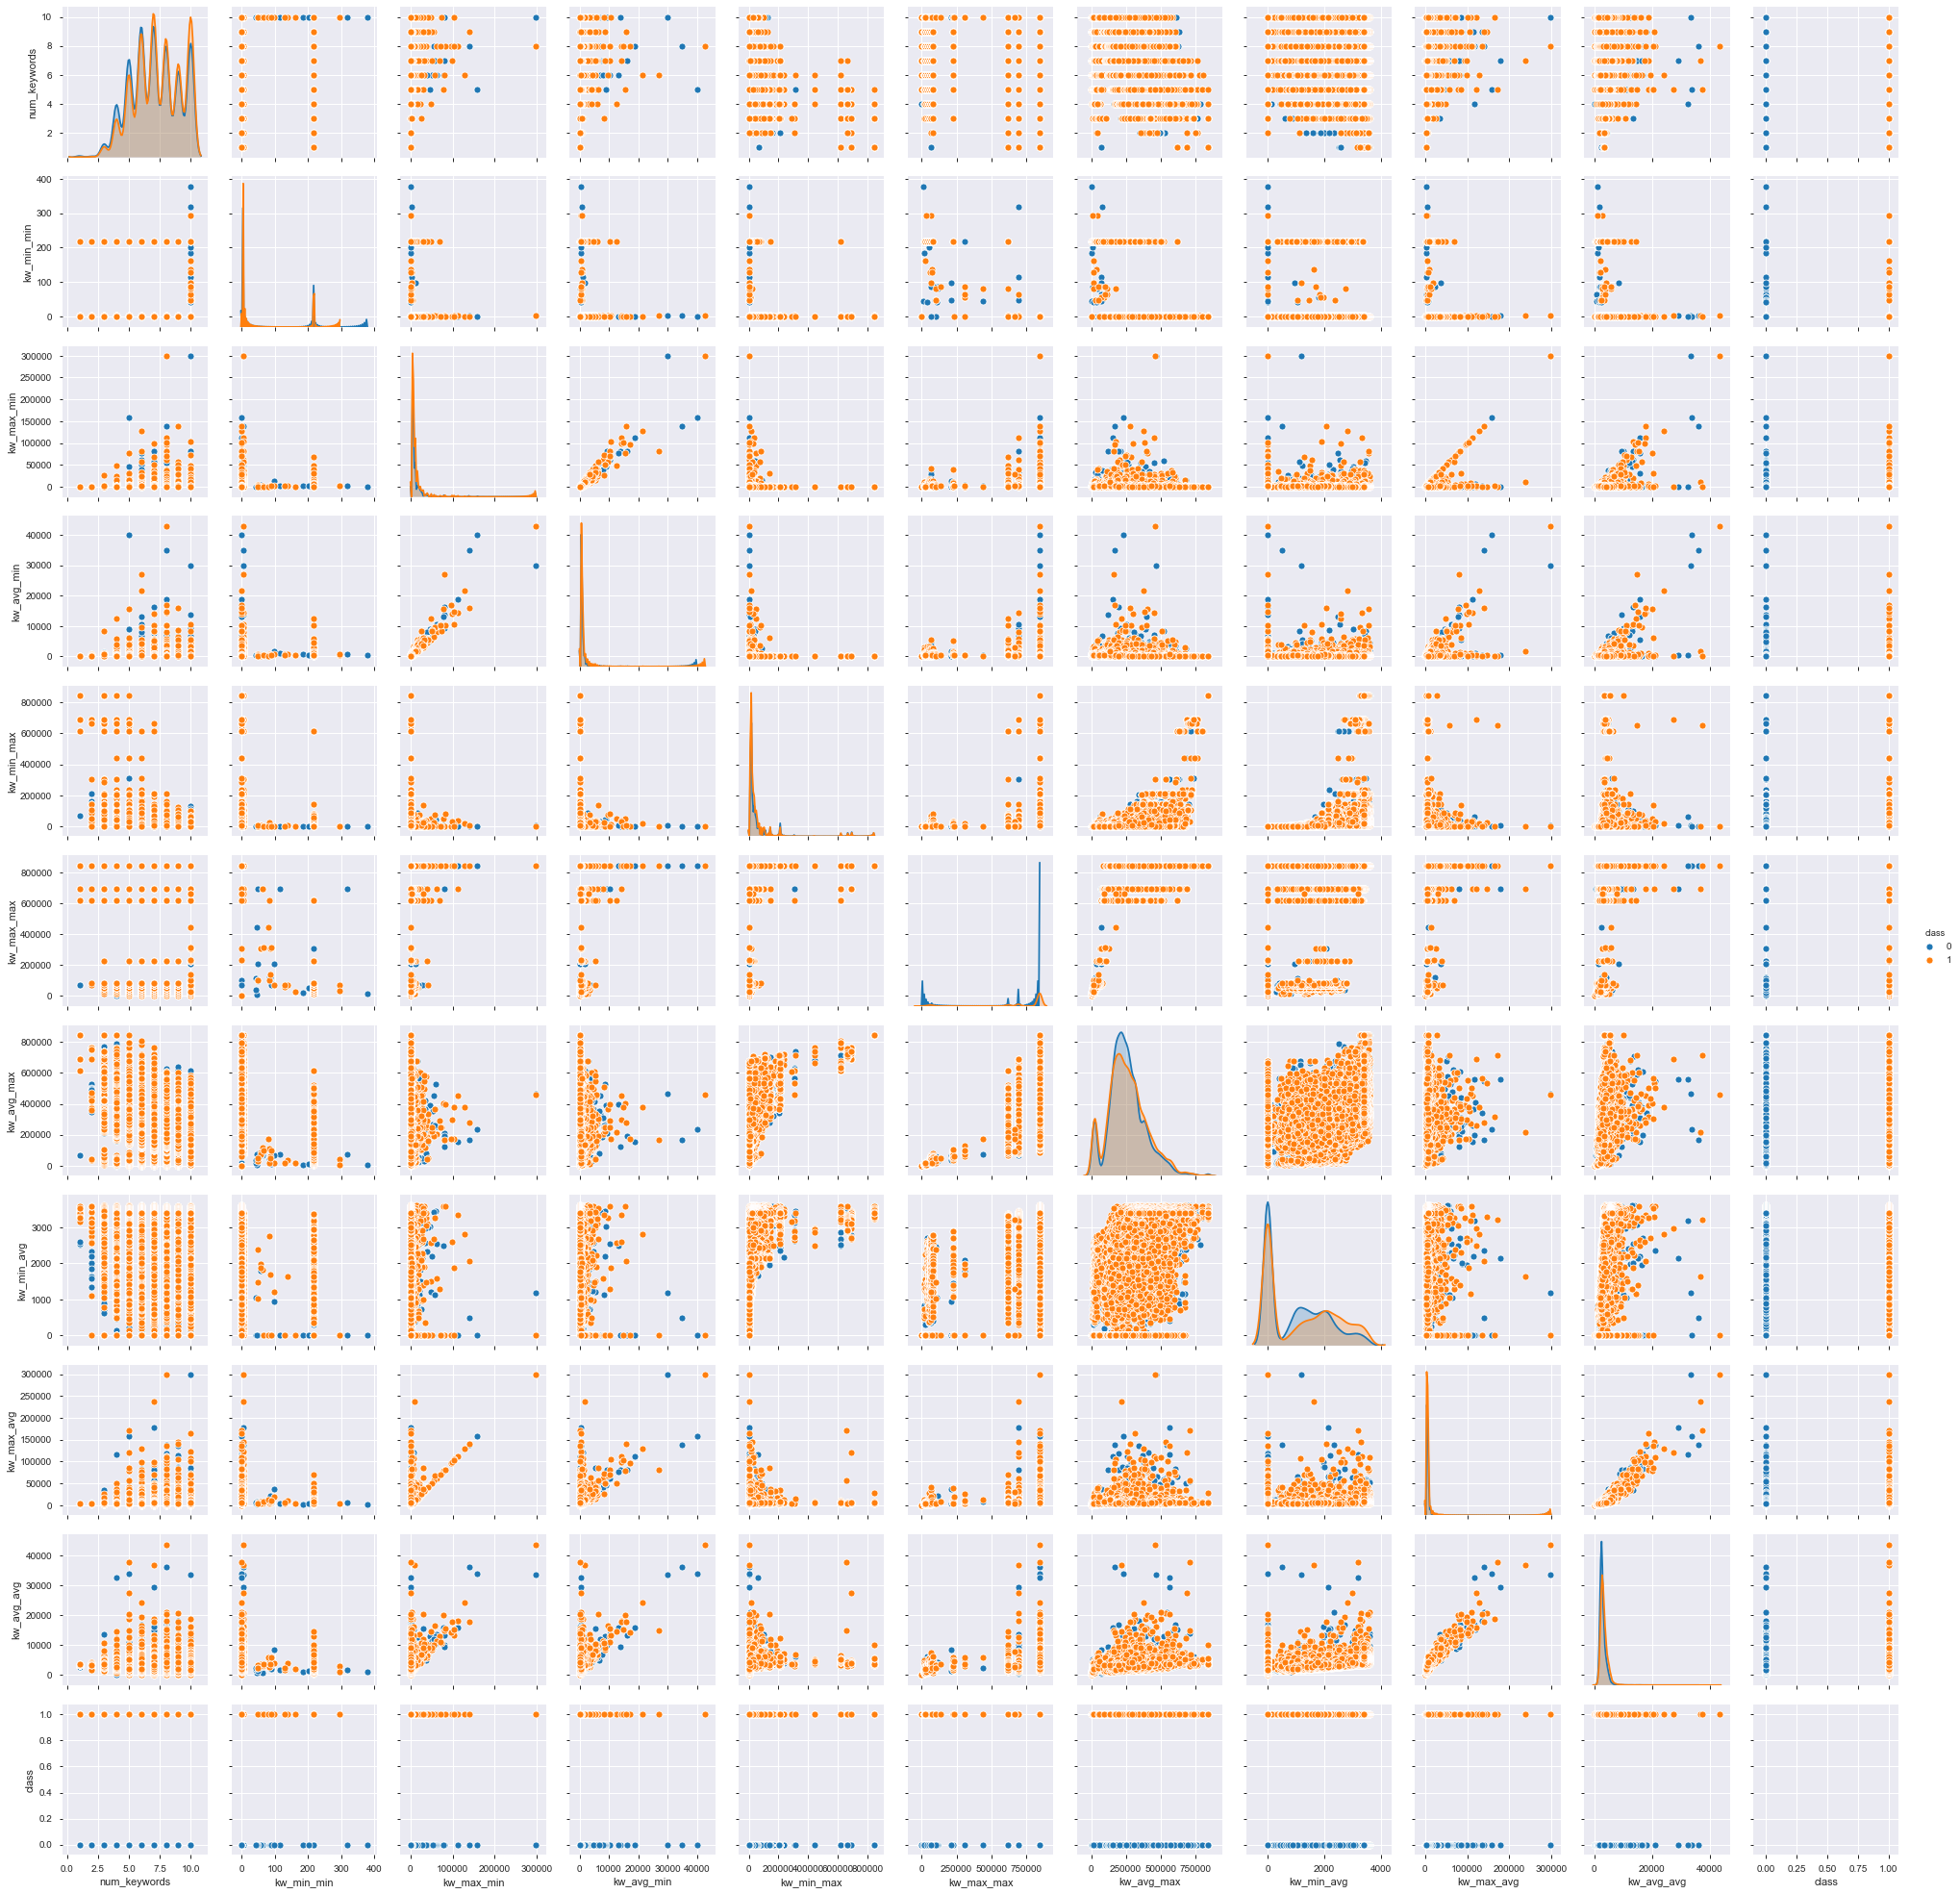

In [99]:
sns.pairplot(df,vars=df[keywords+['class']],diag_kind='kde',hue='class')
plt.show()

## Self Referencing links(#no of shares of articles mentioned in article)
<ol>
    <li>self_reference_min_shares: Min. shares of referenced articles in Mashable 
    <li>self_reference_max_shares: Max. shares of referenced articles in Mashable
    <li>self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
<ol>

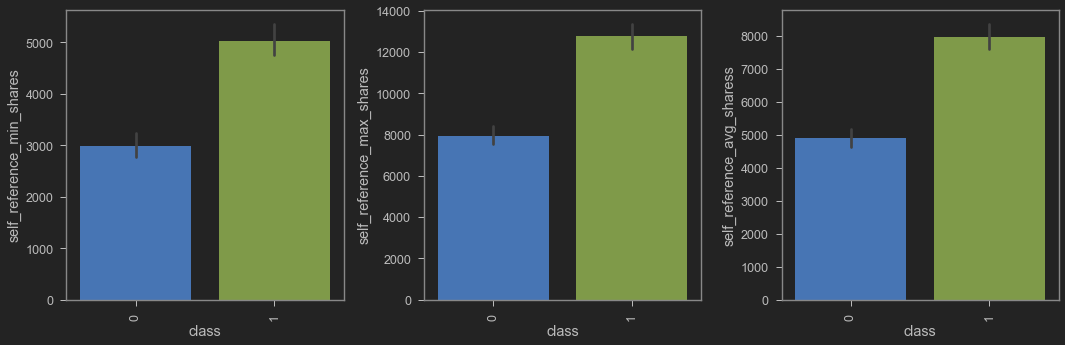

In [194]:
self_href = ['self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess']
cnt=1
plt.figure(figsize=(15,5))
for i in self_href:
    plt.subplot(1,3,cnt)
    cnt+=1
    sns.barplot(df['class'],df[i])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
## more is the mean of shares of self referencing links, more are the chances that article will be popular
#if self referencing links are popular then article also most probably will be popular

In [72]:
pd.melt(df[self_href])

variable         value
0        self_reference_min_shares    496.000000
1        self_reference_min_shares      0.000000
2        self_reference_min_shares    918.000000
3        self_reference_min_shares      0.000000
4        self_reference_min_shares    545.000000
5        self_reference_min_shares   8500.000000
6        self_reference_min_shares    545.000000
7        self_reference_min_shares    545.000000
8        self_reference_min_shares      0.000000
9        self_reference_min_shares      0.000000
10       self_reference_min_shares      0.000000
11       self_reference_min_shares      0.000000
12       self_reference_min_shares  10700.000000
13       self_reference_min_shares    770.000000
14       self_reference_min_shares   4800.000000
15       self_reference_min_shares      0.000000
16       self_reference_min_shares    555.000000
17       self_reference_min_shares      0.000000
18       self_reference_min_shares   5000.000000
19       self_reference_min_shares    545.000000
20       self_reference_min_shares    545.000000
21       self_reference_min_shares    704.000000
22       self_reference_min_shares    545.000000
23       self_reference_min_shares  16100.000000
24       self_reference_min_shares   2800.000000
25       self_reference_min_shares    924.000000
26       self_reference_min_shares   2500.000000
27       self_reference_min_shares    545.000000
28       self_reference_min_shares      0.000000
29       self_reference_min_shares      0.000000
...                            ...           ...
118899  self_reference_avg_sharess   1500.000000
118900  self_reference_avg_sharess      0.000000
118901  self_reference_avg_sharess      0.000000
118902  self_reference_avg_sharess   2607.000000
118903  self_reference_avg_sharess   2600.000000
118904  self_reference_avg_sharess   1400.000000
118905  self_reference_avg_sharess   1500.000000
118906  self_reference_avg_sharess  21600.000000
118907  self_reference_avg_sharess   2000.000000
118908  self_reference_avg_sharess   1776.600000
118909  self_reference_avg_sharess   1300.000000
118910  self_reference_avg_sharess   1675.000000
118911  self_reference_avg_sharess   6450.000000
118912  self_reference_avg_sharess    749.000000
118913  self_reference_avg_sharess   3360.500000
118914  self_reference_avg_sharess   1100.000000
118915  self_reference_avg_sharess    691.000000
118916  self_reference_avg_sharess   1700.000000
118917  self_reference_avg_sharess   1400.000000
118918  self_reference_avg_sharess      0.000000
118919  self_reference_avg_sharess   2745.083333
118920  self_reference_avg_sharess   7200.000000
118921  self_reference_avg_sharess   4900.000000
118922  self_reference_avg_sharess   5181.416667
118923  self_reference_avg_sharess   3633.333333
118924  self_reference_avg_sharess  37033.333333
118925  self_reference_avg_sharess   2100.000000
118926  self_reference_avg_sharess   1400.000000
118927  self_reference_avg_sharess    452.000000
118928  self_reference_avg_sharess   2100.000000

[118929 rows x 2 columns]

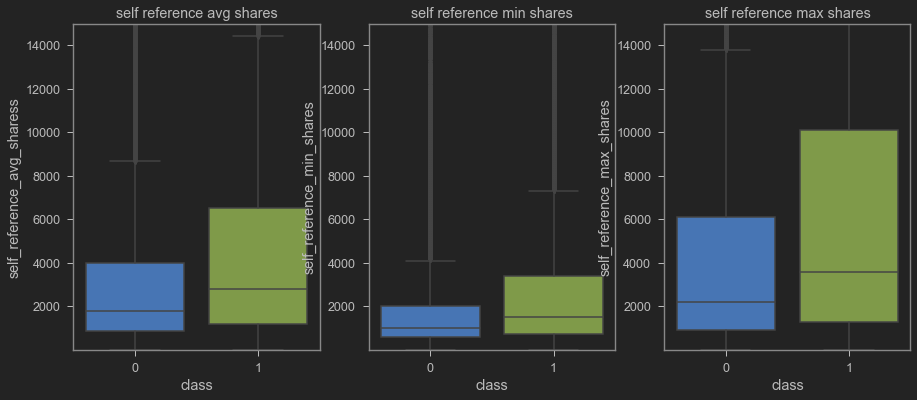

In [34]:
fig,axes=plt.subplots(1,3,figsize=(15,6))
sns.boxplot(x=df['class'],y=df.self_reference_avg_sharess,ax=axes[0])
sns.boxplot(x=df['class'],y=df.self_reference_min_shares,ax=axes[1])
sns.boxplot(x=df['class'],y=df.self_reference_max_shares,ax=axes[2])
axes[0].set_title('self reference avg shares')
axes[1].set_title('self reference min shares')
axes[2].set_title('self reference max shares')
plt.setp(axes,ylim=(1,15000))
plt.show()

In [35]:
df[df.self_reference_max_shares>=2000]['class'].value_counts()

1    13054
0    10713
Name: class, dtype: int64

In [ ]:
df


## NLP Features
<ol>
<li>LDA_00: Closeness to LDA topic 0
<li>LDA_01: Closeness to LDA topic 1
<li>LDA_02: Closeness to LDA topic 2
<li>LDA_03: Closeness to LDA topic 3
<li>LDA_04: Closeness to LDA topic 4
<li>title_subjectivity: Title subjectivity
<li>title_sentiment_polarity: Title polarity
<li>abs_title_subjectivity: Absolute subjectivity level
<li>abs_title_sentiment_polarity: Absolute polarity level
<li>global_subjectivity: Text subjectivity
<li>global_sentiment_polarity: Text sentiment polarity
<li>global_rate_positive_words: Rate of positive words in the content
<li>global_rate_negative_words: Rate of negative words in the content
<li>avg_positive_polarity: Avg. polarity of positive words
<li>min_positive_polarity: Min. polarity of positive words
<li>max_positive_polarity: Max. polarity of positive words
<li>avg_negative_polarity: Avg. polarity of negative words
<li>min_negative_polarity: Min. polarity of negative words
<li>max_negative_polarity: Max. polarity of negative words
</ol>

### Closeness to LDA topic

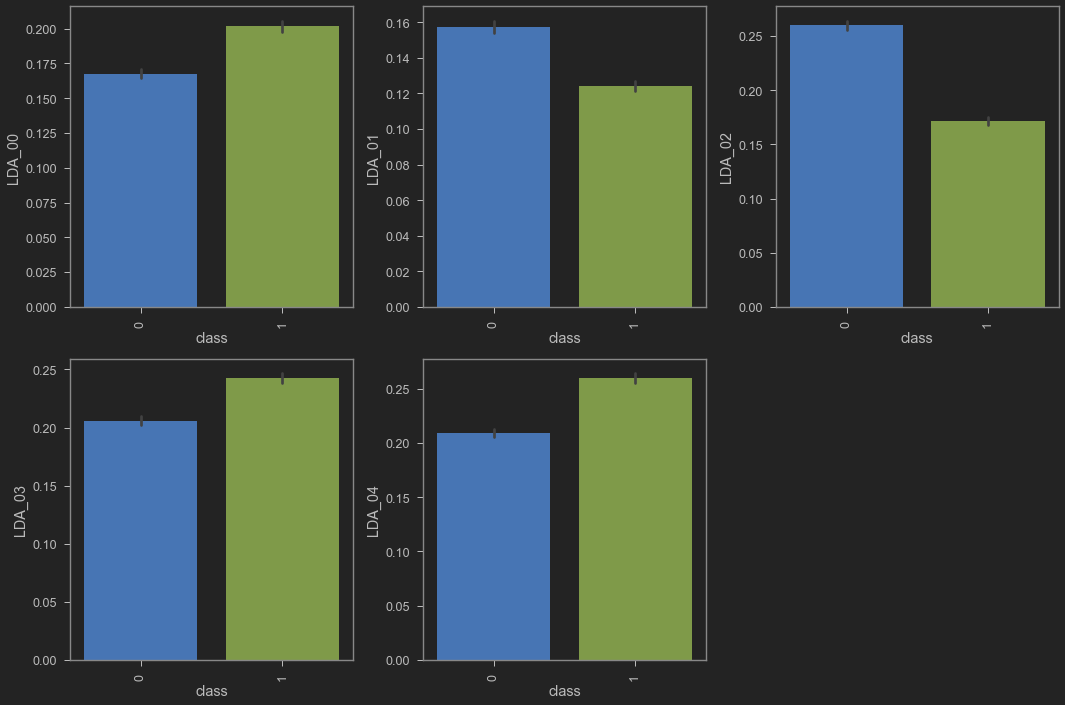

In [197]:
lda=['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']
cnt=1
plt.figure(figsize=(15,10))
for i in lda:
    plt.subplot(2,3,cnt)
    cnt+=1
    sns.barplot(df['class'],df[i])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

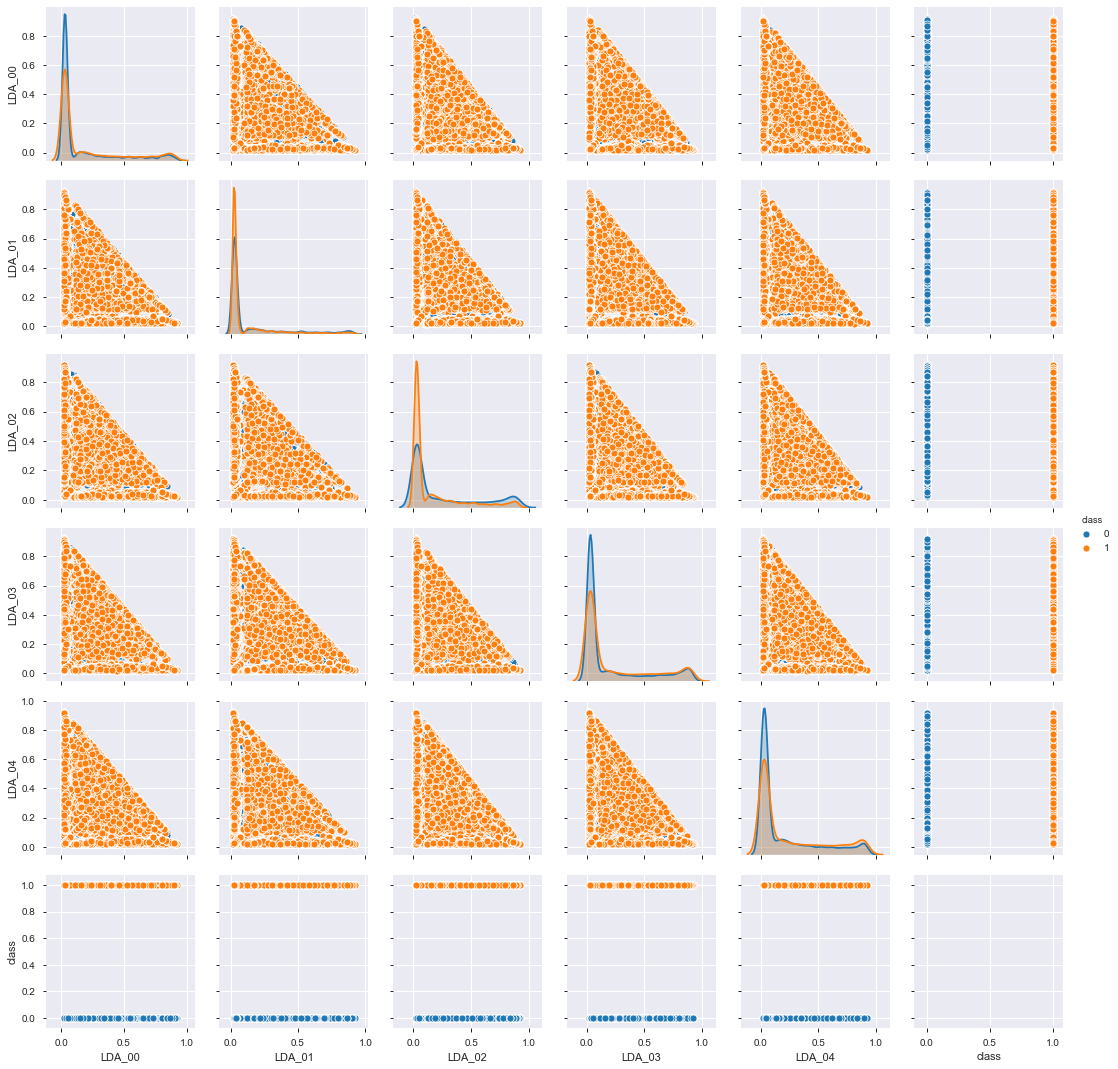

In [97]:
sns.pairplot(df,vars=df[lda+['class']],diag_kind='kde',hue='class')
plt.show()

## Top insights

In [ ]:
## LDA_00 vs Business articles
##We can clearly see after filtering out datapoints with LDA_00>.5, we find out most of the datapoints
##belong to Business articles so we can conclude LDA_00 represents Business data channel

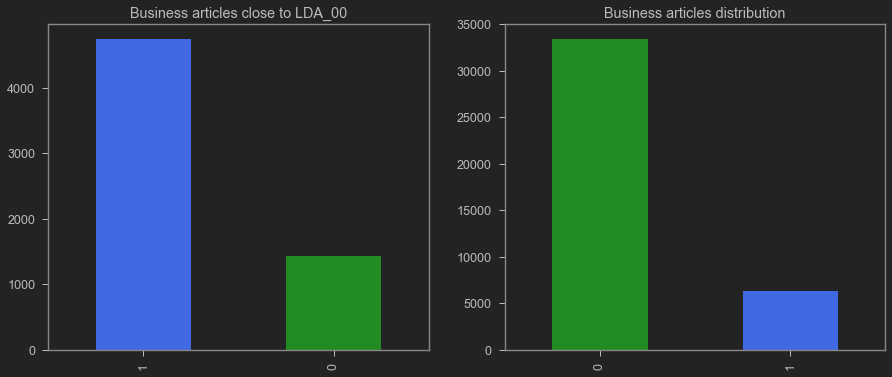

In [38]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
df[df.LDA_00>.5]['data_channel_is_bus'].value_counts().plot.bar(ax=axes[0],color=('royalblue','forestgreen'))
df.data_channel_is_bus.value_counts().plot.bar(ax=axes[1],color=('forestgreen','royalblue'))
axes[0].title.set_text('Business articles close to LDA_00')
axes[1].title.set_text('Business articles distribution')
plt.show()

In [39]:
## LDA_01 vs Entertainment articles
##We can clearly see after filtering out datapoints with LDA_01>.5, we find out most of the datapoints
##belong to Entertainment articles so we can conclude LDA_01 represents Entertainment data channel

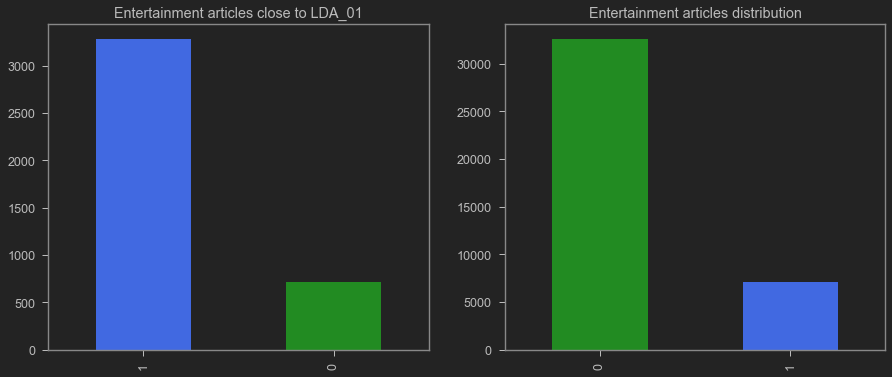

In [40]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
df[df.LDA_01>.5]['data_channel_is_entertainment'].value_counts().plot.bar(ax=axes[0],color=('royalblue','forestgreen'))
df.data_channel_is_entertainment.value_counts().plot.bar(ax=axes[1],color=('forestgreen','royalblue'))
axes[0].title.set_text('Entertainment articles close to LDA_01')
axes[1].title.set_text('Entertainment articles distribution')
plt.show()

In [41]:
## LDA_02 vs world articles
##We can clearly see after filtering out datapoints with LDA_02>.5, we find out most of the datapoints
##belong to world articles so we can conclude LDA_02 represents world data channel

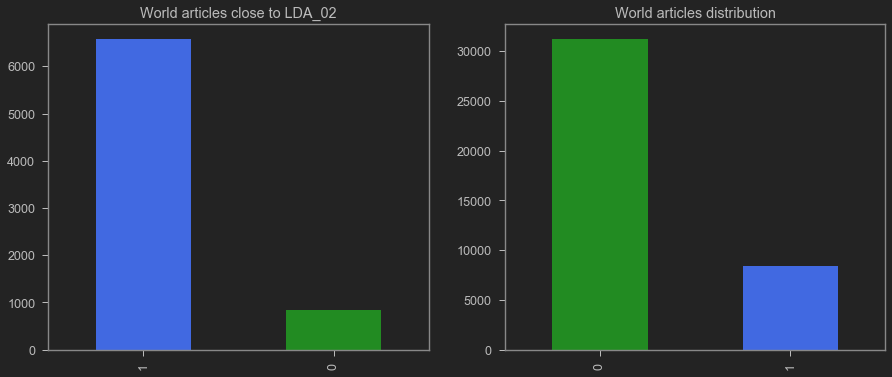

In [42]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
df[df.LDA_02>.5]['data_channel_is_world'].value_counts().plot.bar(ax=axes[0],color=('royalblue','forestgreen'))
df.data_channel_is_world.value_counts().plot.bar(ax=axes[1],color=('forestgreen','royalblue'))
axes[0].title.set_text('World articles close to LDA_02')
axes[1].title.set_text('World articles distribution')
plt.show()

In [43]:
## LDA_04 vs tech & lifestyle articles
##We can clearly see after filtering out datapoints with LDA_04>.5, we find out most of the datapoints
##belong to tech&lifestyle articles so we can conclude LDA_04 represents tech & lifestyle data channel

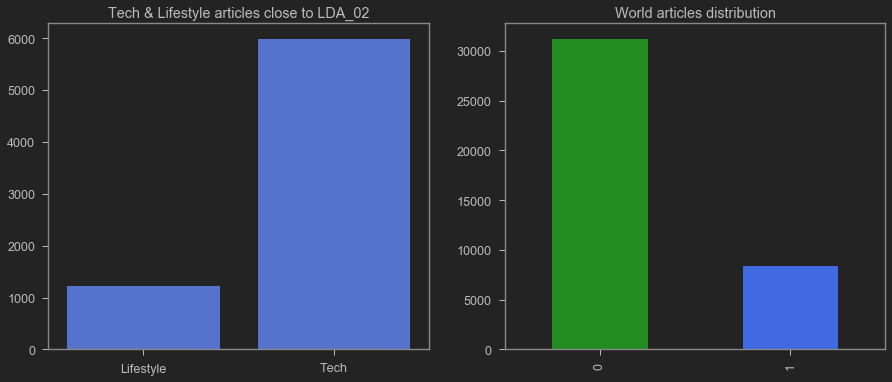

In [56]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.barplot(x=['Lifestyle','Tech'],y=[df[df.LDA_04>.5]['data_channel_is_lifestyle'].value_counts()[1],df[df.LDA_04>.5]['data_channel_is_tech'].value_counts()[1]],ax=axes[0],color=('royalblue'))
df.data_channel_is_world.value_counts().plot.bar(ax=axes[1],color=('forestgreen','royalblue'))
axes[0].title.set_text('Tech & Lifestyle articles close to LDA_02')
axes[1].title.set_text('World articles distribution')
plt.show()

In [45]:
ld=pd.DataFrame(columns=df.data_channel.value_counts().index)
for i in lda:
    ld.loc[i,:]=df[df[i]>.5].groupby('data_channel')['data_channel'].count()

In [55]:
ld.style.apply(highlight_max)

### Title related

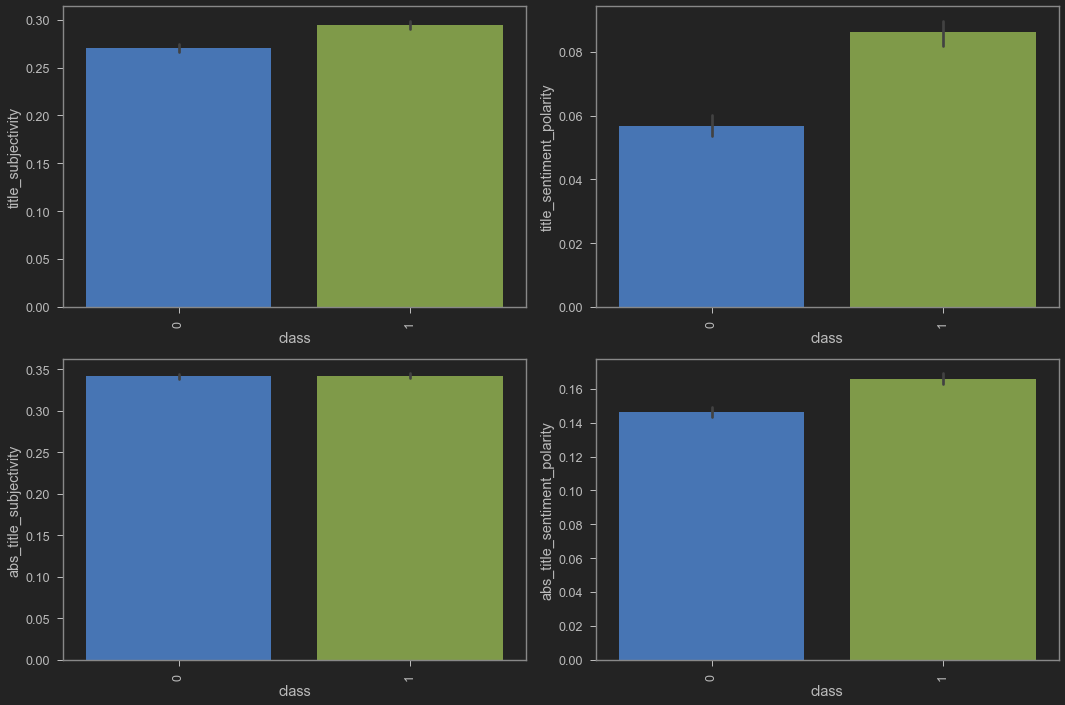

In [198]:
title=['title_subjectivity','title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']
cnt=1
plt.figure(figsize=(15,10))
for i in title:
    plt.subplot(2,2,cnt)
    cnt+=1
    sns.barplot(df['class'],df[i])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#More the title_sentiment_polarity , more are the chances its a popular article

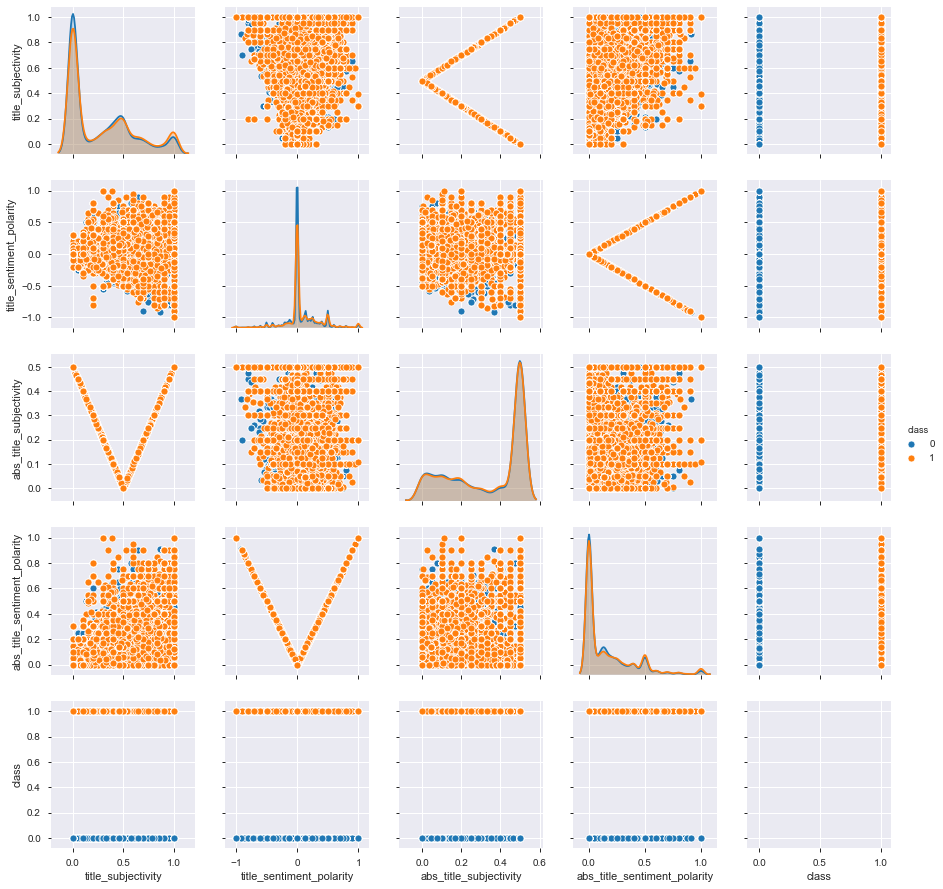

In [102]:
sns.pairplot(df,vars=df[title+['class']],diag_kind='kde',hue='class')
plt.show()

In [105]:
df[['title_sentiment_polarity','abs_title_sentiment_polarity']].corr()

title_sentiment_polarity  \
title_sentiment_polarity                      1.000000   
abs_title_sentiment_polarity                  0.410203   

                              abs_title_sentiment_polarity  
title_sentiment_polarity                          0.410203  
abs_title_sentiment_polarity                      1.000000

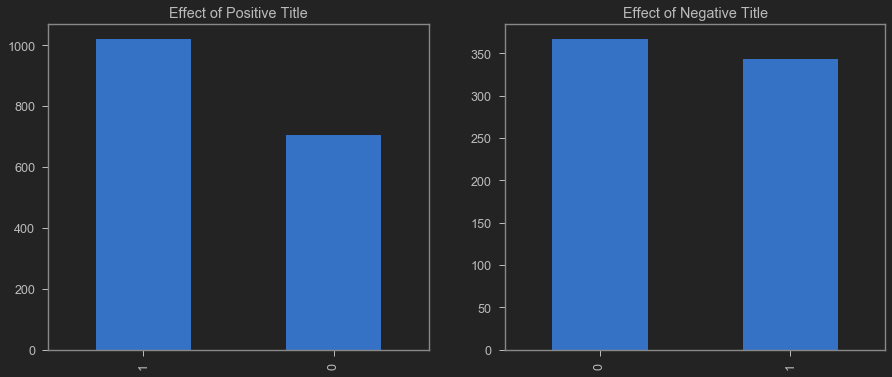

In [48]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
df[df.title_sentiment_polarity>.5]['class'].value_counts().plot.bar(ax=axes[0])
df[df.title_sentiment_polarity<-.5]['class'].value_counts().plot.bar(ax=axes[1])
axes[0].title.set_text('Effect of Positive Title')
axes[1].title.set_text('Effect of Negative Title')
plt.show()

In [57]:
# Positive title tends to make increase article share, hence , making it  popular

## Polarity
<li>global_subjectivity: Text subjectivity
<li>global_sentiment_polarity: Text sentiment polarity
<li>global_rate_positive_words: Rate of positive words in the content
<li>global_rate_negative_words: Rate of negative words in the content
<li>rate_positive_words: Rate of positive words among non-neutral tokens
<li>rate_negative_words: Rate of negative words among non-neutral tokens
<li>avg_positive_polarity: Avg. polarity of positive words
<li>min_positive_polarity: Min. polarity of positive words
<li>max_positive_polarity: Max. polarity of positive words
<li>avg_negative_polarity: Avg. polarity of negative words
<li>min_negative_polarity: Min. polarity of negative words
<li>max_negative_polarity: Max. polarity of negative words

In [201]:
pol=['global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words',
'avg_positive_polarity','min_positive_polarity','max_positive_polarity','avg_negative_polarity','min_negative_polarity',
'max_negative_polarity']

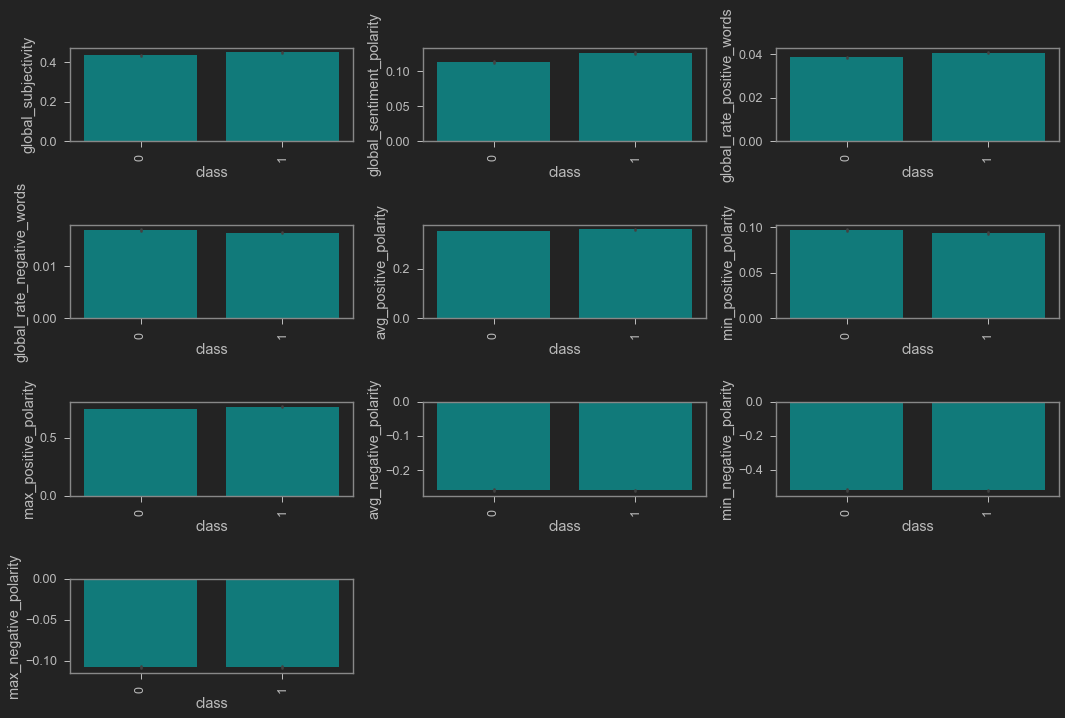

In [27]:
cnt=1
plt.figure(figsize=(15,10))
for i in pol:
    plt.subplot(4,3,cnt)
    cnt+=1
    sns.barplot(df['class'],df[i],color='darkcyan')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

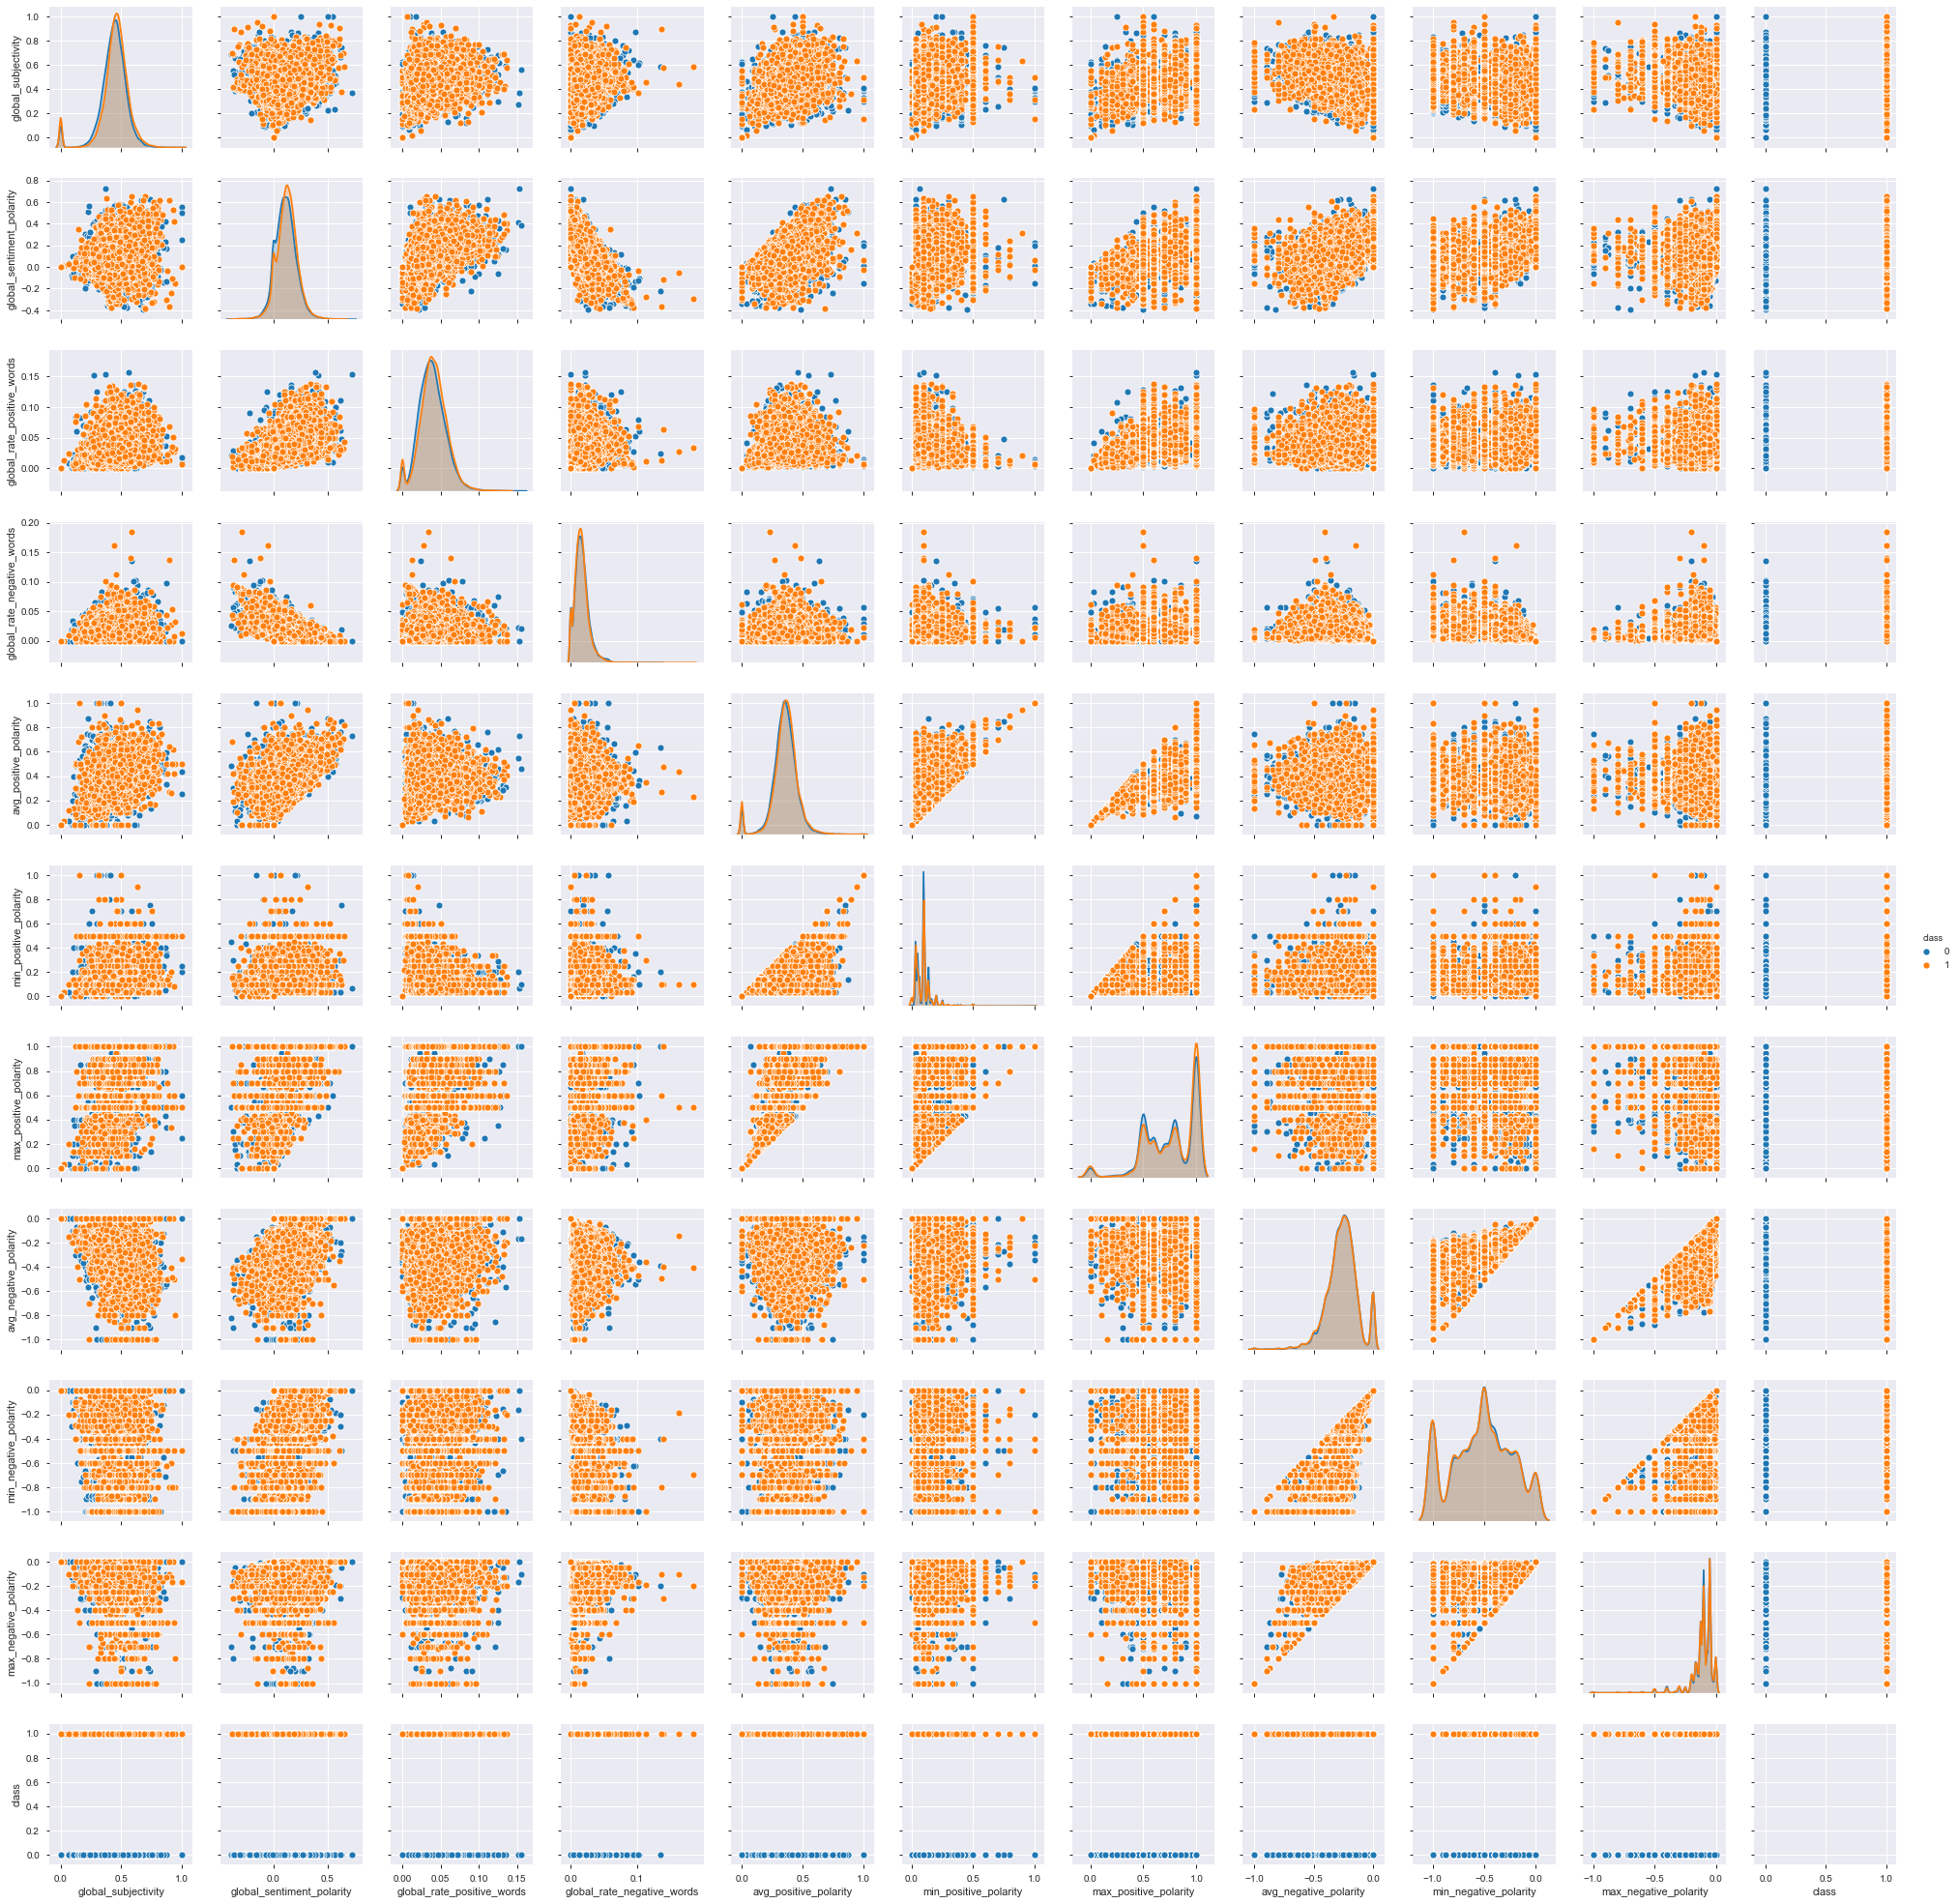

In [110]:
sns.pairplot(df,vars=df[title+['class']],diag_kind='kde',hue='class')
plt.show()

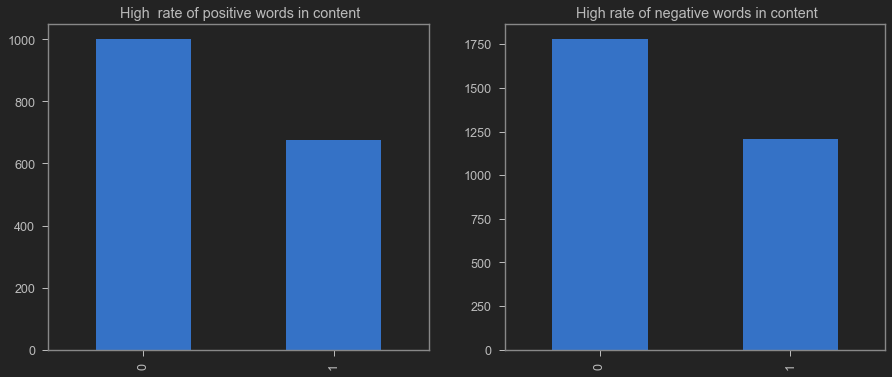

In [49]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
df[(df.rate_positive_words>.4) & (df.rate_positive_words<.5)]['class'].value_counts().plot.bar(ax=axes[0])
df[df.rate_negative_words>0.5]['class'].value_counts().plot.bar(ax=axes[1])
axes[0].title.set_text(' High  rate of positive words in content')
axes[1].title.set_text(' High rate of negative words in content')
plt.show()

## Outlier Treatment

In [230]:
df_new=df.drop(columns=['url','timedelta','days', 'data_channel'])

In [231]:
df_new.weekday_is_friday.value_counts()

0    33942
1     5701
Name: weekday_is_friday, dtype: int64

In [232]:
skew=[]
feature=[]
for i in df_new.columns:
    if (len(df[i].value_counts())>8) & (i!='shares'):
        feature.append(i)
        skew.append(df[i].skew()) 

In [233]:
df_skew=pd.DataFrame({'features':feature,'skewness_before':skew})

In [234]:
df_skew

features  skewness_before
0                 n_tokens_title         0.165278
1               n_tokens_content         2.945817
2                n_unique_tokens        -1.458581
3               n_non_stop_words        -5.531757
4       n_non_stop_unique_tokens        -2.406115
5                      num_hrefs         4.013445
6                 num_self_hrefs         5.173277
7                       num_imgs         3.947228
8                     num_videos         7.019447
9           average_token_length        -4.575946
10                  num_keywords        -0.147258
11                    kw_min_min         2.374903
12                    kw_max_min        35.327994
13                    kw_avg_min        31.305781
14                    kw_min_max        10.386263
15                    kw_max_max        -2.644936
16                    kw_avg_max         0.624345
17                    kw_min_avg         0.468042
18                    kw_max_avg        16.411515
19                    kw_avg_avg         5.760098
20     self_reference_min_shares        26.264047
21     self_reference_max_shares        13.870689
22    self_reference_avg_sharess        17.913869
23                        LDA_00         1.567428
24                        LDA_01         2.086686
25                        LDA_02         1.311661
26                        LDA_03         1.238681
27                        LDA_04         1.173096
28           global_subjectivity        -1.372325
29     global_sentiment_polarity         0.105416
30    global_rate_positive_words         0.323230
31    global_rate_negative_words         1.492006
32           rate_positive_words        -1.422888
33           rate_negative_words         0.407307
34         avg_positive_polarity        -0.724378
35         min_positive_polarity         3.040595
36         max_positive_polarity        -0.939589
37         avg_negative_polarity        -0.551781
38         min_negative_polarity        -0.073173
39         max_negative_polarity        -3.459821
40            title_subjectivity         0.816049
41      title_sentiment_polarity         0.396085
42        abs_title_subjectivity        -0.624206
43  abs_title_sentiment_polarity         1.704159

### Applying boxcox transformation to treat skewness

In [235]:
from scipy.stats import boxcox

In [236]:
for i in df_skew.features:
    if (min(df_new[i])<=0):
        df_new[i]=df_new[i]+np.abs(min(df_new[i]))+1

### Before boxcox transformation

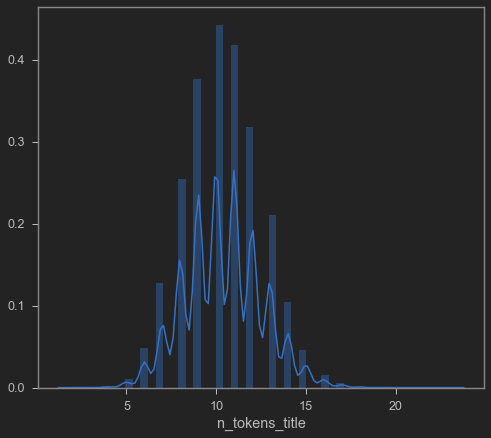

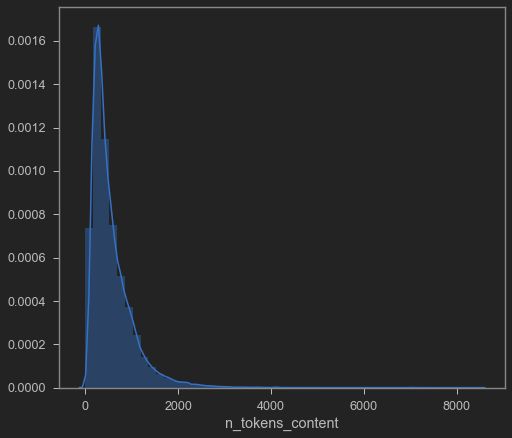

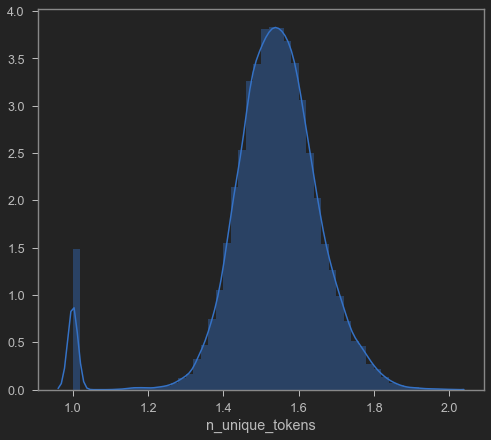

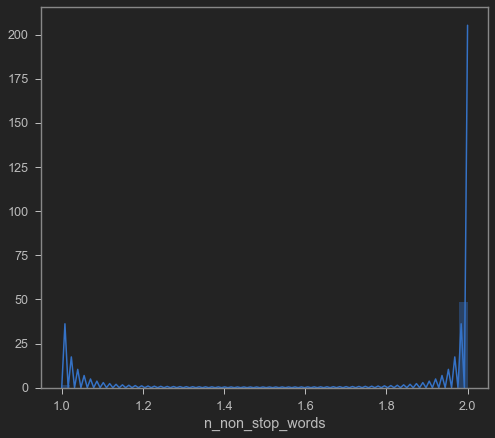

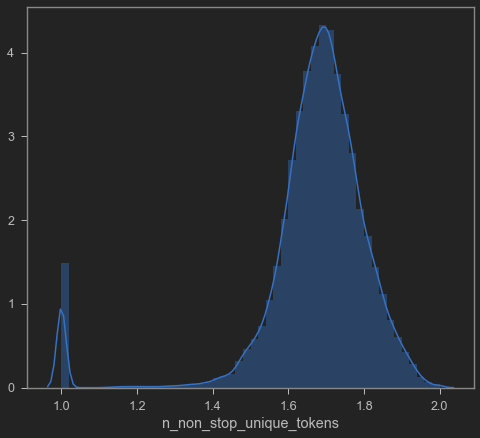

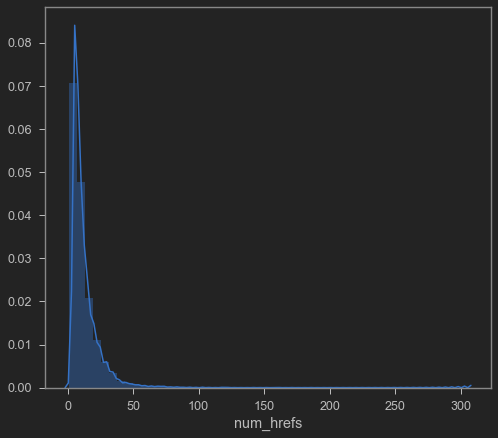

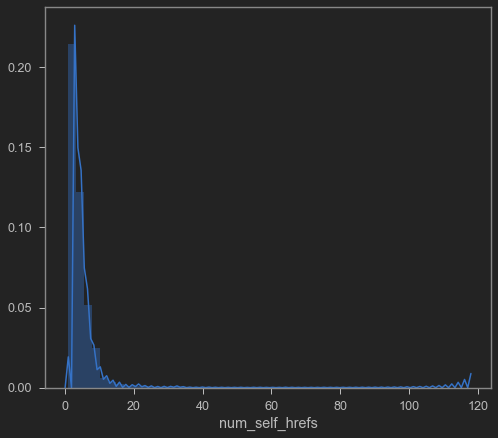

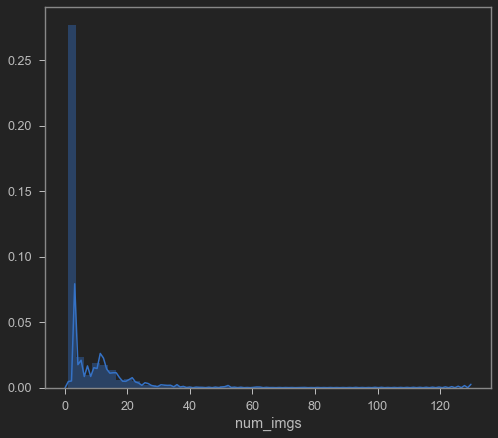

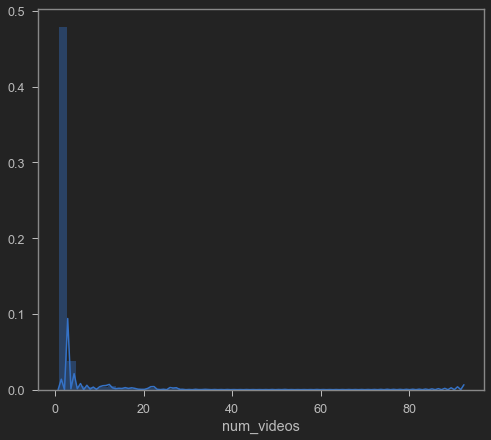

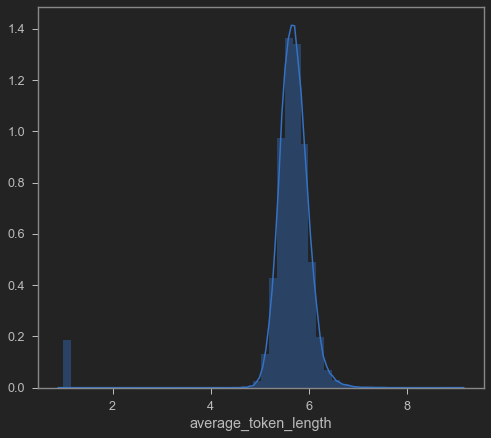

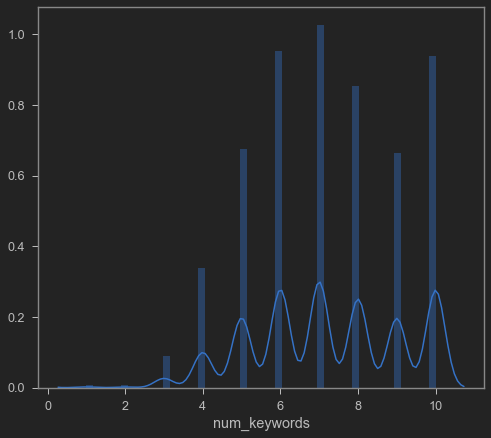

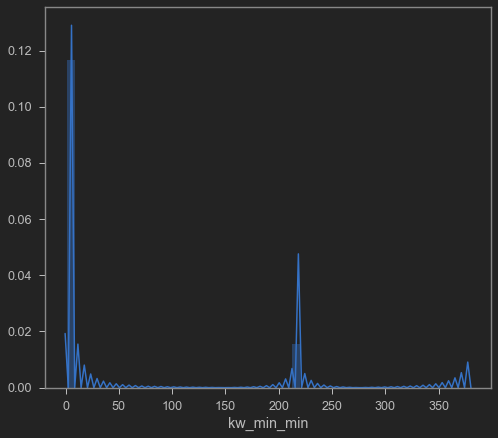

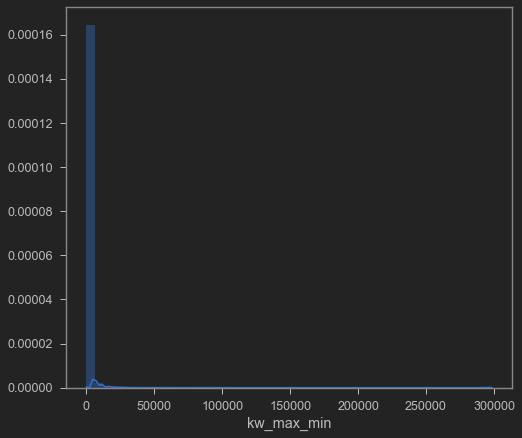

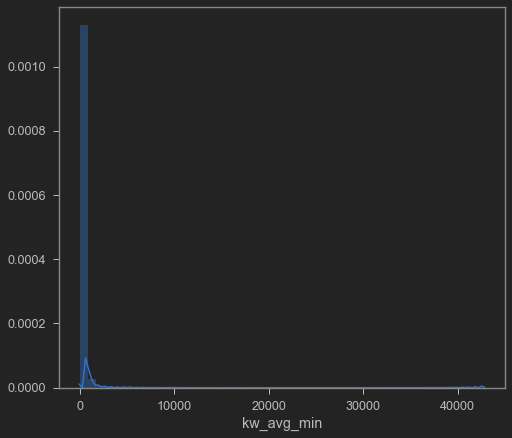

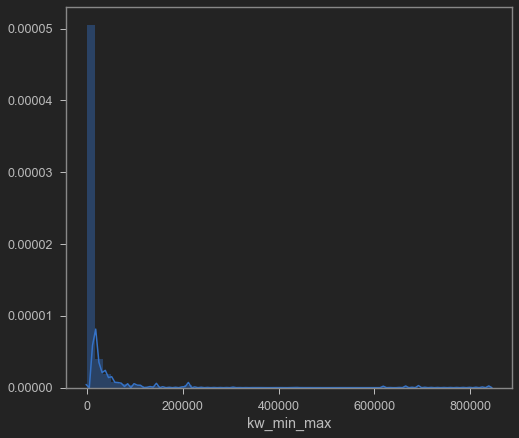

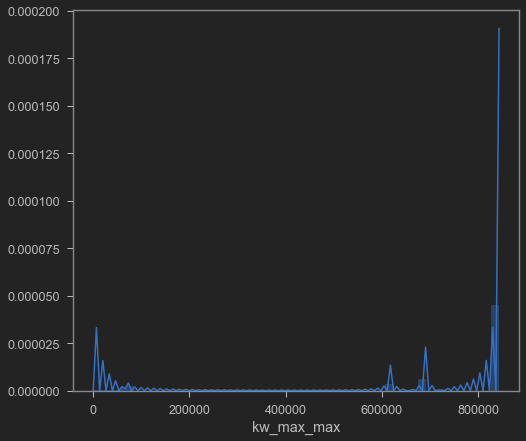

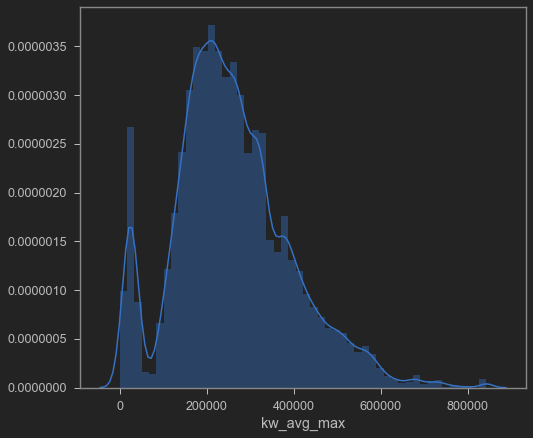

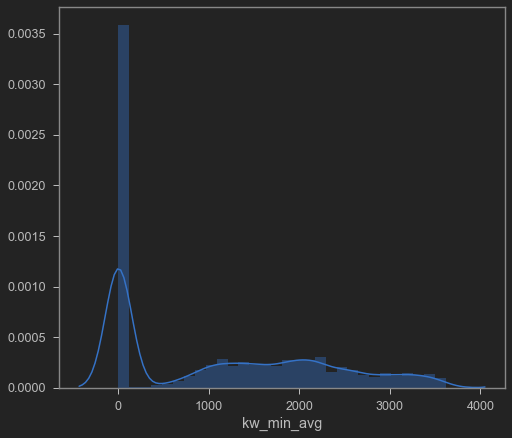

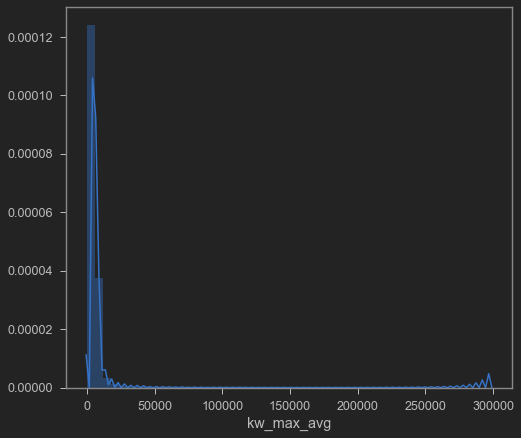

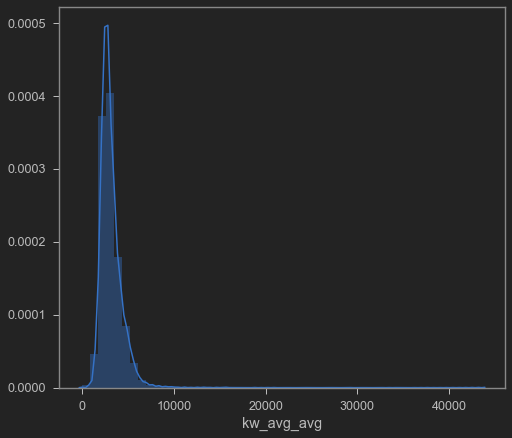

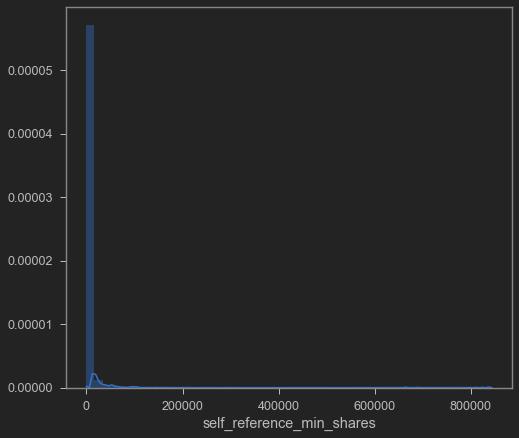

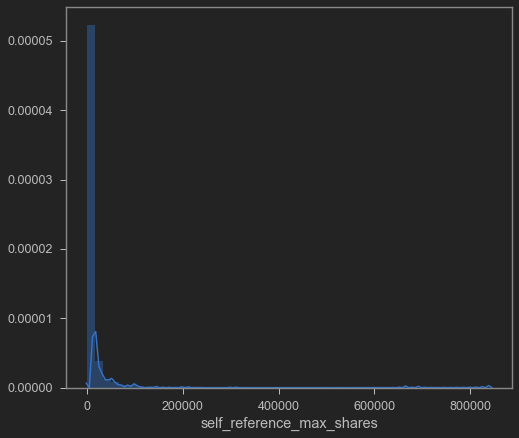

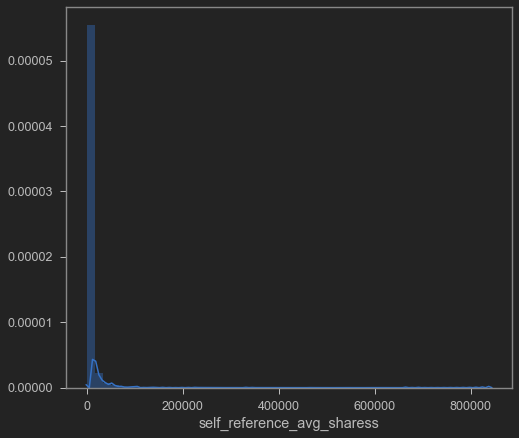

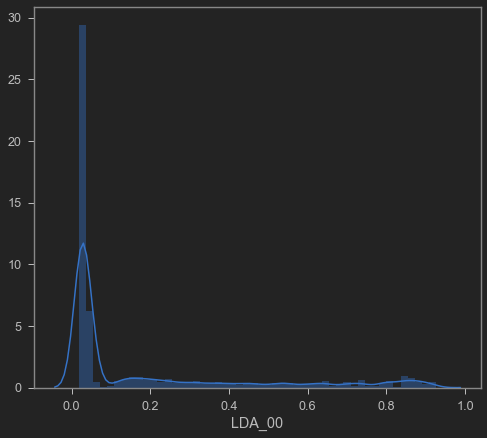

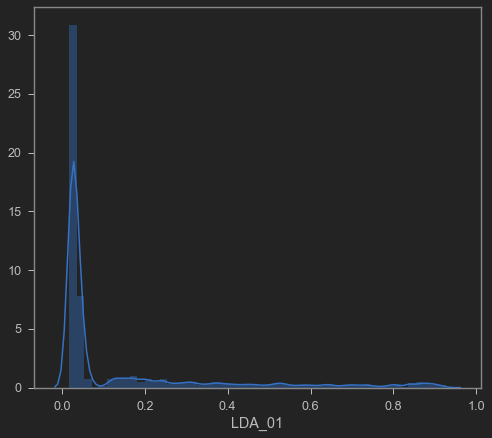

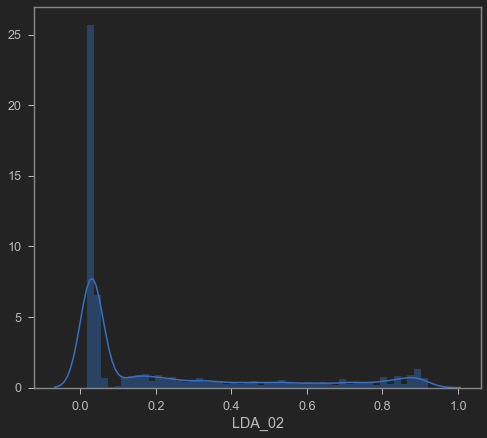

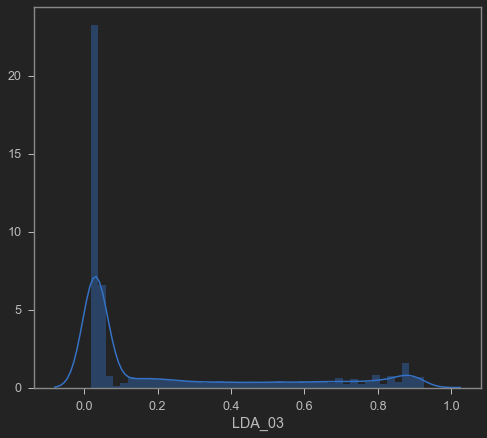

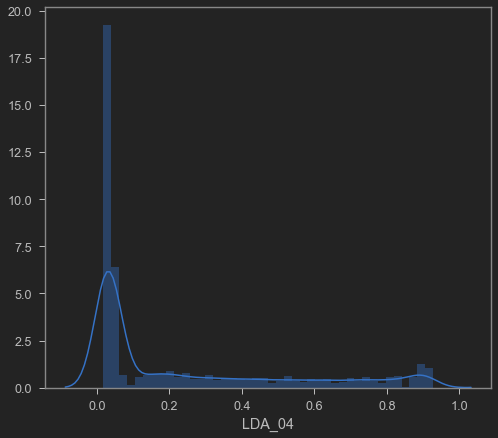

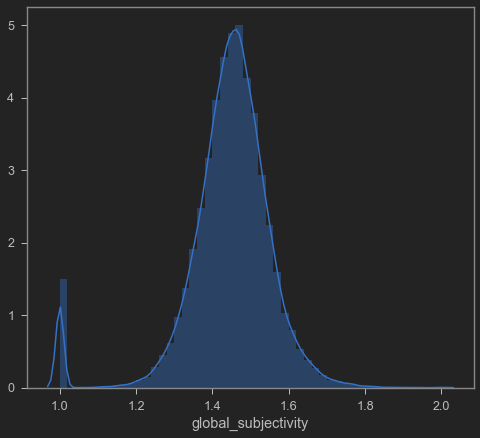

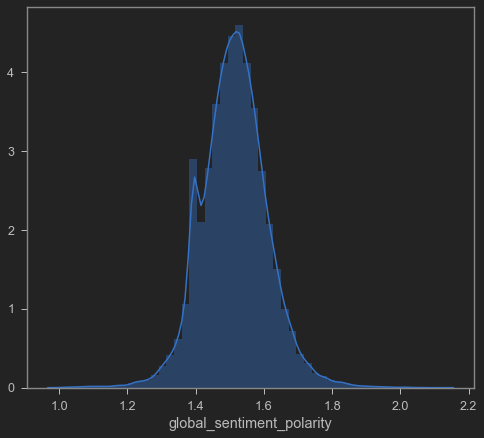

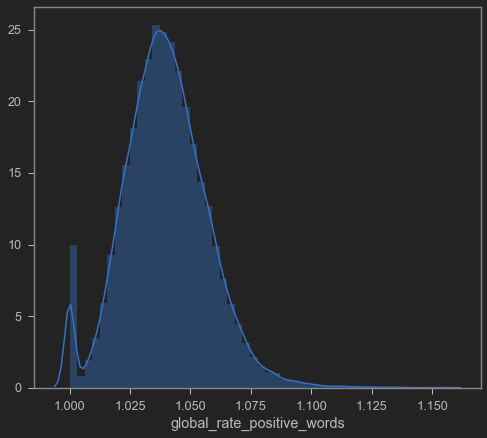

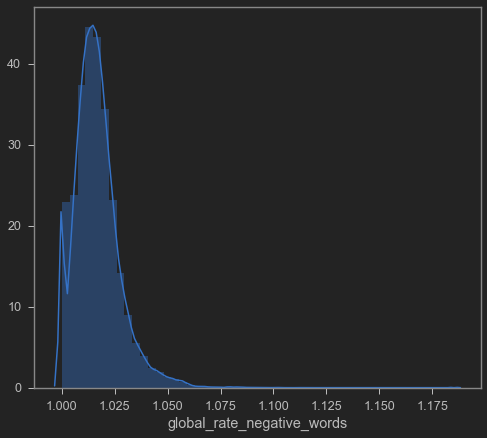

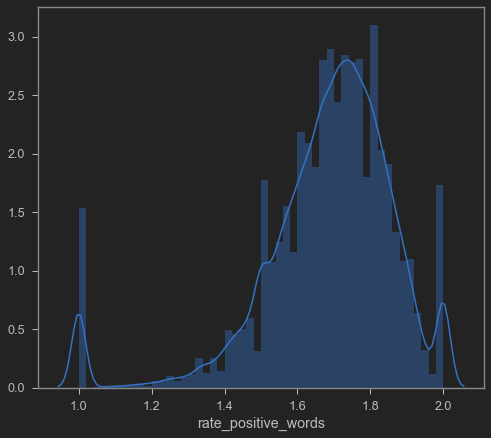

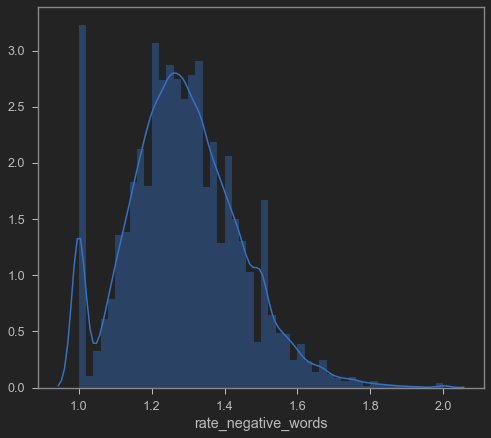

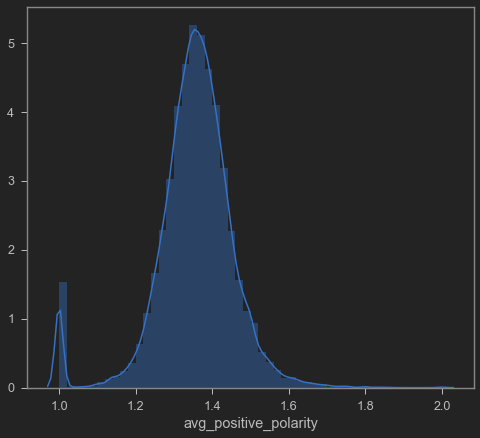

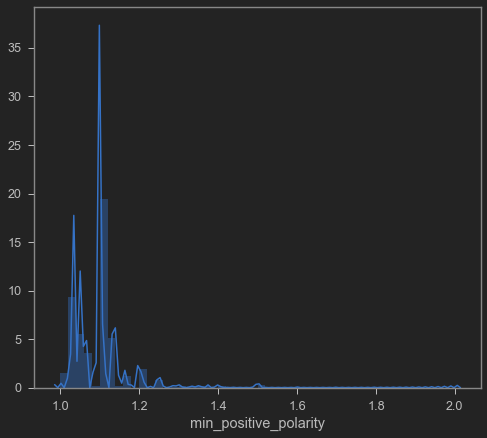

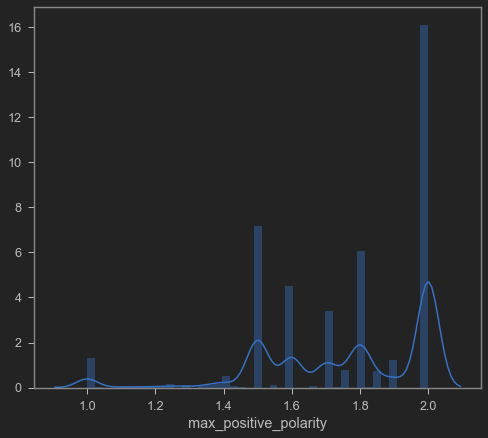

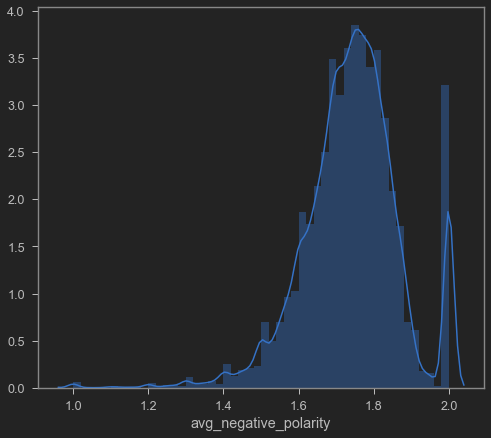

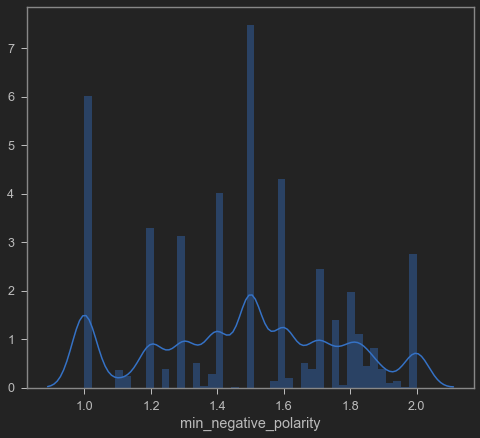

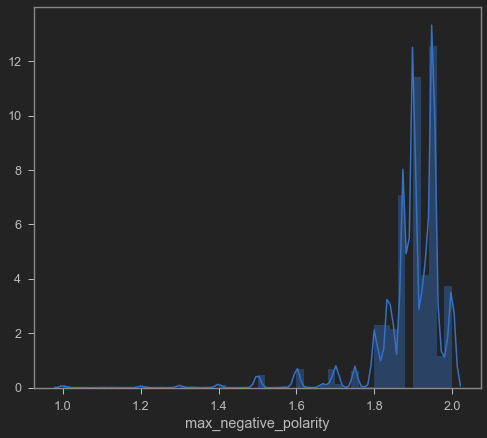

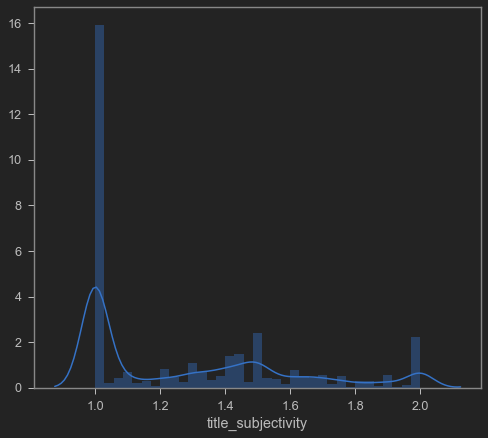

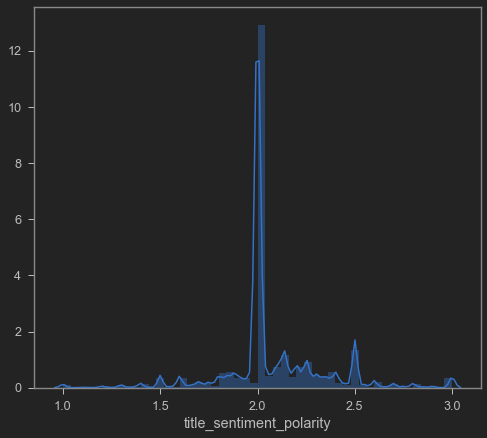

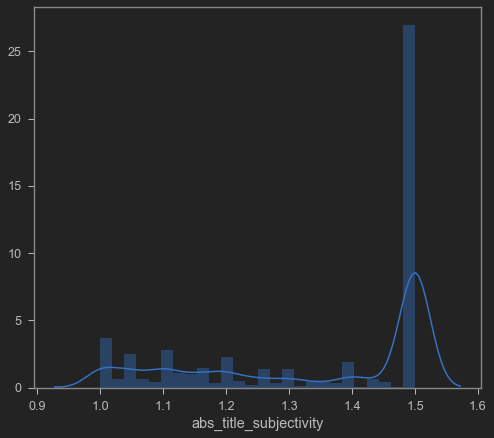

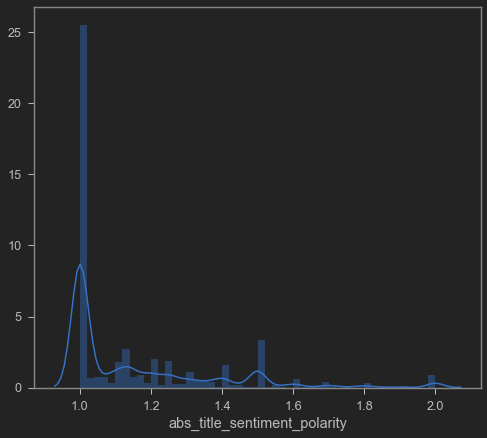

In [237]:
for i in df_skew.features:
    sns.distplot(df_new[i])
    plt.show()

In [238]:
for i in df_skew.features:
    df_new[i]=boxcox(df_new[i])[0]

### After boxcox

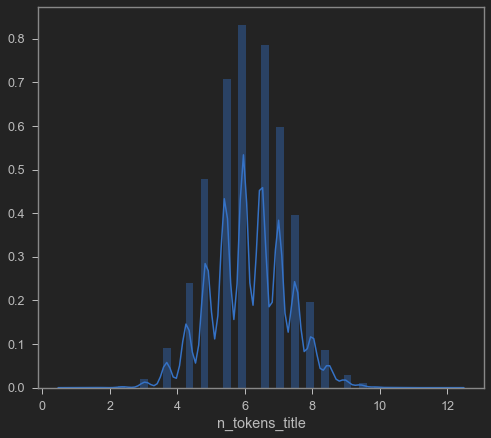

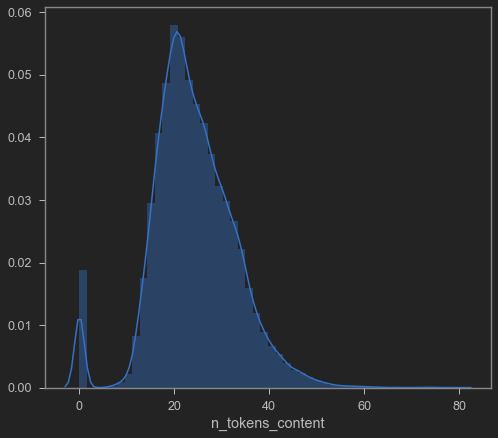

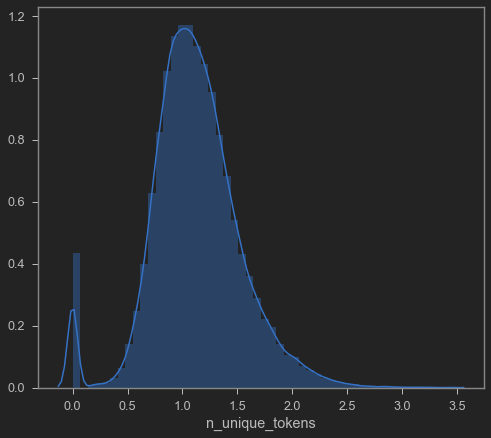

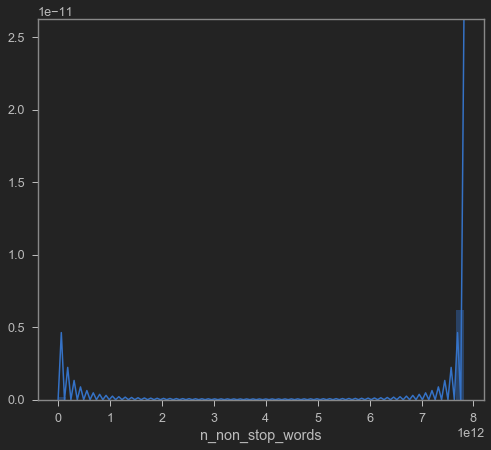

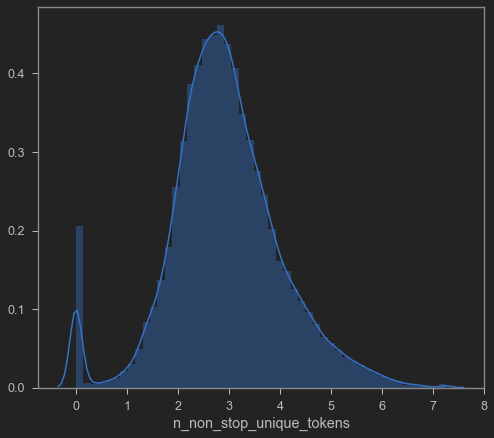

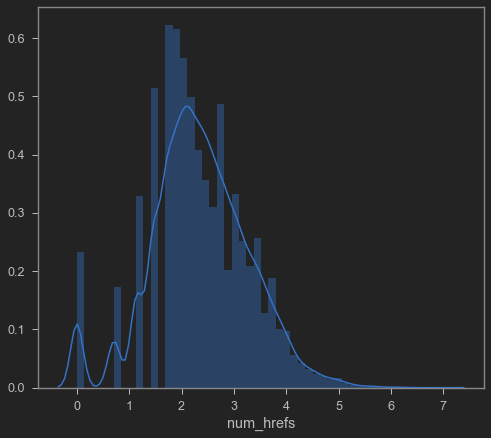

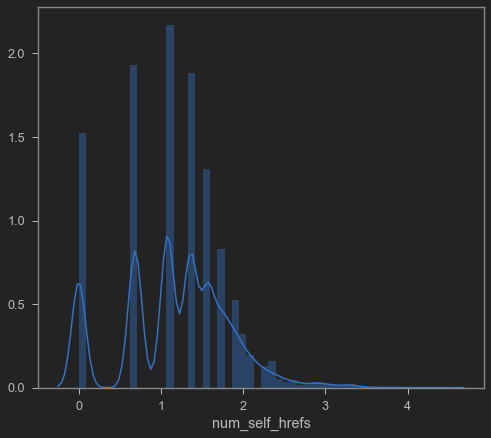

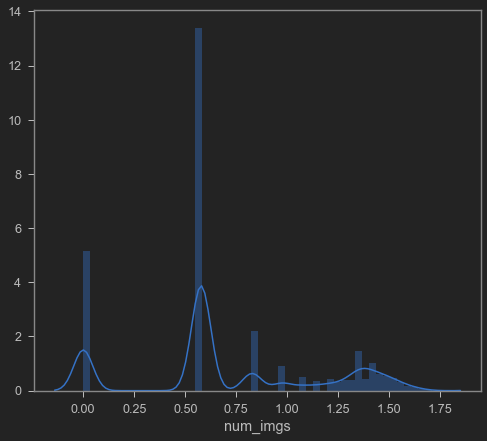

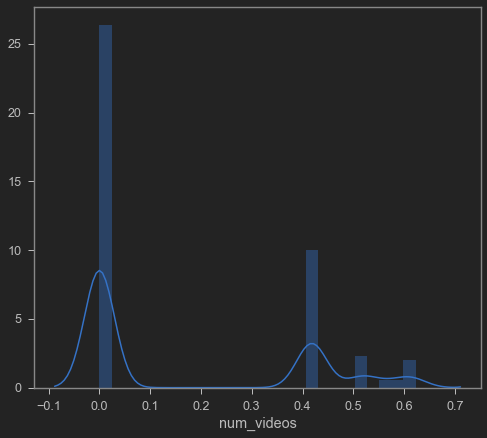

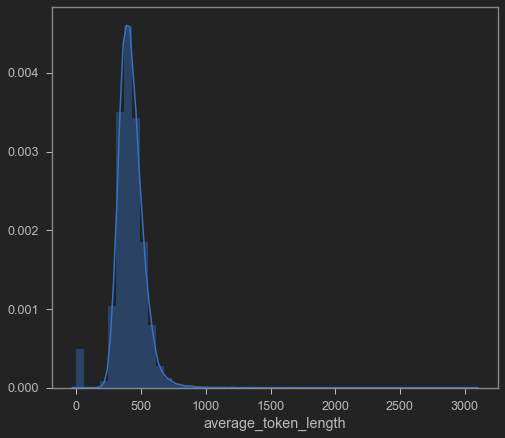

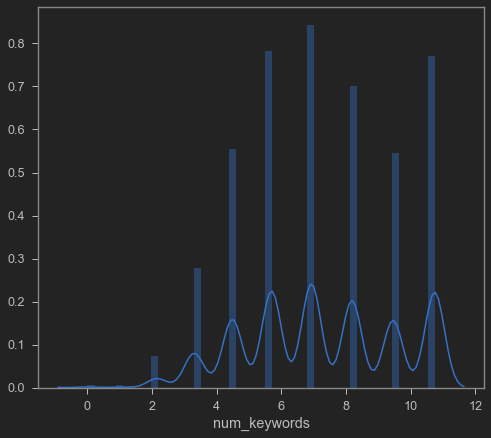

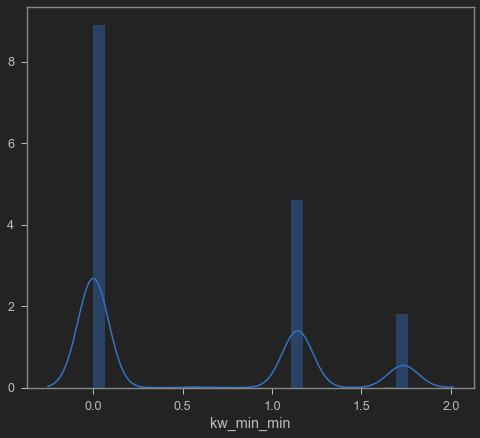

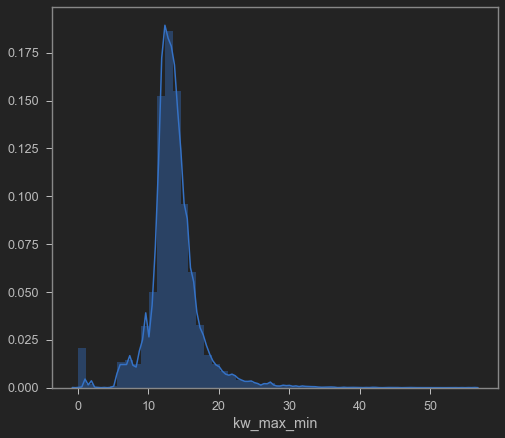

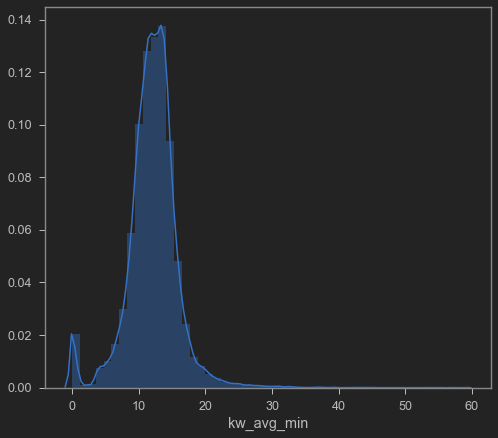

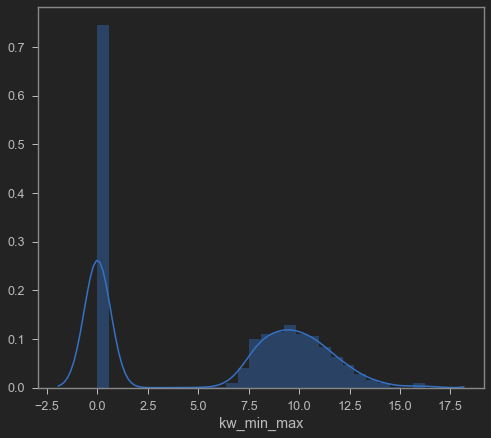

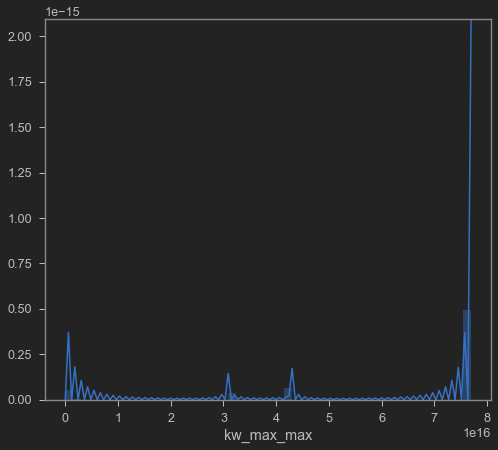

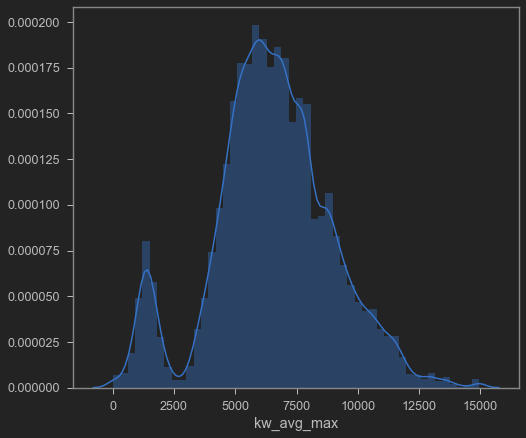

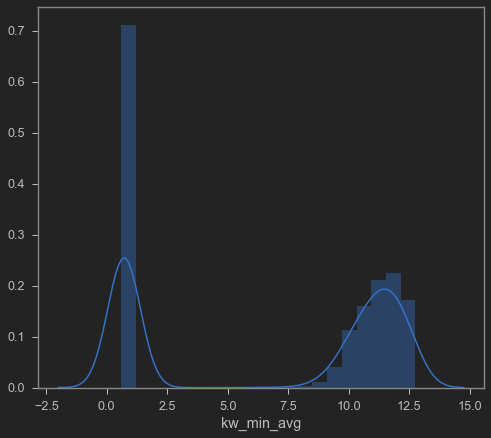

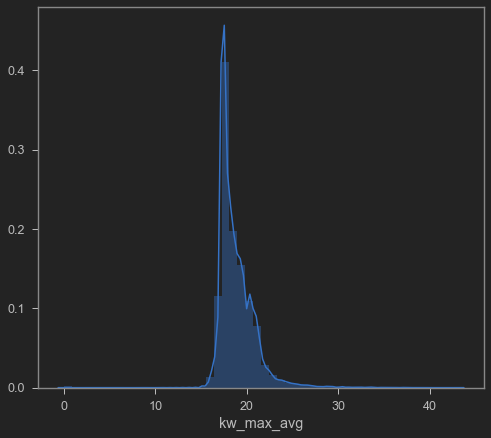

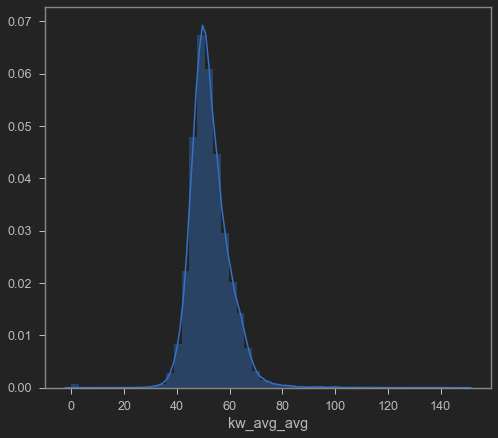

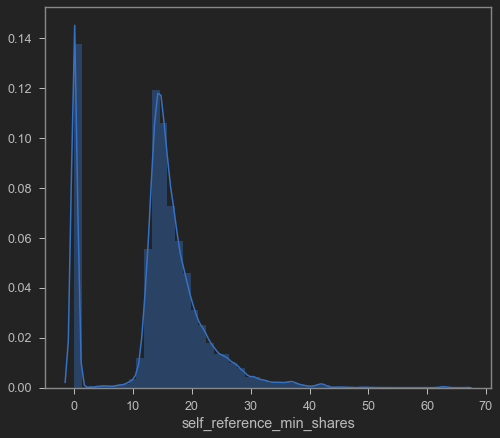

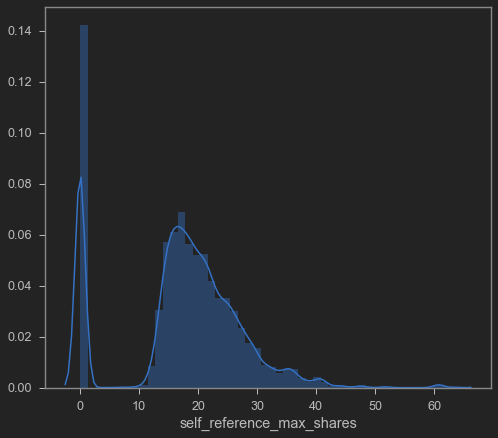

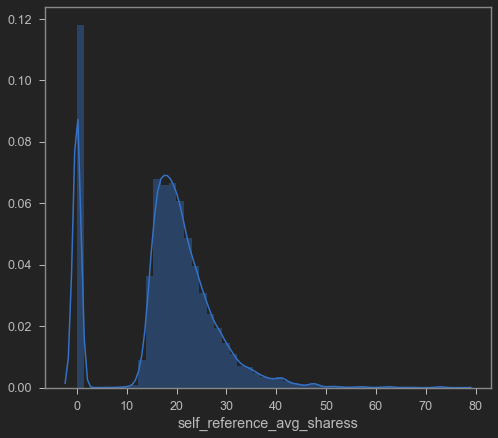

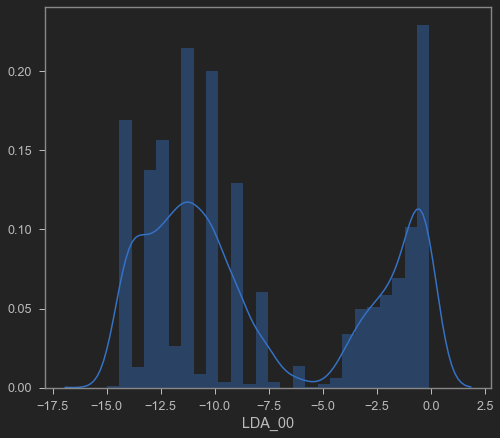

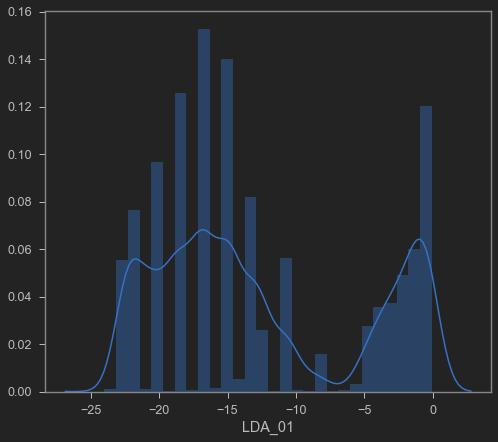

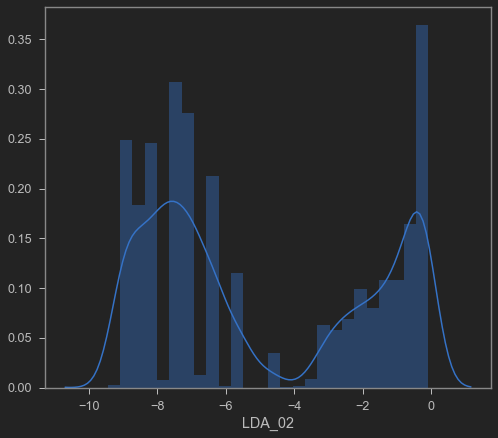

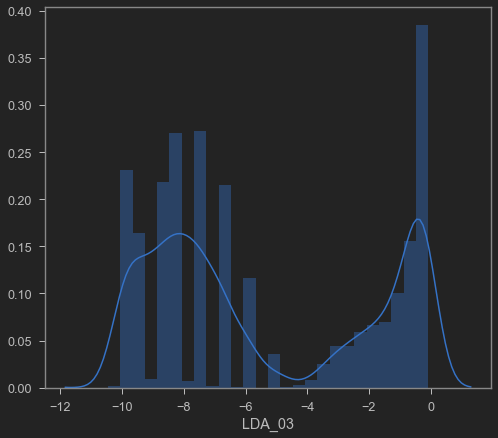

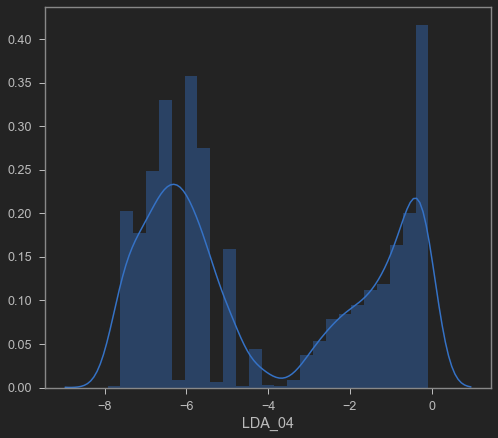

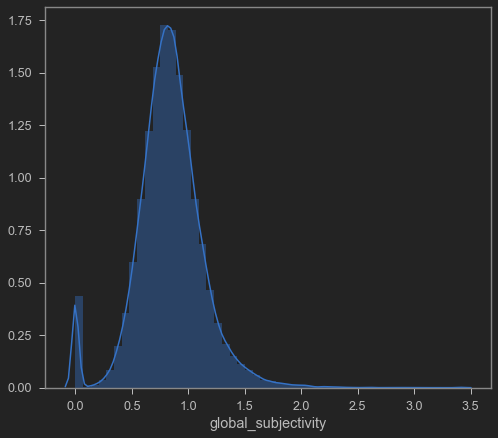

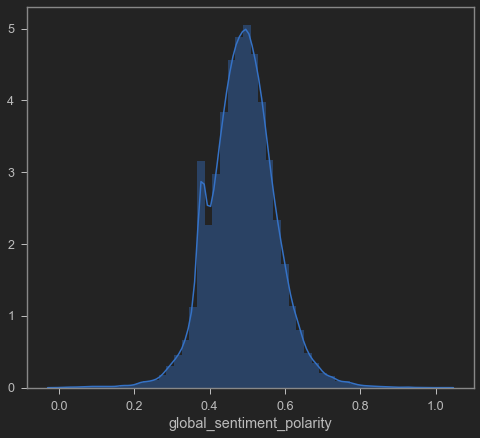

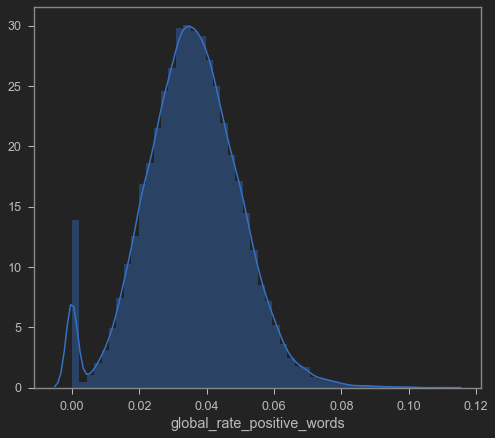

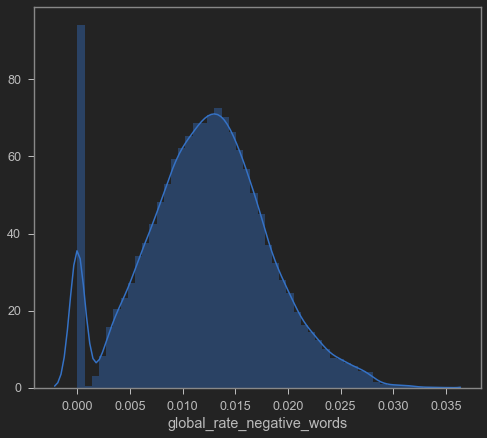

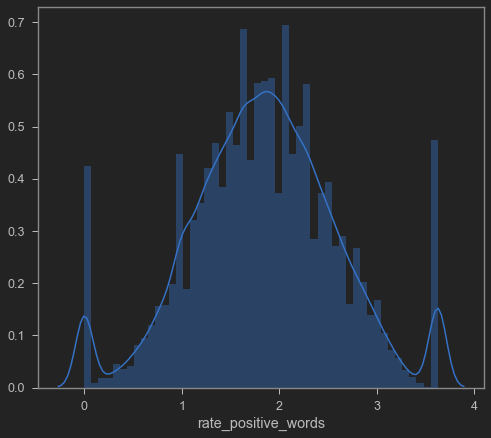

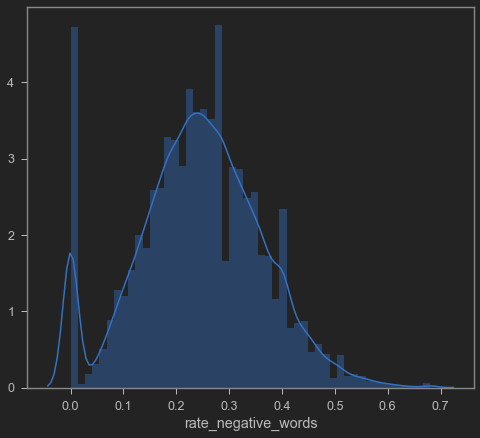

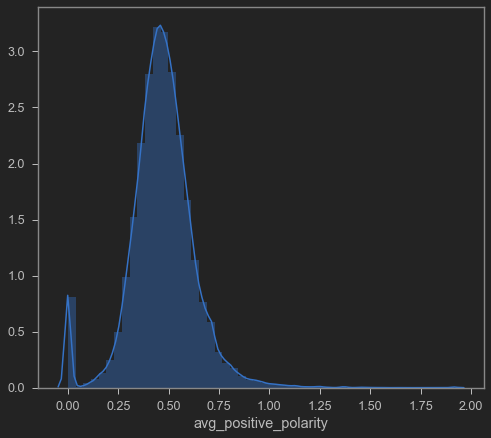

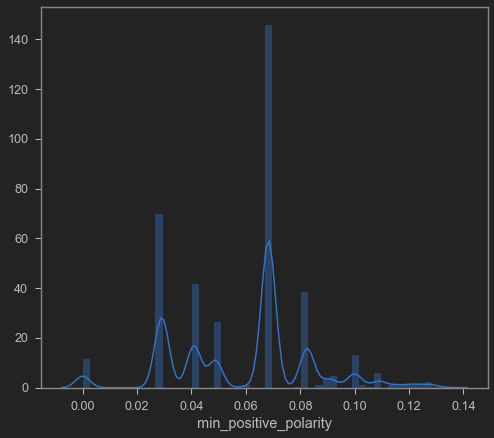

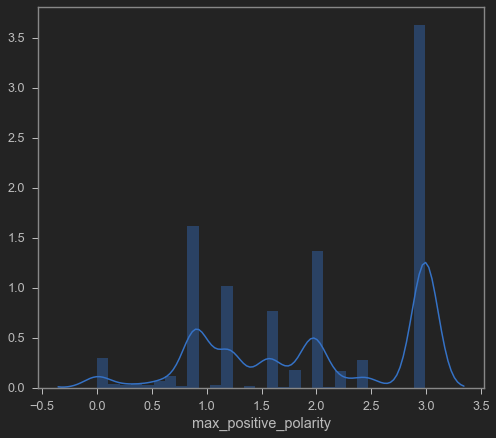

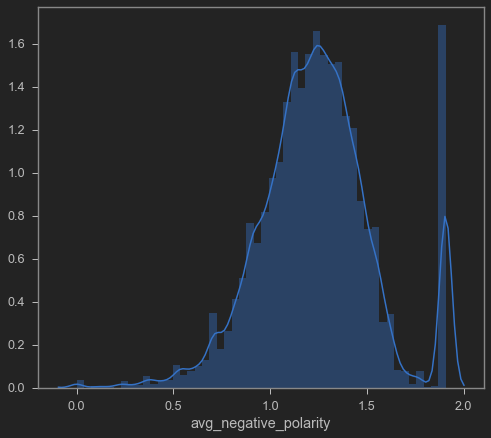

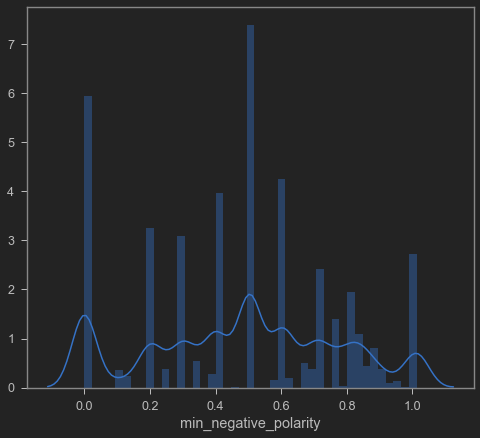

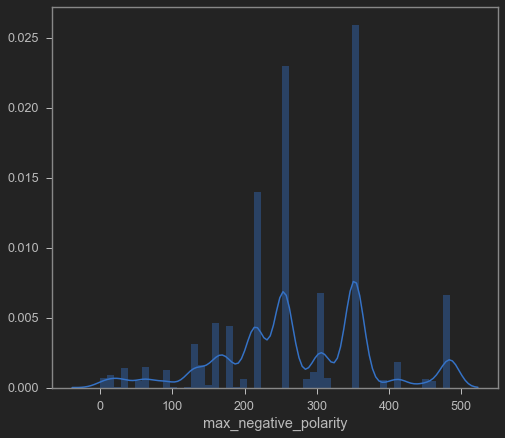

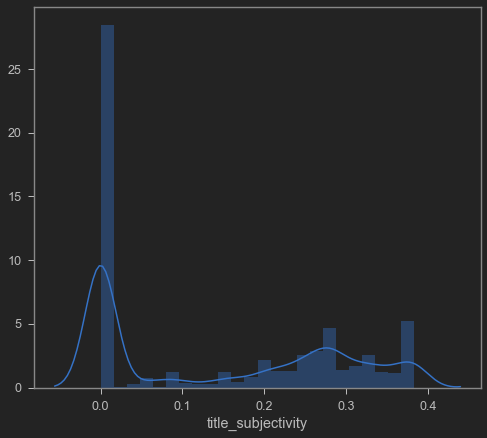

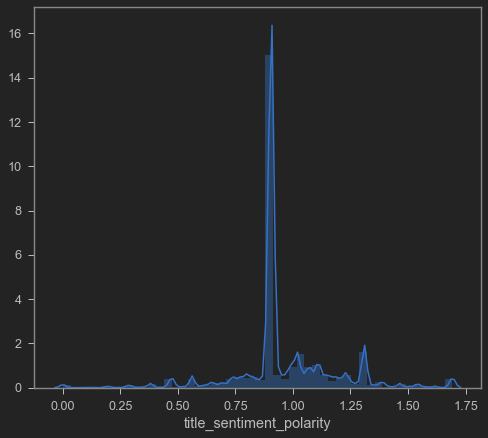

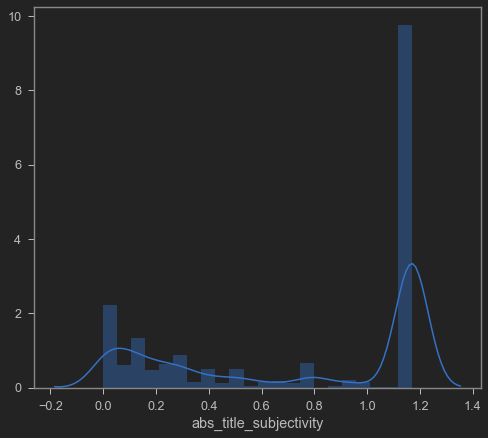

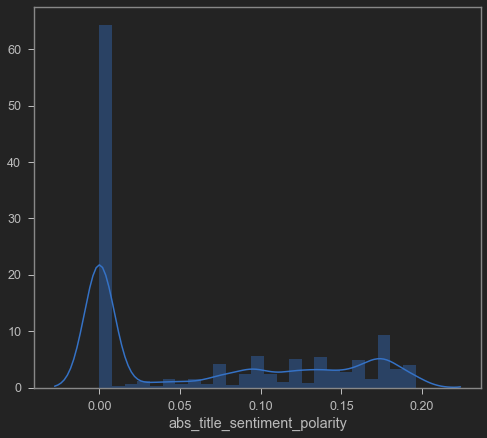

In [239]:
for i in df_skew.features:
    sns.distplot(df_new[i])
    plt.show()

In [240]:
skew_after=[]
for i in df_new.columns:
    if (len(df[i].value_counts())>8) & (i!='shares'):
        skew_after.append(df_new[i].skew()) 

In [241]:
df_skew['skewness_after']=skew_after

In [242]:
df_skew

features  skewness_before  skewness_after
0                 n_tokens_title         0.165278       -0.001479
1               n_tokens_content         2.945817        0.148320
2                n_unique_tokens        -1.458581        0.154094
3               n_non_stop_words        -5.531757       -5.531757
4       n_non_stop_unique_tokens        -2.406115        0.090153
5                      num_hrefs         4.013445        0.009333
6                 num_self_hrefs         5.173277       -0.000940
7                       num_imgs         3.947228        0.180154
8                     num_videos         7.019447        0.671934
9           average_token_length        -4.575946        0.361297
10                  num_keywords        -0.147258       -0.088994
11                    kw_min_min         2.374903        0.547576
12                    kw_max_min        35.327994        0.468495
13                    kw_avg_min        31.305781        0.426021
14                    kw_min_max        10.386263       -0.064142
15                    kw_max_max        -2.644936       -1.762517
16                    kw_avg_max         0.624345       -0.054478
17                    kw_min_avg         0.468042       -0.223021
18                    kw_max_avg        16.411515        0.766528
19                    kw_avg_avg         5.760098        0.610982
20     self_reference_min_shares        26.264047       -0.029711
21     self_reference_max_shares        13.870689       -0.100724
22    self_reference_avg_sharess        17.913869       -0.090111
23                        LDA_00         1.567428        0.431634
24                        LDA_01         2.086686        0.481379
25                        LDA_02         1.311661        0.300653
26                        LDA_03         1.238681        0.342048
27                        LDA_04         1.173096        0.243742
28           global_subjectivity        -1.372325        0.227650
29     global_sentiment_polarity         0.105416        0.025518
30    global_rate_positive_words         0.323230       -0.012868
31    global_rate_negative_words         1.492006        0.001887
32           rate_positive_words        -1.422888       -0.010640
33           rate_negative_words         0.407307       -0.000068
34         avg_positive_polarity        -0.724378        0.210270
35         min_positive_polarity         3.040595        0.013354
36         max_positive_polarity        -0.939589       -0.227606
37         avg_negative_polarity        -0.551781        0.069481
38         min_negative_polarity        -0.073173       -0.061590
39         max_negative_polarity        -3.459821       -0.114785
40            title_subjectivity         0.816049        0.253249
41      title_sentiment_polarity         0.396085        0.119313
42        abs_title_subjectivity        -0.624206       -0.414083
43  abs_title_sentiment_polarity         1.704159        0.496224

## Splitting dependent and independent variable

In [ ]:
#for splitting on mean

In [80]:
X1=df_new.drop(columns=['shares','class','class2'])
Y1=df_new['class2']

In [82]:
#for splitting on median

In [243]:
X=df_new.drop(columns=['shares','class'])
Y=df_new['class']

## Checking Mulitcollinearity

In [244]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[[variance_inflation_factor(X.values,i) for i in range(X.shape[1])],[i for i in X.columns]]

In [245]:
df_vif=pd.DataFrame({'features':vif[1],'vif':vif[0]})

In [246]:
df_vif[df_vif.vif>=10]

Empty DataFrame
Columns: [features, vif]
Index: []

In [344]:
#No multicollinearity found as all vif values less than 10

## Train Test split

In [52]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=.3,random_state=1)

In [247]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=1)

In [70]:
X_train.shape

(27750, 58)

In [89]:
Y_train.shape

(27750,)

## Logistic Regression

In [56]:
lr=LogisticRegression(fit_intercept=True)
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
from sklearn.model_selection import cross_val_score

In [58]:
s=cross_val_score(lr,X_train,Y_train,scoring='roc_auc',cv=10,n_jobs=-1)

In [59]:
bias=1-s

In [60]:
bias.mean()#high bias error

0.47764511544325705

In [61]:
np.var(s)#low variance error

0.00010429743750945421

In [62]:
y_train_pred=lr.predict(X_train)#gives classified values in 0 and 1 
y_train_prob=lr.predict_proba(X_train)[:,1]# gives probabilities
    
y_test_pred=lr.predict(X_test)
y_test_prob=lr.predict_proba(X_test)[:,1]
    
print(f'accuracy score of train {accuracy_score(Y_train,y_train_pred)}')
print(f'accuracy score of test {accuracy_score(Y_test,y_test_pred)}')
    
print(f'AUC  of train {roc_auc_score(Y_train,y_train_prob)}')
print(f'AUC of test {roc_auc_score(Y_test,y_test_prob)}')

accuracy score of train 0.5081801801801802
accuracy score of test 0.5027745081553725
AUC  of train 0.5223827149558327
AUC of test 0.5179116528661089


In [63]:
confusion_matrix(Y_test,y_test_pred)

array([[5980,    0],
       [5914,    0]], dtype=int64)

In [64]:
# none of the popular cases have been predicted correctly by logistic regression

In [65]:
report_lr=classification_report(Y_test,y_test_pred,output_dict=True)
print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5980
           1       0.00      0.00      0.00      5914

    accuracy                           0.50     11894
   macro avg       0.25      0.50      0.33     11894
weighted avg       0.25      0.50      0.34     11894



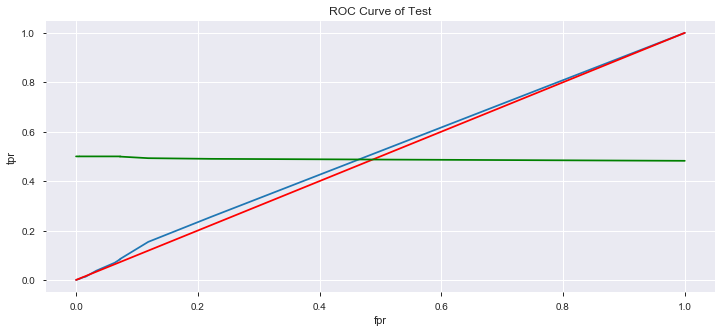

In [66]:
plt.figure(figsize=(12,5))
fpr,tpr,thresholds=roc_curve(Y_test,y_test_prob)
    
thresholds[0]=thresholds[0]-1# first threshold value  is always greater than 1
    #print(f'threshold value are {thresholds}')
df_metric=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':thresholds})
plt.title('ROC Curve of Test')
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,color='r')
plt.plot(fpr,thresholds,color='g')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [ ]:
# this is the worst model as auc is coming out to be .5

In [68]:
df_analysis.loc[2]=['Logistic Regression Base',roc_auc_score(Y_test,y_test_prob),accuracy_score(Y_test,y_test_pred),report_lr['1']['precision'],report_lr['1']['recall']]

In [248]:
from scipy.stats import randint as sp_randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,accuracy_score

## Decision Tree Classifier

In [69]:
dtree=DecisionTreeClassifier(random_state=1)
params={'max_depth':sp_randint(2,10),
       'min_samples_split':sp_randint(2,20),
       'min_samples_leaf':sp_randint(1,20),
       'criterion':['gini','entropy']}
rsearch=RandomizedSearchCV(dtree,param_distributions=params,cv=10,random_state=1,scoring='roc_auc',n_jobs=-1)
rsearch.fit(X_train,Y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=1,
            

In [70]:
results=pd.DataFrame(rsearch.cv_results_)


In [71]:
results['var']=results.std_test_score.apply(lambda x:x*x)
results['bias_err']=results.mean_test_score.apply(lambda x:1-x)
results['avg_error']=results[['bias_err','var']].agg('mean',axis=1)
results[results.avg_error==min(results.avg_error)]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
7        2.40186      0.202047         0.007579        0.003152   

  param_criterion param_max_depth param_min_samples_leaf  \
7         entropy               8                      1   

  param_min_samples_split                                             params  \
7                      15  {'criterion': 'entropy', 'max_depth': 8, 'min_...   

   split0_test_score  ...  split6_test_score  split7_test_score  \
7           0.678993  ...           0.685637           0.655735   

   split8_test_score  split9_test_score  mean_test_score  std_test_score  \
7           0.689563           0.696705         0.678271        0.011959   

   rank_test_score       var  bias_err  avg_error  
7                1  0.000143  0.321729   0.160936  

[1 rows x 25 columns]

In [72]:
rsearch.best_params_#same results taking var error into account

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 15}

In [73]:
rsearch.best_score_

0.6782707644671777

In [74]:
dtree=DecisionTreeClassifier(**rsearch.best_params_)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [75]:
y_train_pred=dtree.predict(X_train)
y_train_prob=dtree.predict_proba(X_train)[:,1]
print(f'Accuracy of train {accuracy_score(Y_train,y_train_pred)}')
print(f'AUC of train {roc_auc_score(Y_train,y_train_prob)}')
print(f'confusion matrix {confusion_matrix(Y_train,y_train_pred)}')
print('\n')
y_test_pred=dtree.predict(X_test)
y_test_prob=dtree.predict_proba(X_test)[:,1]
print(f'confusion matrix {confusion_matrix(Y_test,y_test_pred)}')
print(f'Accuracy of test {accuracy_score(Y_test,y_test_pred)}')
print(f'AUC of test {roc_auc_score(Y_test,y_test_prob)}')


Accuracy of train 0.6717477477477477
AUC of train 0.7425680008389721
confusion matrix [[9597 4505]
 [4604 9044]]


confusion matrix [[3872 2108]
 [2235 3679]]
Accuracy of test 0.6348579115520431
AUC of test 0.6815440064559691


In [76]:
report=classification_report(Y_test,y_test_pred,output_dict=True)

In [77]:
print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      5980
           1       0.64      0.62      0.63      5914

    accuracy                           0.63     11894
   macro avg       0.63      0.63      0.63     11894
weighted avg       0.63      0.63      0.63     11894



In [67]:
df_analysis=pd.DataFrame({'Model':[],'AUC_Score':[],'Accuracy':[],'Precision':[],'Recall':[]})

In [78]:
df_analysis.loc[0]=(['Decison Tree Base',roc_auc_score(Y_test,y_test_prob),accuracy_score(Y_test,y_test_pred),report['1']['precision'],report['1']['recall']])

## Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
from scipy.stats import randint as sp_randint
rf=RandomForestClassifier(random_state=1)
params={'n_estimators':sp_randint(50,500),
       'max_depth':sp_randint(2,10),
       'min_samples_leaf':sp_randint(1,20),
       'min_samples_split':sp_randint(2,20),
       'criterion':['gini','entropy']
        #'max_features':sp_randint(2,31)
       }
rsearch1=RandomizedSearchCV(estimator=rf,param_distributions=params,cv=10,random_state=1,scoring='roc_auc',n_jobs=-1)
rsearch1.fit(X_train,Y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [81]:
results1=pd.DataFrame(rsearch1.cv_results_)


results1['var']=results1.std_test_score.apply(lambda x:x*x)
results1['bias_err']=results1.mean_test_score.apply(lambda x:1-x)
results1['avg_error']=results1[['bias_err','var']].agg('mean',axis=1)
results1[results1.avg_error==min(results1.avg_error)]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5      71.245361       1.73373         0.518864        0.019672   

  param_criterion param_max_depth param_min_samples_leaf  \
5            gini               9                     10   

  param_min_samples_split param_n_estimators  \
5                      19                402   

                                              params  ...  split6_test_score  \
5  {'criterion': 'gini', 'max_depth': 9, 'min_sam...  ...           0.727413   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
5           0.695532           0.733626           0.724974         0.720004   

   std_test_score  rank_test_score       var  bias_err  avg_error  
5        0.011518                1  0.000133  0.279996   0.140064  

[1 rows x 26 columns]

In [82]:
rsearch1.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 10,
 'min_samples_split': 19,
 'n_estimators': 402}

In [83]:
rsearch1.best_score_

0.7200043693965434

In [49]:
#rf=RandomForestClassifier(**rsearch1.best_params_)
rf=RandomForestClassifier(criterion='gini',max_depth=9,min_samples_leaf=10,min_samples_split=19,n_estimators=402)
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=19,
                       min_weight_fraction_leaf=0.0, n_estimators=402,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_train_pred=rf.predict(X_train)
y_train_prob=rf.predict_proba(X_train)[:,1]
print(f'Accuracy of train {accuracy_score(Y_train,y_train_pred)}')
print(f'AUC of train {roc_auc_score(Y_train,y_train_prob)}')
print(f'confusion matrix {confusion_matrix(Y_train,y_train_pred)}')
print('\n')
y_test_pred=rf.predict(X_test)
y_test_prob=rf.predict_proba(X_test)[:,1]
print(f'confusion matrix {confusion_matrix(Y_test,y_test_pred)}')
print(f'Accuracy of test {accuracy_score(Y_test,y_test_pred)}')
print(f'AUC of test {roc_auc_score(Y_test,y_test_prob)}')


Accuracy of train 0.7220540540540541
AUC of train 0.7994810094073124
confusion matrix [[10353  3789]
 [ 3924  9684]]


confusion matrix [[4014 1926]
 [2027 3926]]
Accuracy of test 0.6676196081728748
AUC of test 0.7303270116473544


In [53]:
report2=classification_report(Y_test,y_test_pred,output_dict=True)
print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      5940
           1       0.67      0.66      0.67      5953

    accuracy                           0.67     11893
   macro avg       0.67      0.67      0.67     11893
weighted avg       0.67      0.67      0.67     11893



In [54]:
from sklearn.metrics import matthews_corrcoef

In [55]:
matthews_corrcoef(Y_test,y_test_pred)

0.3352991294595524

In [87]:
df_analysis.loc[1]=(['Random Forest Base',0.729924,report2['accuracy'],report2['1']['precision'],report2['1']['recall']])

In [88]:
df_analysis

Model  AUC_Score  Accuracy  Precision    Recall
2  Logistic Regression Base   0.517912  0.502775   0.000000  0.000000
0         Decison Tree Base   0.681544  0.634858   0.635735  0.622083
1        Random Forest Base   0.729924  0.669245   0.670279  0.658945

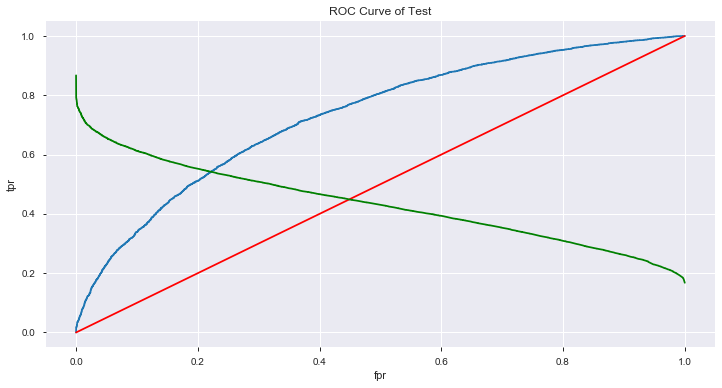

In [89]:
# to plot roc curve
plt.figure(figsize=(12,6))
fpr,tpr,thresholds=roc_curve(Y_test,y_test_prob)
    
thresholds[0]=thresholds[0]-1# first threshold value  is always greater than 1
    #print(f'threshold value are {thresholds}')
df_metric=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':thresholds})
plt.title('ROC Curve of Test')
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,color='r')
plt.plot(fpr,thresholds,color='g')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [56]:
imp=pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['importance'])
imp=imp.sort_values(by='importance',ascending=False)

Text(0.5, 1.0, 'Feature importance ')

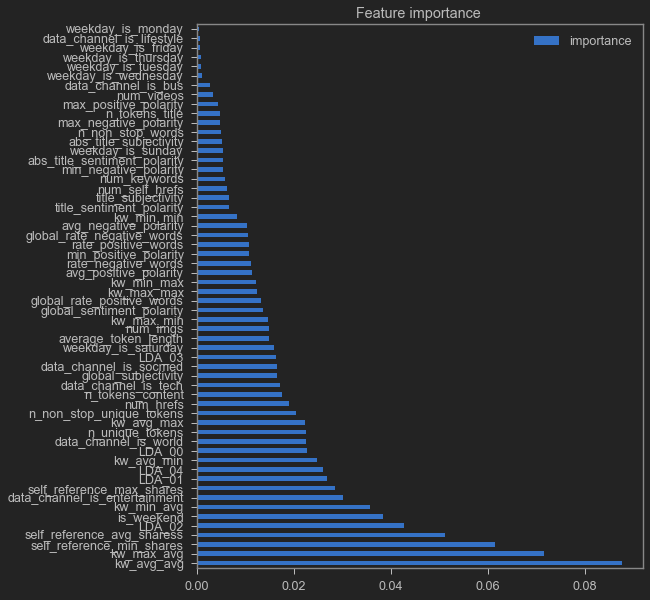

In [57]:

import matplotlib
matplotlib.rcParams['figure.figsize']=(8.0,10.0)
imp.plot(kind='Barh')
plt.title('Feature importance ')

## Base Models Comparison

In [54]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: blue' if v else '' for v in is_max]

In [93]:
df_analysis.style.apply(highlight_max)

## RF with mean as threshold

In [65]:
df['class'].value_counts(1)

0    0.506558
1    0.493442
Name: class, dtype: float64

In [63]:
df.class2.value_counts(1)

0    0.796211
1    0.203789
Name: class2, dtype: float64

In [66]:
df.class2.value_counts()

0    31565
1     8079
Name: class2, dtype: int64

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
from scipy.stats import randint as sp_randint
rf2=RandomForestClassifier(random_state=1)
params={'n_estimators':sp_randint(50,500),
       'max_depth':sp_randint(2,10),
       'min_samples_leaf':sp_randint(1,20),
       'min_samples_split':sp_randint(2,20),
       'criterion':['gini','entropy'],
        'max_features':sp_randint(2,31)
       }
rsearch2=RandomizedSearchCV(estimator=rf2,param_distributions=params,cv=10,random_state=1,scoring='roc_auc')
rsearch2.fit(X1_train,Y1_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [56]:
results_m=pd.DataFrame(rsearch2.cv_results_)


results_m['var']=results_m.std_test_score.apply(lambda x:x*x)
results_m['bias_err']=results_m.mean_test_score.apply(lambda x:1-x)
results_m['avg_error']=results_m[['bias_err','var']].agg('mean',axis=1)
results_m[results_m.avg_error==min(results_m.avg_error)]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4      152.50021      3.313763         0.429209        0.173656   

  param_criterion param_max_depth param_max_features param_min_samples_leaf  \
4            gini               9                 25                     10   

  param_min_samples_split param_n_estimators  ... split6_test_score  \
4                      19                402  ...          0.723204   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
4           0.691903            0.70016            0.69832          0.70542   

   std_test_score  rank_test_score       var  bias_err  avg_error  
4         0.01254                1  0.000157   0.29458   0.147368  

[1 rows x 27 columns]

In [57]:
rsearch2.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 25,
 'min_samples_leaf': 10,
 'min_samples_split': 19,
 'n_estimators': 402}

In [58]:
rsearch2.best_score_


0.7054204192628488

In [59]:
rf_m=RandomForestClassifier(**rsearch2.best_params_)
rf_m.fit(X1_train,Y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=19,
                       min_weight_fraction_leaf=0.0, n_estimators=402,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
y_train_pred=rf_m.predict(X1_train)
y_train_prob=rf_m.predict_proba(X1_train)[:,1]
print(f'Accuracy of train {accuracy_score(Y1_train,y_train_pred)}')
print(f'AUC of train {roc_auc_score(Y1_train,y_train_prob)}')
print(f'confusion matrix {confusion_matrix(Y1_train,y_train_pred)}')
print('\n')
y_test_pred=rf_m.predict(X1_test)
y_test_prob=rf_m.predict_proba(X1_test)[:,1]
print(f'confusion matrix {confusion_matrix(Y1_test,y_test_pred)}')
print(f'Accuracy of test {accuracy_score(Y1_test,y_test_pred)}')
print(f'AUC of test {roc_auc_score(Y1_test,y_test_prob)}')


Accuracy of train 0.8098378378378378
AUC of train 0.838903209123828
confusion matrix [[22061     5]
 [ 5272   412]]


confusion matrix [[9471   28]
 [2349   46]]
Accuracy of test 0.8001513368084748
AUC of test 0.7111881461646001


In [61]:
report_m=classification_report(Y1_test,y_test_pred,output_dict=True)
print(classification_report(Y1_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      9499
           1       0.62      0.02      0.04      2395

    accuracy                           0.80     11894
   macro avg       0.71      0.51      0.46     11894
weighted avg       0.77      0.80      0.72     11894



## Gradient Boost with mean as threshold

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
gb=GradientBoostingClassifier()
gb.fit(X1,Y1)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [104]:
from sklearn.model_selection import cross_val_predict,cross_val_score

In [72]:
re=cross_val_score(gb,X1,Y1,cv=10,scoring='roc_auc',n_jobs=-1)

In [73]:
re.mean()

0.7069117661956709

In [75]:
(1-re).std()

0.030184583224110113

In [76]:
y_train_pred=gb.predict(X1_train)
y_train_prob=gb.predict_proba(X1_train)[:,1]
print(f'Accuracy of train {accuracy_score(Y1_train,y_train_pred)}')
print(f'AUC of train {roc_auc_score(Y1_train,y_train_prob)}')
print(f'confusion matrix {confusion_matrix(Y1_train,y_train_pred)}')
print('\n')
y_test_pred=gb.predict(X1_test)
y_test_prob=gb.predict_proba(X1_test)[:,1]
print(f'confusion matrix {confusion_matrix(Y1_test,y_test_pred)}')
print(f'Accuracy of test {accuracy_score(Y1_test,y_test_pred)}')
print(f'AUC of test {roc_auc_score(Y1_test,y_test_prob)}')


Accuracy of train 0.802954954954955
AUC of train 0.7423346443938609
confusion matrix [[21891   175]
 [ 5293   391]]


confusion matrix [[9422   77]
 [2229  166]]
Accuracy of test 0.806120733142761
AUC of test 0.7430418892572145


In [77]:
report_gb=classification_report(Y1_test,y_test_pred,output_dict=True)
print(classification_report(Y1_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      9499
           1       0.68      0.07      0.13      2395

    accuracy                           0.81     11894
   macro avg       0.75      0.53      0.51     11894
weighted avg       0.78      0.81      0.74     11894



In [80]:
imp_gb=pd.DataFrame(gb.feature_importances_,index=X1.columns,columns=['importance'])
imp_gb=imp_gb.sort_values(by='importance',ascending=False)

In [86]:
sum(imp_gb.importance)

1.0000000000000002

In [84]:
len(imp_gb[imp_gb.importance!=0])

50

In [88]:
len(imp_gb[imp_gb.importance>.01])

21

Text(0.5, 1.0, 'Feature importance ')

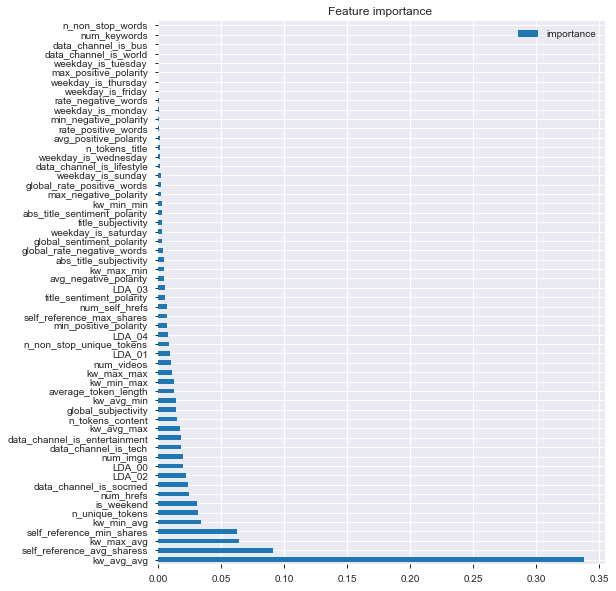

In [81]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(8.0,10.0)
imp_gb.plot(kind='Barh')
plt.title('Feature importance ')

## Gradient Boosting with 200 estimators

In [89]:
gb1=GradientBoostingClassifier(n_estimators=200)
gb1.fit(X1,Y1)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [90]:
re1=cross_val_score(gb1,X1,Y1,cv=10,scoring='roc_auc',n_jobs=-1)

In [91]:
re1.mean()

0.7069485653019376

In [93]:
re1.std()

0.029711568307315313

## Gradient boosting after undersampling

In [102]:
df_new.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0        7.001194         17.830379         0.491195          0.704161   
1        5.420203         19.044656         0.457580          0.704161   
2        5.420203         17.544086         0.440129          0.704161   
3        5.420203         25.998842         0.396506          0.704161   
4        7.503150         34.756753         0.339229          0.704161   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.588851   1.703736        1.080537  0.577487         0.0   
1                  0.576176   1.455887        0.685922  0.577487         0.0   
2                  0.503708   1.455887        0.685922  0.577487         0.0   
3                  0.504748   2.498823        0.000000  0.577487         0.0   
4                  0.428436   3.333495        2.863852  1.487715         0.0   

   average_token_length  ...  avg_negative_polarity  min_negative_polarity  \
0            413.649982  ...               1.014922               0.402359   
1            492.075229  ...               1.574366               0.885116   
2            330.770177  ...               0.774770               0.200623   
3            333.831219  ...               0.972451               0.402359   
4            414.426369  ...               1.314935               0.503595   

   max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0             128.723208            0.281874                  0.746600   
1             254.096203            0.000000                  0.904963   
2             203.387363            0.000000                  0.904963   
3             162.143332            0.000000                  0.904963   
4             352.259845            0.267303                  1.017693   

   abs_title_subjectivity  abs_title_sentiment_polarity  shares  class  class2  
0                0.000000                      0.115887     593      0       0  
1                1.168618                      0.000000     711      0       0  
2                1.168618                      0.000000    1500      1       0  
3                1.168618                      0.000000    1200      0       0  
4                0.049258                      0.094823     505      0       0  

[5 rows x 61 columns]

In [103]:
df_co=df_new

In [104]:
df_co.class2.value_counts()

0    31565
1     8079
Name: class2, dtype: int64

In [105]:
X2=df_co.drop(columns=['shares','class','class2'])
Y2=df_co.class2
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=.3,random_state=1)

In [106]:
Y2_train.value_counts()

0    22066
1     5684
Name: class2, dtype: int64

In [91]:
from sklearn.model_selection import cross_val_predict,cross_val_score

In [108]:
Xy_train=pd.concat([X2_train,Y2_train],axis=1)# undersampling and oversampling only done on train data always. never on test data

Xy_train0=Xy_train.loc[Xy_train['class2']==0]
Xy_train1=Xy_train.loc[Xy_train['class2']==1]

len0=len(Xy_train0)
len1=len(Xy_train1)

Xy_train0_us=Xy_train0.sample(len1)

Xy_train_us=pd.concat([Xy_train0_us,Xy_train1],axis=0)


In [110]:

X2_train_us=Xy_train_us.drop(columns='class2')
Y2_train_us=Xy_train_us['class2']

In [111]:
print(f'shape of X2_train_us {X2_train_us.shape}')
print(f'shape of Y2_train_us {Y2_train_us.shape}')

shape of X2_train_us (11368, 58)
shape of Y2_train_us (11368,)


In [112]:
gb_us=GradientBoostingClassifier()
gb_us.fit(X2_train_us,Y2_train_us)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [113]:
re_us=cross_val_score(gb_us,X2_train_us,Y2_train_us,cv=10,scoring='roc_auc',n_jobs=-1)

In [114]:
re_us.mean()

0.709397774584087

In [115]:
re_us.std()

0.012565617381086585

In [116]:
y_train_pred=gb_us.predict(X2_train_us)
y_train_prob=gb_us.predict_proba(X2_train_us)[:,1]
print(f'Accuracy of train {accuracy_score(Y2_train_us,y_train_pred)}')
print(f'AUC of train {roc_auc_score(Y2_train_us,y_train_prob)}')
print(f'confusion matrix {confusion_matrix(Y2_train_us,y_train_pred)}')
print('\n')
y_test_pred=gb_us.predict(X2_test)
y_test_prob=gb_us.predict_proba(X2_test)[:,1]
print(f'confusion matrix {confusion_matrix(Y2_test,y_test_pred)}')
print(f'Accuracy of test {accuracy_score(Y2_test,y_test_pred)}')
print(f'AUC of test {roc_auc_score(Y2_test,y_test_prob)}')


Accuracy of train 0.6966045038705138
AUC of train 0.7717799348864252
confusion matrix [[3895 1789]
 [1660 4024]]


confusion matrix [[6024 3475]
 [ 789 1606]]
Accuracy of test 0.6414999159239952
AUC of test 0.7100492063663003


In [117]:
report_gb_us=classification_report(Y2_test,y_test_pred,output_dict=True)
print(classification_report(Y2_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.63      0.74      9499
           1       0.32      0.67      0.43      2395

    accuracy                           0.64     11894
   macro avg       0.60      0.65      0.58     11894
weighted avg       0.77      0.64      0.68     11894



In [118]:
imp_gb_us=pd.DataFrame(gb_us.feature_importances_,index=X1.columns,columns=['importance'])
imp_gb_us=imp_gb_us.sort_values(by='importance',ascending=False)

Text(0.5, 1.0, 'Feature importance ')

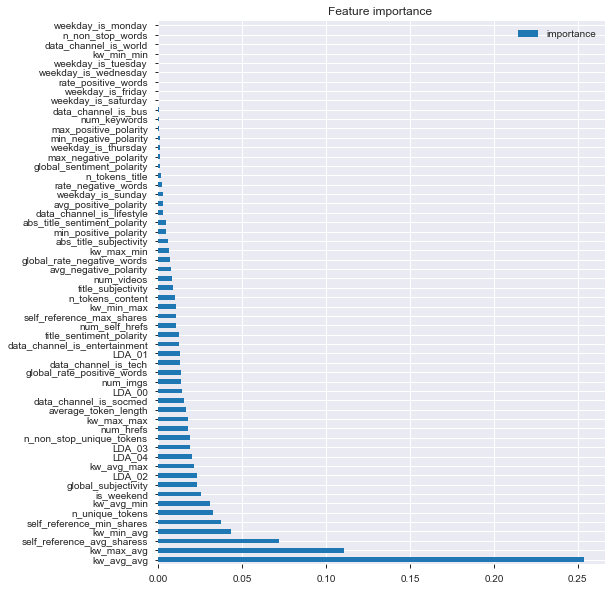

In [119]:
matplotlib.rcParams['figure.figsize']=(8.0,10.0)
imp_gb_us.plot(kind='Barh')
plt.title('Feature importance ')

## Feature Engineering

In [94]:
from sklearn.feature_selection import RFECV

In [95]:
#Initializing RFE model
rfe = RFECV(rf,cv=10,scoring='roc_auc',n_jobs=-1)

In [108]:
len(X.columns)

58

In [97]:
#Transforming data using RFE
cols = list(X.columns)
X_rfe = rfe.fit_transform(X_train,Y_train)  



In [98]:
rf.fit(X_rfe,Y_train)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)


Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [107]:
rfe.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [99]:
len(selected_features_rfe)

58

In [100]:
rf.score(X_rfe,Y_train)

0.7215495495495495

In [101]:
rf.score(rfe.transform(X_test),Y_test)

0.6701698335295107

In [111]:
X_test_rfe=rfe.transform(X_test)

In [117]:
y_pred_rfe=rf.predict_proba(X_test_rfe)[:,1]

In [119]:
roc_auc_score(Y_test,y_pred_rfe)

0.7317529517283969

In [120]:
#Since auc score on test data after doing RFE is almost same as before doing rfe so we won't go with rfe

## Backward Elimination

In [249]:
import statsmodels.api as sm

In [250]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.Logit(Y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.623686
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.623686
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.623686
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.623688
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.623689
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.623691
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.623693
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.623695
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.623697
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.623700
  

In [251]:
a=['n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_max_avg', 'kw_avg_avg', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_saturday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_04', 'global_subjectivity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'min_positive_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity']

In [76]:
len(a)

39

In [252]:
cols=['n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
      'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
      'data_channel_is_world','weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
      'weekday_is_saturday', 'is_weekend', 'global_subjectivity',
      'title_subjectivity', 'title_sentiment_polarity']

In [253]:
len(cols)

20

In [99]:
X_col=X_train[cols]
rf_col=RandomForestClassifier(random_state=1)
rf_col_cv=cross_val_score(rf_col,X_col,Y_train,scoring='roc_auc',cv=10,n_jobs=-1)

In [100]:
print(f'{rf_col_cv.mean()}')
print(f'{rf_col_cv.var()}')

0.6738554875016078
6.288822218044137e-05


In [101]:
rf_col.fit(X_col,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [102]:
rf_col.score(X_test[cols],Y_test)

0.6344908769864627

In [160]:
pred_val=rf_col.predict_proba(X_test[cols])[0,1]

In [103]:
pd.Series(rf_col.feature_importances_,index=X_col.columns).sort_values(ascending=False)

global_subjectivity              0.162553
n_tokens_content                 0.162354
num_hrefs                        0.111440
num_self_hrefs                   0.081076
title_sentiment_polarity         0.078557
num_keywords                     0.076147
title_subjectivity               0.075794
num_imgs                         0.068303
num_videos                       0.040902
data_channel_is_world            0.020555
data_channel_is_entertainment    0.016849
is_weekend                       0.015694
weekday_is_thursday              0.014181
weekday_is_monday                0.013929
weekday_is_tuesday               0.013799
weekday_is_wednesday             0.013797
data_channel_is_socmed           0.010146
data_channel_is_tech             0.009587
data_channel_is_bus              0.008230
weekday_is_saturday              0.006107
dtype: float64

In [104]:
import joblib
joblib.dump(rf_col, 'D:/GreatLearning/Capstone/Random_Forest.pkl')
#load_xgb = joblib.load('D:/GreatLearning/Loan_approval/Loan_Predictor.pkl')

['D:/GreatLearning/Capstone/Random_Forest.pkl']

## Applying Random forest on features obtained after backward elimination

In [62]:
X_be=X_train[a]

In [63]:
rf=RandomForestClassifier()

In [64]:
rf.fit(X_be,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
rf.score(X_test[a],Y_test)

0.6635836206171698

In [132]:
roc_auc_score(Y_test,rf.predict_proba(X_test[a])[:,1])

0.7270084137973156

In [ ]:
#auc score reducing by 1% 

In [67]:
from sklearn.model_selection import cross_val_score
rf_cv=cross_val_score(rf,X_train,Y_train,scoring='roc_auc',cv=10,n_jobs=-1)

In [68]:
rf_cv.mean()

0.7194667766515543

## Boosting

In [103]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier


In [ ]:
ada_rf=AdaBoostClassifier(base_estimator=rf,random_state=1)
ada_rf.fit(X_train[a],Y_train)

In [142]:
y_train_pred=ada_rf.predict(X_train)
y_train_prob=ada_rf.predict_proba(X_train)[:,1]
print(f'Accuracy of train {accuracy_score(Y_train,y_train_pred)}')
print(f'AUC of train {roc_auc_score(Y_train,y_train_prob)}')
print(f'confusion matrix {confusion_matrix(Y_train,y_train_pred)}')
print('\n')
y_test_pred=ada_rf.predict(X_test)
y_test_prob=ada_rf.predict_proba(X_test)[:,1]
print(f'confusion matrix {confusion_matrix(Y_test,y_test_pred)}')
print(f'Accuracy of test {accuracy_score(Y_test,y_test_pred)}')
print(f'AUC of test {roc_auc_score(Y_test,y_test_prob)}')


Accuracy of train 0.9997837837837837
AUC of train 0.9999999688253544
confusion matrix [[14101     1]
 [    5 13643]]


confusion matrix [[4086 1894]
 [2026 3888]]
Accuracy of test 0.6704220615436355
AUC of test 0.7350706559911687


In [143]:
report_ada=classification_report(Y_test,y_test_pred,output_dict=True)
print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68      5980
           1       0.67      0.66      0.66      5914

    accuracy                           0.67     11894
   macro avg       0.67      0.67      0.67     11894
weighted avg       0.67      0.67      0.67     11894



In [144]:
#Clearly it is overfitting so we ca'nt use this  model

## Gradient Boosting

In [98]:
gb=GradientBoostingClassifier()
gb.fit(X_train[a],Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [100]:
y_train_pred=gb.predict(X_train[a])
y_train_prob=gb.predict_proba(X_train[a])[:,1]
print(f'Accuracy of train {accuracy_score(Y_train,y_train_pred)}')
print(f'AUC of train {roc_auc_score(Y_train,y_train_prob)}')
print(f'confusion matrix {confusion_matrix(Y_train,y_train_pred)}')
print('\n')
y_test_pred=gb.predict(X_test[a])
y_test_prob=gb.predict_proba(X_test[a])[:,1]
print(f'confusion matrix {confusion_matrix(Y_test,y_test_pred)}')
print(f'Accuracy of test {accuracy_score(Y_test,y_test_pred)}')
print(f'AUC of test {roc_auc_score(Y_test,y_test_prob)}')



Accuracy of train 0.6783063063063063
AUC of train 0.744131768055777
confusion matrix [[9776 4366]
 [4561 9047]]


confusion matrix [[4075 1865]
 [2068 3885]]
Accuracy of test 0.6693012696544186
AUC of test 0.7289035011065921


## Tuning Gradient Boosting

## tuning learning rate

In [106]:
from sklearn.metrics import auc

In [101]:
X_train=X_train[a]
X_test=X_test[a]

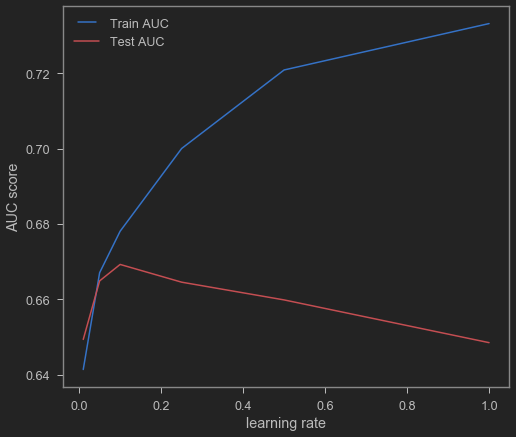

In [107]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, Y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, color='b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, color='r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

In [155]:
#We can clearly see the model started overfitting after learning rate .1 so we take learning rate as .1

## Tuning no of estimators

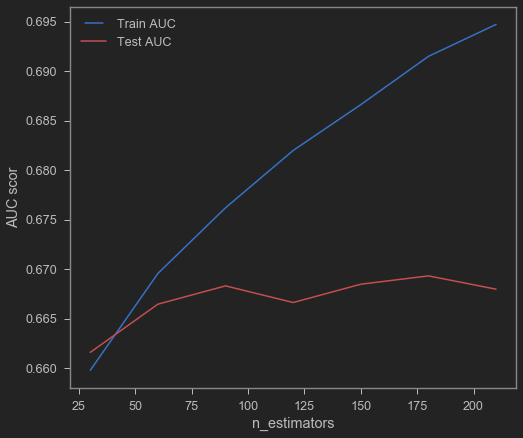

In [108]:
n_estimators = [30, 60, 90, 120, 150, 180, 210]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator,learning_rate=.1)
   model.fit(X_train, Y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC scor')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
#We can take n_estimator=90 as cutoff after that model is overfitting . Before 90 there is very slight overfitting

### max depth

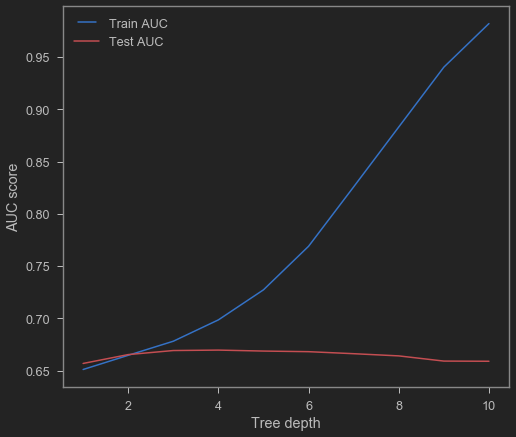

In [109]:
max_depths = np.linspace(1, 10, 10, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth,learning_rate=.1)
   model.fit(X_train, Y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
#After depth=2 model is overfitting so we take max_depth as 2

## min_sample_split

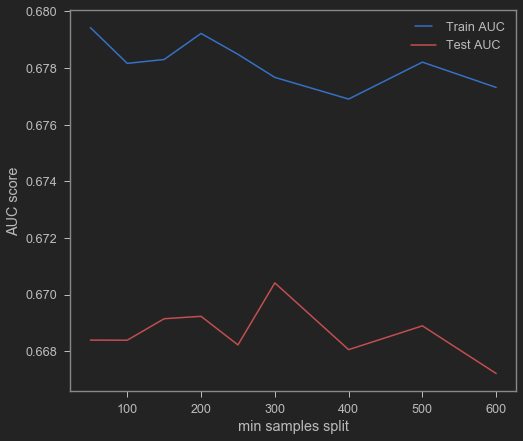

In [110]:
min_samples_splits = [50,100,150,200,250,300,400,500,600]
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   model = GradientBoostingClassifier(min_samples_split=min_samples_split)
   model.fit(X_train, Y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [ ]:
##  On increasing sample split, model is underfitting
#Taking min_sample_split=200 as train auc is also high and overfitting is also low

## Min_sample_leaf

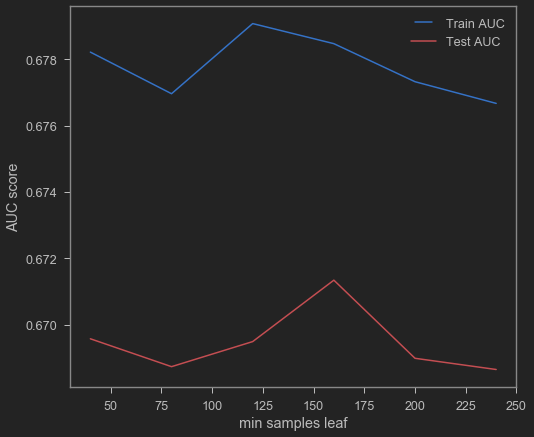

In [111]:
min_samples_leafs = [40,80,120,160,200,240]
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   model = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
   model.fit(X_train, Y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [ ]:
# on increasing min sample,leaf, it is underfitting. 
#At sample_leaf=125, train AUC is highest

## Gradient Boosting with tuned paramters

In [112]:
gb1=GradientBoostingClassifier(learning_rate=.1,n_estimators=90,max_depth=2,min_samples_leaf=125,min_samples_split=200)
gb1.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=125, min_samples_split=200,
                           min_weight_fraction_leaf=0.0, n_estimators=90,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [113]:
y_train_pred=gb1.predict(X_train)
y_train_prob=gb1.predict_proba(X_train)[:,1]
print(f'Accuracy of train {accuracy_score(Y_train,y_train_pred)}')
print(f'AUC of train {roc_auc_score(Y_train,y_train_prob)}')
print(f'confusion matrix {confusion_matrix(Y_train,y_train_pred)}')
print('\n')
y_test_pred=gb1.predict(X_test)
y_test_prob=gb1.predict_proba(X_test)[:,1]
print(f'confusion matrix {confusion_matrix(Y_test,y_test_pred)}')
print(f'Accuracy of test {accuracy_score(Y_test,y_test_pred)}')
print(f'AUC of test {roc_auc_score(Y_test,y_test_prob)}')



Accuracy of train 0.6635315315315315
AUC of train 0.7225773950551603
confusion matrix [[9494 4648]
 [4689 8919]]


confusion matrix [[4029 1911]
 [2064 3889]]
Accuracy of test 0.6657697805431767
AUC of test 0.7220835659354053


In [114]:
report_gbtuned=classification_report(Y_test,y_test_pred,output_dict=True)
print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      5940
           1       0.67      0.65      0.66      5953

    accuracy                           0.67     11893
   macro avg       0.67      0.67      0.67     11893
weighted avg       0.67      0.67      0.67     11893



In [116]:
from sklearn.metrics import matthews_corrcoef

In [117]:
matthews_corrcoef(Y_test,y_test_pred)

0.33166735656826607

In [118]:
gb_cv=cross_val_score(gb1,X_train,Y_train,scoring='roc_auc',cv=10,n_jobs=-1)

In [119]:
gb_cv.mean()

0.7128923316945472

In [201]:
l1=np.array([101,120,120,130,150,160,110,120,115,170,118,120,119])
l1.mean()

127.15384615384616

In [202]:
l1.std()

19.465338637794712

In [207]:
st.norm.interval(.025,loc=127.153,scale=19.46)

(126.54316286986304, 127.76283713013696)

In [205]:
st.norm.cdf(.05)

0.5199388058383725

In [208]:
126.38+(1.6*19.46)/np.sqrt(13)

135.01557265483436

In [210]:
st.norm.interval(.99,126.38,19.46/(np.sqrt(13)))

(112.47764931422003, 140.28235068577996)

## XGBoost

In [254]:
import xgboost 

In [121]:
xgb=xgboost.XGBClassifier()
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [122]:
y_train_pred=xgb.predict(X_train)
y_train_prob=xgb.predict_proba(X_train)[:,1]
print(f'Accuracy of train {accuracy_score(Y_train,y_train_pred)}')
print(f'AUC of train {roc_auc_score(Y_train,y_train_prob)}')
print(f'confusion matrix {confusion_matrix(Y_train,y_train_pred)}')
print('\n')
y_test_pred=xgb.predict(X_test)
y_test_prob=xgb.predict_proba(X_test)[:,1]
print(f'confusion matrix {confusion_matrix(Y_test,y_test_pred)}')
print(f'Accuracy of test {accuracy_score(Y_test,y_test_pred)}')
print(f'AUC of test {roc_auc_score(Y_test,y_test_prob)}')



Accuracy of train 0.8454414414414414
AUC of train 0.9241107958615109
confusion matrix [[12169  1973]
 [ 2316 11292]]


confusion matrix [[3987 1953]
 [2113 3840]]
Accuracy of test 0.6581182208021525
AUC of test 0.7164159937467514


In [123]:
report_xgboost=classification_report(Y_test,y_test_pred,output_dict=True)
print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      5940
           1       0.66      0.65      0.65      5953

    accuracy                           0.66     11893
   macro avg       0.66      0.66      0.66     11893
weighted avg       0.66      0.66      0.66     11893



In [124]:
matthews_corrcoef(Y_test,y_test_pred)

0.3163702689371176

In [125]:
xgb_cv=cross_val_score(xgb,X_train,Y_train,scoring='roc_auc',cv=10,n_jobs=-1)

In [126]:
xgb_cv.mean()

0.7071035110018244

In [49]:
Y_train.isnull().sum()

0

In [256]:
X_train=X_train.reset_index(drop=True)
Y_train=Y_train.reset_index(drop=True)

In [257]:
X_train=X_train[a]
X_test=X_test[a]

In [258]:
X_train.shape,X_test.shape

((27750, 39), (11893, 39))

In [41]:
type(X_train)

pandas.core.frame.DataFrame

In [130]:
X_train[a].shape

(27750, 39)

In [255]:
from sklearn.model_selection import StratifiedKFold

In [273]:

K_fold=StratifiedKFold(n_splits=6,shuffle=True,random_state=1)
#predictions = np.zeros(X_test.shape[0])
cv_score=[]
i=1
for train_index,val_index in K_fold.split(X_train,Y_train):
    x_train,x_val=X_train.loc[train_index],X_train.loc[val_index]
    y_train,y_val=Y_train.loc[train_index],Y_train[val_index]
    
    cls_xgb=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bytree=0.8,
                                  gamma=2, learning_rate=0.05, max_delta_step=0, max_depth=3, min_child_weight=7,
                                  missing=None, n_estimators=350, n_jobs=-1, objective='binary:logistic',
                                  random_state=1, reg_lambda=1, scale_pos_weight=1, seed=None,
                                  subsample=0.57,verbosity=2,silent=True)
    cls_xgb.fit(x_train,y_train)
    score_train = roc_auc_score(y_train,cls_xgb.predict_proba(x_train)[:,1])
    score_val = roc_auc_score(y_val,cls_xgb.predict_proba(x_val)[:,1])
    print('{} of KFold {}'.format(i,K_fold.n_splits))
    print('Training ROC AUC score:',score_train)
    print('Validation ROC AUC score:',score_val)
    print("-----------------------------------")
    cv_score.append(score_val)    
    #predictions += cls_xgb.predict_proba(X_test)[:, 1] / K_fold.n_splits
    i+=1
print ("Mean Cross Validation ROC AUC Score:{}".format(np.array(cv_score).mean()))
print ("Variance of Cross Validation ROC AUC Score:{}".format(np.array(cv_score).var()))

1 of KFold 6
Training ROC AUC score: 0.762439930889938
Validation ROC AUC score: 0.7307629568271627
-----------------------------------
2 of KFold 6
Training ROC AUC score: 0.7633847244015537
Validation ROC AUC score: 0.72570335351413
-----------------------------------
3 of KFold 6
Training ROC AUC score: 0.7615194261679907
Validation ROC AUC score: 0.7364350177601486
-----------------------------------
4 of KFold 6
Training ROC AUC score: 0.7635284068843678
Validation ROC AUC score: 0.7252745957667468
-----------------------------------
5 of KFold 6
Training ROC AUC score: 0.7631214723825387
Validation ROC AUC score: 0.7273232608934773
-----------------------------------
6 of KFold 6
Training ROC AUC score: 0.7667006081176638
Validation ROC AUC score: 0.7065505840608373
-----------------------------------
Mean Cross Validation ROC AUC Score:0.7253416281370838
Variance of Cross Validation ROC AUC Score:8.493660708978662e-05


Text(0.5, 1.0, 'Feature importance ')

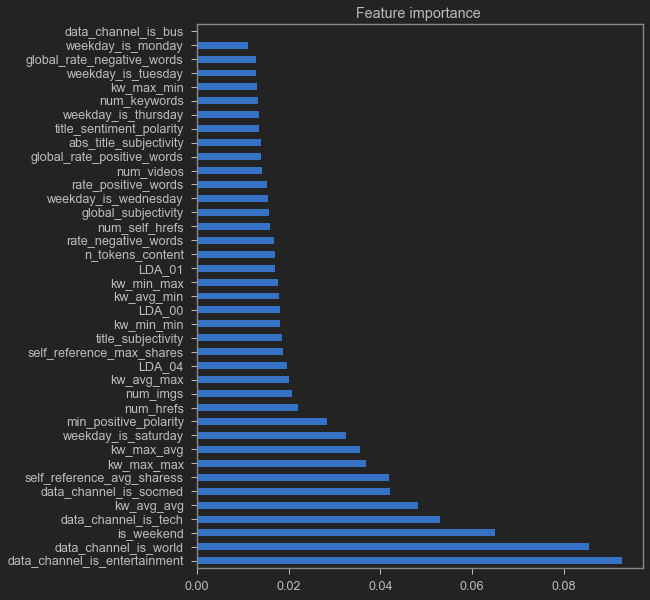

In [274]:
imp=pd.Series(cls_xgb.feature_importances_,index=X_train.columns).sort_values(ascending=False)
matplotlib.rcParams['figure.figsize']=(8.0,10.0)
imp.plot(kind='Barh')
plt.title('Feature importance ')

In [143]:
roc_auc_score(Y_test,cls_xgb.predict_proba(X_test)[:,1])

0.733033665508888

In [141]:
print(classification_report(Y_test,cls_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67      5940
           1       0.68      0.66      0.67      5953

    accuracy                           0.67     11893
   macro avg       0.67      0.67      0.67     11893
weighted avg       0.67      0.67      0.67     11893



base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bytree=0.8,
                                  gamma=1.5, learning_rate=0.05, max_delta_step=0, max_depth=3, min_child_weight=7,
                                  missing=None, n_estimators=200, n_jobs=-1, objective='binary:logistic',
                                  random_state=1, reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
                                  subsample=0.6

### reduced columns (20) for web deployment

In [260]:
X_col=X_train[cols]
xgb_col=xgboost.XGBClassifier()
xgb_col_cv=cross_val_score(xgb_col,X_col,Y_train,scoring='roc_auc',cv=8,n_jobs=-1)

In [270]:
X_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27750 entries, 0 to 27749
Data columns (total 20 columns):
n_tokens_content                 27750 non-null float64
num_hrefs                        27750 non-null float64
num_self_hrefs                   27750 non-null float64
num_imgs                         27750 non-null float64
num_videos                       27750 non-null float64
num_keywords                     27750 non-null float64
data_channel_is_entertainment    27750 non-null int64
data_channel_is_bus              27750 non-null int64
data_channel_is_socmed           27750 non-null int64
data_channel_is_tech             27750 non-null int64
data_channel_is_world            27750 non-null int64
weekday_is_monday                27750 non-null int64
weekday_is_tuesday               27750 non-null int64
weekday_is_wednesday             27750 non-null int64
weekday_is_thursday              27750 non-null int64
weekday_is_saturday              27750 non-null int64
is_weekend     

In [261]:
print(f'{xgb_col_cv.mean()}')
print(f'{xgb_col_cv.var()}')

0.6749321073475425
1.7642849281045722e-05


In [262]:
xgb_col.fit(X_col,Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [263]:
xgb_col.score(X_test[cols],Y_test)

0.6323888001345329

In [271]:
pred_val=xgb_col.predict_proba(X_test[cols])[0,1]
pred_val

0.34828672

In [ ]:
xgb_col.predict_proba([[n_tokens_content, num_hrefs, num_self_hrefs, num_imgs, num_videos, num_keywords,
      data_channel_is_entertainment, data_channel_is_bus, data_channel_is_socmed, data_channel_is_tech,
      data_channel_is_world,weekday_is_monday, weekday_is_tuesday, weekday_is_wednesday, weekday_is_thursday,
      weekday_is_saturday, is_weekend, global_subjectivity,
      title_subjectivity, title_sentiment_polarity]])

Text(0.5, 1.0, 'Feature importance ')

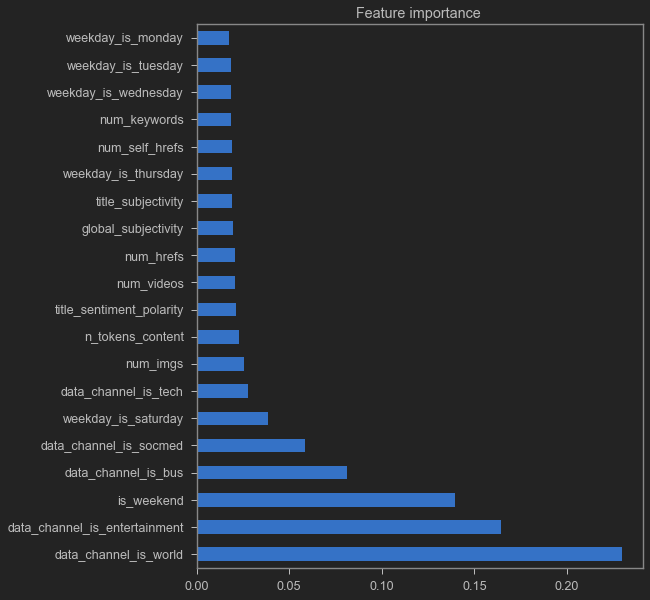

In [268]:
import matplotlib
fimp=pd.Series(xgb_col.feature_importances_,index=X_col.columns).sort_values(ascending=False)
matplotlib.rcParams['figure.figsize']=(8.0,10.0)
fimp.plot(kind='Barh')
plt.title('Feature importance ')

In [269]:
import joblib
joblib.dump(xgb_col, 'D:/GreatLearning/Capstone/XGB.pkl')
#load_xgb = joblib.load('D:/GreatLearning/Loan_approval/Loan_Predictor.pkl')

['D:/GreatLearning/Capstone/XGB.pkl']

## Lightgbm

In [77]:
import lightgbm 

In [181]:
lgb=lightgbm.LGBMClassifier()
lgb.fit(X_train,Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [182]:
y_train_pred=lgb.predict(X_train)
y_train_prob=lgb.predict_proba(X_train)[:,1]
print(f'Accuracy of train {accuracy_score(Y_train,y_train_pred)}')
print(f'AUC of train {roc_auc_score(Y_train,y_train_prob)}')
print(f'confusion matrix {confusion_matrix(Y_train,y_train_pred)}')
print('\n')
y_test_pred=lgb.predict(X_test)
y_test_prob=lgb.predict_proba(X_test)[:,1]
print(f'confusion matrix {confusion_matrix(Y_test,y_test_pred)}')
print(f'Accuracy of test {accuracy_score(Y_test,y_test_pred)}')
print(f'AUC of test {roc_auc_score(Y_test,y_test_prob)}')


Accuracy of train 0.7495495495495496
AUC of train 0.8330463802453836
confusion matrix [[10729  3373]
 [ 3577 10071]]


confusion matrix [[4111 1869]
 [2036 3878]]
Accuracy of test 0.6716832016142593
AUC of test 0.7349350727201369


In [183]:
report_lgbm=classification_report(Y_test,y_test_pred,output_dict=True)
print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      5980
           1       0.67      0.66      0.67      5914

    accuracy                           0.67     11894
   macro avg       0.67      0.67      0.67     11894
weighted avg       0.67      0.67      0.67     11894



In [184]:
matthews_corrcoef(Y_test,y_test_pred)

0.3433793078358326

In [123]:
param_lgbm = {
    'n_estimators':1000000,
    'bagging_freq': 5,
    'bagging_fraction': 0.8,
    'boost': 'gbdt',
    'feature_fraction': 0.7,
    'learning_rate': 0.05,
    'metric':'auc',
    'max_depth': 6,  
    'num_leaves': 50,
    'min_data_in_leaf':40,
    'objective': 'binary',
    'scale_pos_weight':1,
    #'device':'cpu',
    #'num_class':2,
    'verbosity': 1000
}

In [117]:
features=a

In [119]:
from lightgbm import LGBMClassifier

In [130]:
folds = StratifiedKFold(n_splits=6, shuffle=True, random_state=1048)
predictions = np.zeros((len(X_test), 2))
feature_importance_df = pd.DataFrame()
cv_auc=[]
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train.values, Y_train.values)):
    print("Fold {}".format(fold_))
    x_train,x_val=X_train.loc[trn_idx],X_train.loc[val_idx]
    y_train,y_val=Y_train.loc[trn_idx],Y_train[val_idx]

    
    clf_lgb = LGBMClassifier(**param_lgbm)
    clf_lgb.fit(x_train,y_train,early_stopping_rounds=10,eval_set=[(x_train,y_train),(x_val,y_val)],verbose=1000)
    cv_auc.append(roc_auc_score(Y_train.iloc[val_idx],clf_lgb.predict_proba(X_train.iloc[val_idx][features])[:,1]
                                                   ))
    #predictions_lgbm += clf_lgb.predict(X_test[features], num_iteration=clf.best_iteration) / folds.n_splits
print ("Mean Cross Validation ROC AUC Score:{}".format(np.array(cv_auc).mean()))
print ("Variance of Cross Validation ROC AUC Score:{}".format(np.array(cv_auc).var()))    

Fold 0
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[74]	training's auc: 0.783348	valid_1's auc: 0.726726
Fold 1
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[90]	training's auc: 0.794618	valid_1's auc: 0.711936
Fold 2
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[156]	training's auc: 0.82198	valid_1's auc: 0.734997
Fold 3
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[110]	training's auc: 0.80337	valid_1's auc: 0.729065
Fold 4
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[58]	training's auc: 0.776014	valid_1's auc: 0.710413
Fold 5
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[149]	training's auc: 0.817224	valid_1's auc: 0.731458
Mean Cross Validation ROC AUC Score:0.7240990662359635
Va

In [142]:
roc_auc_score(Y_test,clf_lgb.predict_proba(X_test)[:,1])

0.7340343634565035

In [136]:
print(classification_report(Y_test,clf_lgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      5940
           1       0.67      0.65      0.66      5953

    accuracy                           0.67     11893
   macro avg       0.67      0.67      0.67     11893
weighted avg       0.67      0.67      0.67     11893



In [ ]:
accuracy_score(Y_test,)

In [133]:
Y_test.shape,X_test.shape

((11893,), (11893, 39))